# <font color ='Black'> Project Challenge: Recommender system for the Amazon food data!

by 
* Haimi Qiu (s212650)
* Malthe Andreas Lejbølle Jelstrup (s184291)
* Mathias Sofus Hovmark (s173853)
* Frederik Sandström Ommundsen (s183951)
* Jiafei Xia (s213084) </font>

# Table of Contents
- [Part 1: <u>Introduction</u>](#intro)
- [Part 2: <u>Data Analysis and Visualisation</u>](#datavis)
    - [2.1: <u>Load and Present Basic Information of the Dataset</u>](#load)
    - [2.2: <u>Insight Exploration</u>](#insight) 
    - [2.3: <u>Data Cleaning</u>](#cleaning)
    
- [Part 3: <u>Recommender System</u>](#RS)
    - [3.1: <u>Non-personalized Recommender System</u>](#Non-personalized)
    - [3.2: <u>Personalized Recommender System</u>](#Personalized) 
- [Part 4: <u>Custom Recommender Engine</u>](#explore)
- [Part 5: <u>Survival Analysis</u>](#survival)
- [Part 6: <u>Conclusion</u>](#conc)

---
<a id='intro'></a>

# Part 1: Introduction

In this project we will be working with Amazon review data for "groceries" and "gourmet food". The dataset was obtained through https://nijianmo.github.io/amazon/index.html and spans a period of 18 years from 2000-2018. The main objective of the project is to build a recommender system for recommending products to users. First, a brief overview of the data will be given and the preliminary cleaning steps will be presented. Then, the specific research questions that will be explored in the report will be presented.

The dataset contains approximately 5.175.105 reviews of product from the 'groceries' and 'gourmet food' sections on Amazon. 
**Due to the computational cost, with different recommendation algorithms, we selected diffeent subset data to demenstrate the ideas of recommender system.** Tables 1 and 2 (in the following section of Part 2: Data Analysis and Visualisation) show descriptive statistics including missing values for the datasets features. The features included in the dataset are as follows:

**Features**
* **reviewerID** - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* **asin** - ID of the product, e.g. 0000013714
* **reviewerName** - name of the reviewer
* **vote** - number of people who have indicated that the given review was 'helpful'
* **reviewText** - the full review text
* **overall** - the rating of the product (from 1-5, discrete values)
* **summary** - a summary of the review as provided by the user who wrote the review (i.e. a review 'title')
* **reviewTime** - time and date of the review
* **image** - images that users post after they have received the product
* **verified** - a feature indicating whether the review comes from an Amazon account that has previously purchased this product
* **price** - the price of the product the review concerns
* **main_cat** - the main overall category each product has been assigned to by Amazon
* **bottom_cat** - the most specific category each product has been assigned to

---
<a id='dataprep'></a>

# Part 2: Data Analysis and Visualisation

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (11.7,8.27)
from nltk.stem import WordNetLemmatizer # text mining
from sklearn.feature_extraction import _stop_words
import nltk
import string
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression # content-based CF
from surprise import SVD
from surprise.dataset import Reader, Dataset # MF
from surprise.model_selection import GridSearchCV # SVD
from scipy import stats

<a id='load'></a>

### 2.1: Load and present basic information of the dataset

**In this section, we used the full dataset for basis data exploration before creating recommendation system.**   

In [14]:
#df=pd.read_csv('merged_df.csv') # sub-set
df=pd.read_csv('merged_full.csv') # full
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
overall,5,4,4,5,4
verified,True,True,True,True,True
reviewTime,"06 4, 2013","05 23, 2014","05 9, 2014","04 20, 2014","04 16, 2014"
reviewerID,ALP49FBWT4I7V,A1KPIZOCLB9FZ8,A2W0FA06IYAYQE,A2PTZTCH2QUYBC,A2VNHGJ59N4Z90
asin,1888861614,1888861614,1888861614,1888861614,1888861614
reviewerName,Lori,BK Shopper,daninethequeen,Tammara,LaQuinta Alexander
reviewText,Very pleased with my purchase. Looks exactly l...,Very nicely crafted but too small. Am going to...,still very pretty and well made...i am super p...,"I got this for our wedding cake, and it was ev...",It was just what I want to put at the top of m...
summary,Love it,Nice but small,"the ""s"" looks like a 5, kina",Would recommend this to a friend!,Topper
unixReviewTime,1370304000,1400803200,1399593600,1397952000,1397606400


In [15]:
print("================================================")
print("No. of missing value for each parameter")
print("================================================")
df.isnull().sum()

No. of missing value for each parameter


Unnamed: 0              0
overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName          662
reviewText           2917
summary              1376
unixReviewTime          0
vote              4499677
image             5103186
style             2844718
price             1543805
main_cat             8290
category                0
bottom_cat              0
dtype: int64

**The dataset has 5.175.105 observations and 17 features columns. 3 is of type int64s and 14 are objects. From the `df.isnull().sum()` column we can see quite a few feature columns contain missing values.**

In [16]:
#Splitting the datestamp into day/year/month and seasons
df['Date'] = pd.to_datetime(df.reviewTime.values)
df['year'] = df.Date.apply(lambda x: x.year)
df['day'] = df.Date.apply(lambda x: x.weekday())
df['month'] = df.Date.apply(lambda x: x.month)
bins = ["Winter", "Spring", "Summer", "Fall"]
df['season'] = df.month%12 //3
df['season'] = df['season'].apply(lambda x : bins[x])
df['vote'] = df['vote'].str.replace(',', '').replace(np.nan, 0).astype(int)
df['price'].str.replace('$', '').replace(',', '').replace(np.nan, 0)
# dropping the columns which has no impact regarding the research questions
df=df.drop(columns=['Unnamed: 0', 'unixReviewTime', 'reviewTime','image', 'reviewerName','style','category'])

In [17]:
unique=np.array([])
maxunique=np.array([])
minunique=np.array([])
meancounts=np.array([])
stdcounts=np.array([])
missingcounts=np.array([])
mainds=df.copy()
categorical = ['reviewerID', 'asin', 'reviewText', 'verified', 'summary', 'year', 'bottom_cat', 'main_cat']

for i in categorical:
    unique=np.append(unique, len(mainds[i].unique()))
    maxunique=np.append(maxunique, {mainds[i].value_counts().idxmax() : mainds[i].value_counts().max()})
    minunique=np.append(minunique, {mainds[i].value_counts().idxmin() : mainds[i].value_counts().min()})
    meancounts=np.append(meancounts, mainds[i].value_counts().mean())
    stdcounts=np.append(stdcounts, mainds[i].value_counts().std())
    missingcounts=np.append(missingcounts, len(mainds[mainds[i].isnull()]))

    
test=pd.DataFrame([unique, maxunique, minunique, meancounts, stdcounts, missingcounts]).T
test.index=categorical
test.columns=['Unique values', 'Most frequent category (N)', 'Least frequent category (N)',
             'Mean frequency per category', 'SD', 'Number of missing values']
test['Unique values']=test['Unique values']-(test['Number of missing values']>0).astype(int)
test['Description']=['Reviewer identifier', 'Product ID (identical products have same ID)', 'Full review text for product',
                     '1 if reviewer has bought product, 0 otherwise','The chosen title for the user''s review','Year of review',
                    'Most specific product category','Amazon''s identified overall category']
print("* Month will be treated as nominal")
table1=test
table1

* Month will be treated as nominal


,Unique values,Most frequent category (N),Least frequent category (N),Mean frequency per category,SD,Number of missing values,Description
reviewerID,2695230.0,{'A1LACH6MLQWZ': 1114},{'A5H451HSAYBO': 1},1.920098,3.256052,0.0,Reviewer identifier
asin,283349.0,{'B0001LO3FG': 13716},{'B0149JVSOO': 1},18.264067,112.997978,0.0,Product ID (identical products have same ID)
reviewText,4180161.0,{'Great': 11677},{'Bought this for my mother-in-law as a Mother...,1.237318,15.987696,2917.0,Full review text for product
verified,2.0,{True: 4523878},{False: 651227},2587552.5,2738377.783269,0.0,"1 if reviewer has bought product, 0 otherwise"
summary,2180775.0,{'Five Stars': 1161407},{'order the honey made from the state that you...,2.372427,797.925355,1376.0,The chosen title for the users review
year,19.0,{2016: 1135788},{2000: 5},272373.947368,399856.775015,0.0,Year of review
bottom_cat,1174.0,{'Single-Serve Capsules & Pods': 346438},{'Meatballs': 1},4408.096252,14777.457691,0.0,Most specific product category
main_cat,32.0,{'Grocery': 4760472},"{'<img src=""https://m.media-amazon.com/images/...",161462.96875,840349.55462,8290.0,Amazons identified overall category


In [18]:
minarray, maxarray, meanarray, stdarray, medianarray, outliersarray, missingarray, zeroarray = [np.array([]) for i in range(8)]

continuous = ['vote', 'price', 'review_length', 'overall']

mainds['vote']=mainds['vote'].astype(float)
# mainds['price']=mainds['price'].astype(float)
mainds['price']=pd.to_numeric(mainds['price'], errors='coerce').fillna(0).astype(float) # 0 in case non-value in the `price` column
mainds['review_length'] = mainds.reviewText.map(str).apply(len)
mainds['review_length']=mainds['review_length']
mainds['overall']=mainds['overall'].astype(float)

for i in continuous:
    minarray=np.append(minarray, mainds[i].min())
    maxarray=np.append(maxarray, mainds[i].max())
    meanarray=np.append(meanarray, mainds[i].mean())
    stdarray=np.append(stdarray, mainds[i].std())
    medianarray=np.append(medianarray, mainds[i].median())
    zscore = stats.zscore(mainds[i])
    outliersarray=np.append(outliersarray, len(mainds[np.abs(zscore)>3]))
    missingarray = np.append(missingarray, len(mainds[mainds[i]==0]))
    zeroarray = np.append(zeroarray, len(mainds[np.isnan(mainds[i])]))
    
testc=pd.DataFrame([minarray, maxarray, meanarray, stdarray, medianarray, outliersarray, missingarray, zeroarray]).T

testc.index=continuous
testc.columns=['Min', 'Max', 'Mean', 'SD', 'Median', 'No. of extreme outliers (+/- 3 SD)', 'No. missing values', 'No. zero values']
testc['Variable type']=['Number of votes received by review', 'Price of product reviewed', 'length of review in words', 'rating given by review']
table2=testc
table2

,Min,Max,Mean,SD,Median,No. of extreme outliers (+/- 3 SD),No. missing values,No. zero values,Variable type
vote,0.0,12174.0,0.218793,11.802725,0.0,3389.0,5044980.0,0.0,Number of votes received by review
price,0.0,0.0,0.000000,0.000000,0.0,0.0,5175105.0,0.0,Price of product reviewed
review_length,1.0,30000.0,175.265322,256.664737,105.0,88180.0,0.0,0.0,length of review in words
overall,1.0,5.0,4.316446,1.247916,5.0,0.0,0.0,0.0,rating given by review


---

<a id='insiExpl'></a>

### 2.2: Insight Exploration

<font color ='red'> (1) Correct below code to plot properly (2) Give a short explaination of our first plot in the notebook </font>

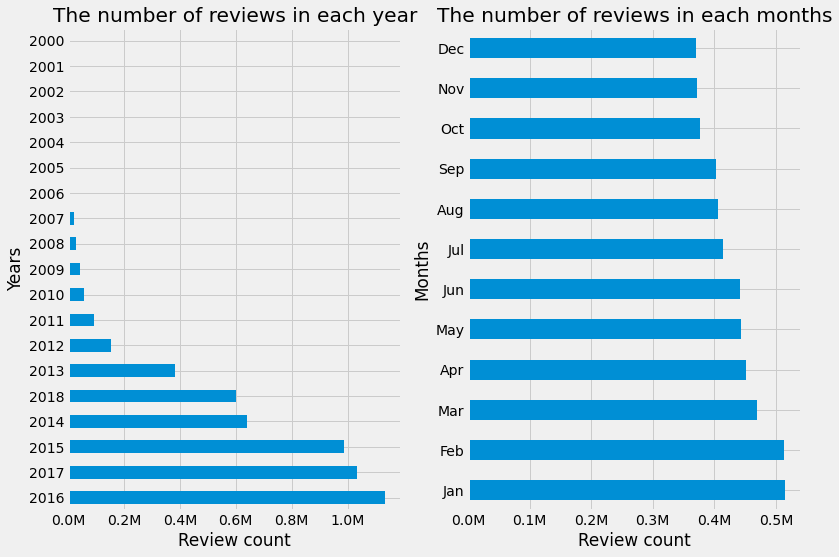

In [19]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)
fig, ax = plt.subplots(1,2)

df['year'].value_counts().plot(kind='barh',
                               ax=ax[0],
                               title="The number of reviews in each year",
                               xlabel="Years", ylabel="Counts")
df['month'].value_counts().plot(kind='barh',
                                ax=ax[1],
                                title="The number of reviews in each months",
                                xlabel="Months", ylabel="Counts")
month_starts = range(0,12)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

ax[0].xaxis.set_major_formatter(formatter)
ax[0].set_xlabel('Review count')
ax[1].set_yticks(month_starts)
ax[1].set_yticklabels(month_names)
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlabel('Review count')

plt.show()

Most of the reviews (88%) are from verified users meaning that the writer of the review should in principle have bought the product. This verification process is in place to avoid fake reviews. Instead of removing the 'not verified' reviews we will keep them for later investigation of whether the review verification process is of importance for our recommender system.

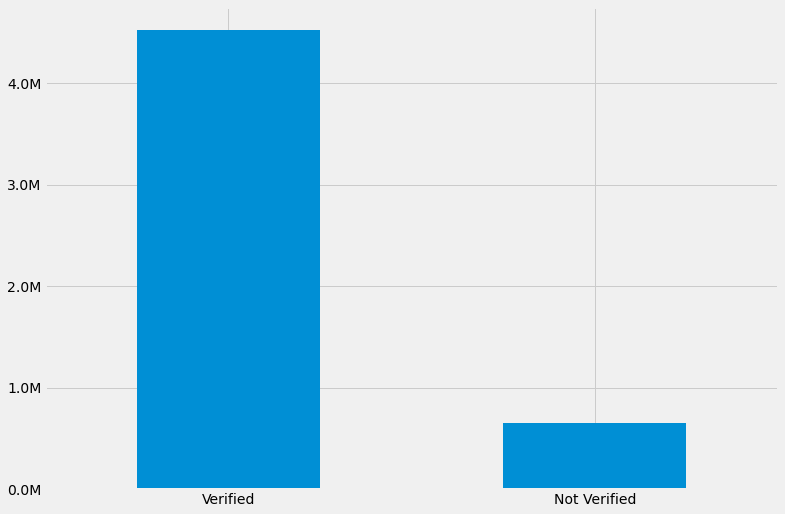

In [20]:
#true means the reviews where the custmomer bought the product
df['verified'].value_counts().plot(kind='bar')
plt.xticks([0,1], ["Verified", "Not Verified"], rotation=0)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
plt.show()

Looking at the distribution of reviews and ratings shows a heavy-right skew - most users only review very few products (1-3), most products only receive very few reviews (1-3), the review texts are typically short, and an overweight of reviews contain the most positive rating (5).

<font color ='red'> correct the figures on the left </font>

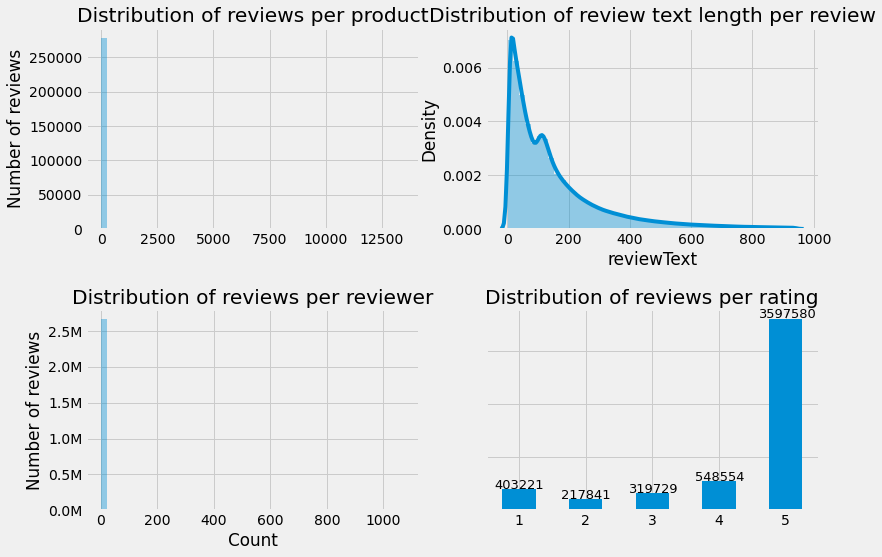

In [44]:
fig, ax = plt.subplots(2,2)
sns.distplot(df.groupby("asin")["overall"].count().rename("Count"),
             kde=False, hist=True, ax=ax[0,0])
ax[0,0].set_title('Distribution of reviews per product')
ax[0,0].set_ylabel('Number of reviews')
#ax[0.0].yaxis.set_major_formatter(formatter)

review_length = df.reviewText.map(str).apply(len)
sns.distplot(review_length, ax=ax[0,1])
ax[0,1].set_title('Distribution of review text length per review')

sns.distplot(df.groupby("reviewerID")["overall"].count().rename("Count"),
            kde=False, hist=True, ax=ax[1,0])
ax[1,0].set_title('Distribution of reviews per reviewer')
ax[1,0].set_ylabel('Number of reviews')
ax[1,0].yaxis.set_major_formatter(formatter)

    
df.overall.value_counts().sort_index(ascending=True).plot(kind="bar", ax=ax[1,1]) 
ax[1,1].set_xticklabels(ax[1,1].get_xticks()+1, rotation=0)
ax[1,1].set_title('Distribution of reviews per rating')

for p in ax[1,1].patches:
    ax[1,1].annotate(str(p.get_height()), (p.get_x() * 1.005 + (p.get_width()/2), p.get_height() * 1.005 +1000), ha="center", size=13)
             
ax[1,1].set_yticklabels([])
plt.subplots_adjust(hspace=0.4)
plt.show()

Next, we try to remove the outliers and the same plots as in previous will be shown.

In [23]:
# Extreme is defined as more than 3 standard deviations from the mean
# Remove asins (products) with extreme number of reviews
asin_count = df.groupby("asin")["overall"].count()
asin_mean, asin_std = asin_count.mean(), asin_count.std()
banned_asin = asin_count[asin_count > asin_mean + asin_std * 3].index

# Remove reviewers that have made an extreme number of reviews
reviewer_count = df.groupby("reviewerID")["overall"].count()
reviewer_mean, reviewer_std = reviewer_count.mean(), reviewer_count.std()
banned_reviewer = reviewer_count[reviewer_count > reviewer_mean + reviewer_std * 3].index

# Remove reviews with an extremely long text
review_mean, review_std = review_length.mean(), review_length.std()
banned_review_index = review_length[review_length > review_mean + review_std * 3].index

df.drop(banned_review_index, inplace=True)
df_withoutOutlier = df[~df.asin.isin(banned_asin) & ~df.reviewerID.isin(banned_reviewer)]

<font color ='red'> correct the figures on the left </font>

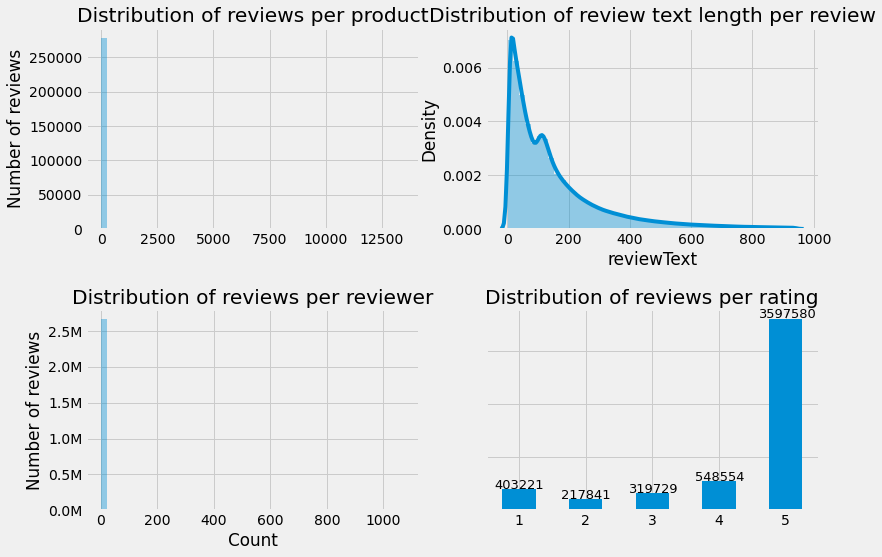

In [27]:
fig, ax = plt.subplots(2,2)
sns.distplot(x=df.groupby("asin")["overall"].count().rename("Count"),
             kde=False, hist=True, ax=ax[0,0])
ax[0,0].set_title('Distribution of reviews per product')
ax[0,0].set_ylabel('Number of reviews')
#ax[0.0].yaxis.set_major_formatter(formatter)

review_length = df.reviewText.map(str).apply(len)
sns.distplot(review_length, ax=ax[0,1])
ax[0,1].set_title('Distribution of review text length per review')

sns.distplot(df.groupby("reviewerID")["overall"].count().rename("Count"),
            kde=False, hist=True, ax=ax[1,0])
ax[1,0].set_title('Distribution of reviews per reviewer')
ax[1,0].set_ylabel('Number of reviews')
ax[1,0].yaxis.set_major_formatter(formatter)

    
df.overall.value_counts().sort_index(ascending=True).plot(kind="bar", ax=ax[1,1]) 
ax[1,1].set_xticklabels(ax[1,1].get_xticks()+1, rotation=0)
ax[1,1].set_title('Distribution of reviews per rating')

for p in ax[1,1].patches:
    ax[1,1].annotate(str(p.get_height()), (p.get_x() * 1.005 + (p.get_width()/2), p.get_height() * 1.005 +1000), ha="center", size=13)
             
ax[1,1].set_yticklabels([])
plt.subplots_adjust(hspace=0.4)

Comparing the above plots with the ones in the previous section it is clearly visible that the outliers have been removed and that the rows have been reduced. Especially the reviewText is less right skewed. We can see that most customers gave only 1 reviews for the products. 

Likewise, most reviews only receive between 1 and 5 'votes' indicating that another user found the review helpful, the review with the most votes got 2088 upvotes!

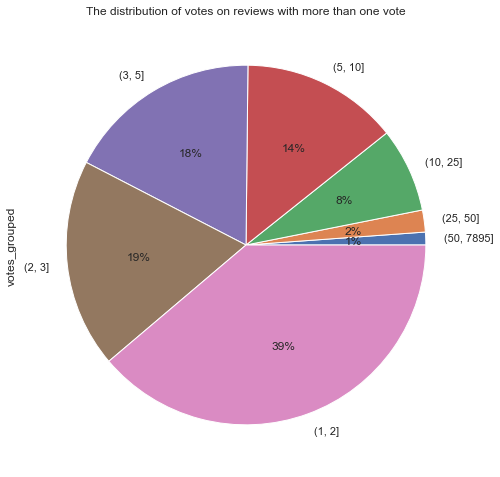

In [13]:
temp=df.copy()
bins = [1,2,3,5,10,25,50,int(temp.vote.max())+1]
temp['votes_grouped'] = pd.cut(temp['vote'],bins=bins)
temp.votes_grouped.value_counts().sort_index(ascending=False).plot(kind="pie",autopct='%.0f%%')
plt.title("The distribution of votes on reviews")
plt.show()

Next we will look at the ratings for different product categories.

In [46]:
mean_score_vs_cat_df = df.groupby(['main_cat']).mean()['overall'].reset_index()
mean_score_vs_cat_df

,main_cat,overall
0,"<img src=""https://images-na.ssl-images-amazon....",3.888889
1,"<img src=""https://images-na.ssl-images-amazon....",4.913793
2,"<img src=""https://images-na.ssl-images-amazon....",4.347826
3,"<img src=""https://images-na.ssl-images-amazon....",4.112195
4,"<img src=""https://images-na.ssl-images-amazon....",4.264050
5,"<img src=""https://m.media-amazon.com/images/G/...",5.000000
6,All Beauty,4.372679
7,All Electronics,4.393443
8,Amazon Home,4.253134
9,Appliances,2.000000


As you can see above there are some misleading indexes under column of `main_cat`, we remove them in the next step.

In [47]:
main_cat_kept=['Grocery', 'Health & Personal Care', 'Amazon Home', 'Toys & Games',
               'All Beauty', 'Industrial & Scientific', 'Sports & Outdoors',
               'Office Products', 'Pet Supplies', 'Arts, Crafts & Sewing',
               'Tools & Home Improvement', 'Baby', 'Cell Phones & Accessories',
               'Computers', 'All Electronics', 'Home Audio & Theater', 'Software', 'Camera & Photo',
               'Automotive', 'Car Electronics', 'Movies & TV', 'Musical Instruments',
               'Portable Audio & Accessories', 'Video Games',
               'Appliances', 'Gift Cards']

df = df[df.main_cat.isin(main_cat_kept)]

In [48]:
df.main_cat.value_counts()

Grocery                         4679397
Health & Personal Care           215057
Amazon Home                      120778
Toys & Games                      16180
All Beauty                        16046
Sports & Outdoors                  9015
Industrial & Scientific            8370
Office Products                    6425
Baby                               1409
Pet Supplies                       1192
Arts, Crafts & Sewing               848
Tools & Home Improvement            559
Cell Phones & Accessories           288
Computers                           152
Home Audio & Theater                 61
All Electronics                      61
Software                             44
Camera & Photo                       38
Car Electronics                      19
Automotive                           18
Musical Instruments                  18
Movies & TV                          14
Portable Audio & Accessories          4
Video Games                           2
Appliances                            1


<font color ='red'> Add a basis explaination of the plot below</font>

In [ ]:
plt.figure(figsize=(14,8))

sns.barplot(data = df, x='main_cat', y='overall',
           order = df.groupby('main_cat').mean()
            .reset_index().sort_values('overall', ascending=False)['main_cat'].values,
           errcolor = 'grey');

plt.title('Average review score by product category'.title(), fontsize=20);
plt.ylabel('Average Review Score'.title(), fontsize=14);
plt.xlabel('Product Category'.title(), fontsize=14);

plt.xticks(rotation=90, fontsize= 10);
plt.yticks(fontsize=12)
plt.show()

---

<a id='dataclean'></a>

### 2.3: Data Cleaning

**Since the original dataset is huge and different ways of recommender system requires different strucure of dataframe, the data cleaning processed is conducted in each section of different recommendation system to meet its demand.**

# Part 3:  Recommender system<a name="recommender"></a>

During the previous few decades, with the increase online shopping activities, recommender systems have played an important role by recommending right products to the interested group to create business value. From e-commerce to online promotion, recommender systems are now seen everywehre in our daily life.

Recommender systems are extremely essential in some industries as they'll generate an enormous quantity of financial gain for the companies and make them stand out. The Recommender System selects and suggests the contents to satisfy user's preference based on users' history and information.

In this part, different ways of generating recommending systems will be carried out and comparisons among different systems will be present.

In [19]:
# data = df.copy() # use cleaned data
data =pd.read_csv('merged_full.csv') # full # use uncleaned data
# data.head(4)

# data = df.copy()
# data = data[data.year==2016]

In [20]:
# Get only columns of `reviewerID`,`overall`, and `asin` for users, ratings, and item
columns = ['reviewerID','overall','asin']
data1 = data[columns]
# Rename columns into `user`,`rating`, and `item`
data1.columns = ['user','rating', 'item']
data1['rating']=data1['rating'].astype(float)
data1

,user,rating,item
0,ALP49FBWT4I7V,5.0,1888861614
1,A1KPIZOCLB9FZ8,4.0,1888861614
2,A2W0FA06IYAYQE,4.0,1888861614
3,A2PTZTCH2QUYBC,5.0,1888861614
4,A2VNHGJ59N4Z90,4.0,1888861614
...,...,...,...
5175100,A1AZD3IIOFDLPC,4.0,B01HJFBN9A
5175101,ASBAV5V4EQQ5H,5.0,B01HJFRDDA
5175102,A33ODS13U2ZLIZ,5.0,B01HJFRDDA
5175103,A3NY9RMNIODSDW,3.0,B01HJEK5QS


In reality, a customer would buy the same product more than one time and give different reviews to each shopping of the same product. This results in different ratings of the same product from the same customer. In our dataframe, we use the average rating that the customer gave to the same product. Below, we get the dataframe with unique pair of `user` and `item`:

In [21]:
avgRate = data1.groupby(["user","item"]).mean()
users,items,ratings = [],[],[]

for i, row in avgRate.iterrows():
    ratings.append(row[0])
    users.append(i[0])
    items.append(i[1])
    
data_avgRate = pd.DataFrame({'user':users, 'item':items, 'rating':ratings})
data_avgRate = data_avgRate[['user', 'item', 'rating']] # correct order
data_avgRate

,user,item,rating
0,A000013090ZI3HIT9N5V,B000SAUVC4,5.0
1,A000013090ZI3HIT9N5V,B00271OPVU,5.0
2,A000013090ZI3HIT9N5V,B0096S6OX4,5.0
3,A000013090ZI3HIT9N5V,B00HHGO4KC,4.0
4,A0000862BTSWL73O3J0Y,B01GH3JVZI,5.0
...,...,...,...
4887512,AZZZPCGBZEF8T,B00M7CONXE,5.0
4887513,AZZZPEF1VNCSV,B00ESDZIRA,5.0
4887514,AZZZU2TD7Q3ET,B005VGVXRC,5.0
4887515,AZZZUAH1VZS7I,B00CPZPYLS,5.0


To reduce the Nan value in the correlation matrix of the rating-user-item dataframe, we create different dataframes for user- and item-based CF. In the user-based CF, we select customers that gave reviews to more than 10-percent of the total number of products, while in the dataframe for item-based CF, we only choose products that received reviews from more than 10-percent of the customers.

In [357]:
def df_item_user_select(df,dfType):
    not_done=True
    if dfType == "item":
        num_std = 55 # full 2G dataset 55
        print("============================================================================")
        print("In this item-based dataframe:")
        print("============================================================================")
        while not_done==True:
            asin_count = df.groupby(dfType)["rating"].count()
            asin_mean, asin_std = asin_count.mean(), asin_count.std()
            banned_asin = asin_count[asin_count > asin_mean + asin_std * num_std].index
            df_new = df[df.item.isin(banned_asin)]
#             print( (df_new.item.value_counts().min()/df_new.user.value_counts().count())*100 )
            if df_new.item.value_counts().min()/df_new.user.value_counts().count()< 0.1: # 0.1
                num_std += 2
            else:
                not_done = False
        temp = (df_new.item.value_counts().min()/df_new.user.value_counts().count())*100
        print(f"Each item receives reviews from { str(round(temp,2))} % of users ")
        print("Total number of users:",df_new.user.value_counts().count())
        print("Total number of items:",df_new.item.value_counts().count())
        print(f"The minimum number of reviews gave to each item: {df_new.item.value_counts().min()}")
        
        return df_new
        
    elif dfType == "user":
        num_std = 124 # full 2G dataset 124
        print("============================================================================")
        print("In this user-based dataframe:")
        print("============================================================================")
        while not_done==True:
            asin_count = df.groupby(dfType)["rating"].count()
            asin_mean, asin_std = asin_count.mean(), asin_count.std()
            banned_asin = asin_count[asin_count > asin_mean + asin_std * num_std].index
            df_new = df[df.user.isin(banned_asin)]
#             print((df_new.user.value_counts().min()/df_new.item.value_counts().count())*100)
            if df_new.user.value_counts().min()/df_new.item.value_counts().count()< 0.1:
                num_std += 2
            else:
                not_done = False
                
        print(f"Each user gives reviews to {str(round((df_new.user.value_counts().min()/df_new.item.value_counts().count())*100,2))} % of items ")
        print("Total number of users:",df_new.user.value_counts().count())
        print("Total number of items:",df_new.item.value_counts().count())
        print(f"The minimum number of reviews each item receives from users: {df_new.user.value_counts().min()}")
        
        return df_new
    
data_item = df_item_user_select(data_avgRate,"item")        
data_user = df_item_user_select(data_avgRate,"user")
display(data_item)
display(data_user)

In this item-based dataframe:
Each item receives reviews from 10.23 % of users 
Total number of users: 54618
Total number of items: 11
The minimum number of reviews gave to each item: 5590
In this user-based dataframe:
Each user gives reviews to 10.77 % of items 
Total number of users: 7
Total number of items: 3694
The minimum number of reviews each item receives from users: 398


,user,item,rating
110,A0132948JMX3OP2NCRYT,B002HQCWYM,5.0
224,A0225361A1VHIBF54USD,B00542YXFW,5.0
297,A0284876LSXSXC74ADV,B01E5XTW24,5.0
331,A030413097ZFMCBCR1Y0,B002HQCWYM,5.0
341,A0311804LSCY25BM9912,B00BUKL666,5.0
...,...,...,...
4887336,AZZT45L993PLR,B008QMX2SG,5.0
4887337,AZZT45L993PLR,B00BUKL666,5.0
4887338,AZZT45L993PLR,B00D3M2QP4,5.0
4887404,AZZVCRIDPN0PQ,B00DS842HS,5.0


,user,item,rating
595643,A1GQAKL9CGQLP1,B0003290ME,2.0
595644,A1GQAKL9CGQLP1,B00032A50A,5.0
595645,A1GQAKL9CGQLP1,B0004LWLIE,4.0
595646,A1GQAKL9CGQLP1,B0004LYTQ6,4.0
595647,A1GQAKL9CGQLP1,B0004M1FGW,5.0
...,...,...,...
4817307,AY12DBB0U420B,B00RW0MZ6S,3.0
4817308,AY12DBB0U420B,B00SCS5B42,5.0
4817309,AY12DBB0U420B,B00TBUHRRO,4.5
4817310,AY12DBB0U420B,B00XOORKRK,3.0


 **Different dataframes for user and item based CF**

In [23]:
# generate user-item dataframe with rating 
def df_user_item(df):
    name_item = df['item'].value_counts().index.tolist()
    name_user = df['user'].value_counts().index.tolist()
    df_new = pd.DataFrame(columns=name_item, index=name_user)
    
    for row in range(len(df)):
        item_name = df["item"].tolist()[row]
        user_name = df["user"].tolist()[row]
        rating_val = df["rating"].iloc[row]
        df_new.loc[str(user_name),str(item_name)] = rating_val
    
    return df_new

df_user = df_user_item(data_user)
df_item = df_user_item(data_item)

display(df_user.transpose())
display(df_item)

,A1LACH6MLQWZ,A1GQAKL9CGQLP1,A2GJX2KCUSR0EI,A2C9XE9I8RSKNX,A2Q7DE6NA7VKAJ,AY12DBB0U420B,A2NYK9KWFMJV4Y
B000E1FZHS,5.0,3.0,5.0,5.0,5.0,3.0,NaN
B000U0OUP6,5.0,3.0,5.0,5.0,5.0,3.0,NaN
B00XOORKRK,5.0,3.0,5.0,NaN,5.0,3.0,NaN
B00RW0MZ6S,5.0,3.0,5.0,NaN,5.0,3.0,NaN
B000LQTTVY,5.0,4.5,NaN,5.0,5.0,NaN,NaN
...,...,...,...,...,...,...,...
B00F9WUPI6,5.0,NaN,NaN,NaN,NaN,NaN,NaN
B00F9WWD54,5.0,NaN,NaN,NaN,NaN,NaN,NaN
B00FCV3R3Y,5.0,NaN,NaN,NaN,NaN,NaN,NaN
B00FD4UL4I,5.0,NaN,NaN,NaN,NaN,NaN,NaN


,B00BUKL666,B008QMX2SG,B00D3M2QP4,B00542YXFW,B01E5XTW24,B000F4DKAI,B0001LO3FG,B00DS842HS,B000EVMNMI,B002HQCWYM,B00CPZPYLS
A1NEIH01B5X6QL,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN,5.0,5.0,NaN
A1RN2UC3MB9WPY,5.0,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0
AVNDHLOBM0LLA,5.0,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,4.75,NaN
A2L6KZGUH51ONU,5.0,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,5.0,NaN
A1R1UYQ5ME462P,5.0,5.0,5.0,NaN,NaN,2.0,2.0,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
A2GH03E9M81SO5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2GH2G4S0VFZYR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
A2GH4DZIG9U2JJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
A2GH7CFRVUDUW7,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.1  Non-personalized Recommendation

First, find the range of ratings (minimum and maximum values) in the whole dataset.

In [24]:
print("======================================================")
print(f"Minimum and maximum values in the dataframe of df_user")
print("======================================================")
print("Minimum rating:", df_user.min().min())
print("Maximum rating:", df_user.max().max())

print("\n")
print("======================================================")
print(f"Minimum and maximum values in the dataframe of df_item")
print("======================================================")
print("Minimum rating:", df_item.min().min())
print("Maximum rating:", df_item.max().max())

Minimum and maximum values in the dataframe of df_user
Minimum rating: 1.0
Maximum rating: 5.0


Minimum and maximum values in the dataframe of df_item
Minimum rating: 1.0
Maximum rating: 5.0


**Mean-based recommendation** 

Calculate top popular product by their mean ratings:

In [25]:
avg_df_user = df_user.mean().sort_values(ascending=False)
avg_df_item = df_item.mean().sort_values(ascending=False)
print("=========================================================")
print(f"Top 10 most popular products in the dataframe of df_user")
print("=========================================================")
display(avg_df_user[0:10])

print("=========================================================")
print(f"Top 10 most popular products in the dataframe of df_item")
print("=========================================================")
display(avg_df_item[0:10])

Top 10 most popular products in the dataframe of df_user


B00CUQQON4    5.0
B00R79O6NO    5.0
B00SS6EUO0    5.0
B00OTZ7L6I    5.0
B00S9O6V48    5.0
B00S6YI19E    5.0
B00RWVLWWA    5.0
B00RVUYB4I    5.0
B00RVUQZ6K    5.0
B00F9WNSMQ    5.0
dtype: float64

Top 10 most popular products in the dataframe of df_item


B00CPZPYLS    4.703041
B00DS842HS    4.685369
B000F4DKAI    4.580899
B0001LO3FG    4.580641
B01E5XTW24    4.557575
B008QMX2SG    4.518619
B00D3M2QP4    4.518135
B00BUKL666    4.508130
B002HQCWYM    4.450475
B000EVMNMI    4.406708
dtype: float64

Count non-NA cells for each product (rating counts for each product):

In [26]:
counts_df_user = df_user.count()
counts_df_item = df_item.count()

print("=================================================================")
print(f"Non-NA cells counts for each product in the dataframe of df_user")
print("=================================================================")
display(counts_df_user.sort_values(ascending=False))

print("=================================================================")
print(f"Non-NA cells counts for each product in the dataframe of df_item")
print("=================================================================")
display(counts_df_item.sort_values(ascending=False))

Non-NA cells counts for each product in the dataframe of df_user


B000E1FZHS    6
B000U0OUP6    6
B00XOORKRK    5
B00RW0MZ6S    5
B000LQTTVY    4
             ..
B0094MMAN0    1
B0095SP5IU    1
B009P7QQ1G    1
B00BX0YD5E    1
B00TBUHRRO    1
Length: 3694, dtype: int64

Non-NA cells counts for each product in the dataframe of df_item


B00BUKL666    10616
B008QMX2SG     8436
B00D3M2QP4     8413
B00542YXFW     8088
B01E5XTW24     6726
B000F4DKAI     6491
B0001LO3FG     6487
B00DS842HS     6131
B000EVMNMI     6051
B002HQCWYM     5857
B00CPZPYLS     5590
dtype: int64

We define all the ratings >= 4 as positive. So, top most popular products by the percentage of positive marks:

In [27]:
# Top popular product by percentage of positive marks
counts_positive_df_user = df_user[df_user >= 4].count()
counts_positive_df_item = df_item[df_item >= 4].count()

print("=================================================================================")
print(f"Top popular products by percentage of positive marks in the dataframe of df_user")
print("=================================================================================")
display((counts_positive_df_user / counts_df_user).sort_values(ascending=False)[0:10])

print("=================================================================================")
print(f"Top popular products by percentage of positive marks in the dataframe of df_item")
print("=================================================================================")
display((counts_positive_df_item / counts_df_item).sort_values(ascending=False)[0:10])

Top popular products by percentage of positive marks in the dataframe of df_user


B00TBUHRRO    1.0
B004LS2IY8    1.0
B004H4PAU0    1.0
B004HAYMWQ    1.0
B004IF3TAQ    1.0
B004J0NPD6    1.0
B004KNGI6S    1.0
B004KNGNVI    1.0
B004LDWP5A    1.0
B004LL9B0O    1.0
dtype: float64

Top popular products by percentage of positive marks in the dataframe of df_item


B00DS842HS    0.925461
B00CPZPYLS    0.925045
B01E5XTW24    0.891763
B000F4DKAI    0.887074
B0001LO3FG    0.887005
B008QMX2SG    0.870318
B00D3M2QP4    0.870201
B00BUKL666    0.867653
B002HQCWYM    0.851631
B000EVMNMI    0.842836
dtype: float64

**Associative rule recommendation:**

This approach is used to recommend items that are related to chosen one ("People who buy this also bought..."). Let's say one customer bought the product `product A` and we want to have a list of relevant products to buy next. We can apply association rule here. Range products by the percentage of people who also bought `product A`:

In [28]:
product_idx_user = df_user.columns.tolist()
product_idx_item = df_item.columns.tolist()

In [29]:
associative_product_user = product_idx_user[10]
associative_product_item = product_idx_item[10]
watched_product_user = df_user[df_user[associative_product_user].notnull()].count()
watched_product_item = df_item[df_item[associative_product_item].notnull()].count()

print("=============================================================================================================")
print(f"Top 5 most relevant products by the percentage people who also bought {associative_product_user} based on df_user")
print("=============================================================================================================")
display( (watched_product_user / df_user[associative_product_user].count()).sort_values(ascending=False)[1:6])


print("=============================================================================================================")
print(f"Top 5 most relevant products by the percentage people who also bought {associative_product_item} based on df_item")
print("=============================================================================================================")
display( (watched_product_item / df_item[associative_product_item].count()).sort_values(ascending=False)[1:6])

Top 5 most relevant products by the percentage people who also bought B0007R9L4M based on df_user


B0007R9L4M    1.000000
B000E1FZHS    0.666667
B00MWMUWWU    0.666667
B000FVZW7K    0.666667
B00QT62QII    0.666667
dtype: float64

Top 5 most relevant products by the percentage people who also bought B00CPZPYLS based on df_item


B00CPZPYLS    1.000000
B00BUKL666    0.010197
B008QMX2SG    0.009123
B00D3M2QP4    0.009123
B00542YXFW    0.008945
dtype: float64

## 3.2  Personalized Recommendation

There are many ways to build a personalized recommendation system, such as content-based filtering and collaborative filtering recommendation systems. However, most of the customers are one time buyers and only bought one product in Olist. So it's difficult to find the simlarities among customers. In addition, there are many products which were bought once and have no ratings. Hence, the primary challenge is to get our recommender to suggest relevent items based on a small pool of data.

### 3.2.1 Collaborative filtering (CF)

In [30]:
# correlation among users and items
# Compute pairwise correlation of columns, excluding NA/null values
user_corr = df_user.transpose().astype('float64').corr() 
item_corr = df_item.astype('float64').corr()
display(user_corr) # --------------- user
display(item_corr) # --------------- item

,A1LACH6MLQWZ,A1GQAKL9CGQLP1,A2GJX2KCUSR0EI,A2C9XE9I8RSKNX,A2Q7DE6NA7VKAJ,AY12DBB0U420B,A2NYK9KWFMJV4Y
A1LACH6MLQWZ,1.0,NaN,NaN,NaN,NaN,NaN,NaN
A1GQAKL9CGQLP1,NaN,1.000000,-0.347569,-0.497938,-0.473277,0.951973,NaN
A2GJX2KCUSR0EI,NaN,-0.347569,1.000000,-0.280272,0.943880,-0.464827,NaN
A2C9XE9I8RSKNX,NaN,-0.497938,-0.280272,1.000000,NaN,-0.392759,NaN
A2Q7DE6NA7VKAJ,NaN,-0.473277,0.943880,NaN,1.000000,-0.532091,NaN
AY12DBB0U420B,NaN,0.951973,-0.464827,-0.392759,-0.532091,1.000000,NaN
A2NYK9KWFMJV4Y,NaN,NaN,NaN,NaN,NaN,NaN,1.0


,B00BUKL666,B008QMX2SG,B00D3M2QP4,B00542YXFW,B01E5XTW24,B000F4DKAI,B0001LO3FG,B00DS842HS,B000EVMNMI,B002HQCWYM,B00CPZPYLS
B00BUKL666,1.000000,0.995685,0.995682,0.262507,0.105303,0.115622,0.115622,0.105564,-0.057684,-0.069795,0.197342
B008QMX2SG,0.995685,1.000000,1.000000,0.272286,0.185547,-0.083541,-0.083541,0.150668,-0.080038,-0.078187,0.308681
B00D3M2QP4,0.995682,1.000000,1.000000,0.272286,0.185547,-0.086709,-0.086709,0.150668,-0.080038,-0.078187,0.308681
B00542YXFW,0.262507,0.272286,0.272286,1.000000,-0.188982,0.053891,0.053891,0.062184,0.496176,0.311610,0.344640
B01E5XTW24,0.105303,0.185547,0.185547,-0.188982,1.000000,-0.092661,-0.092661,-0.416667,NaN,0.161197,NaN
B000F4DKAI,0.115622,-0.083541,-0.086709,0.053891,-0.092661,1.000000,1.000000,0.251514,0.106245,0.327044,0.464159
B0001LO3FG,0.115622,-0.083541,-0.086709,0.053891,-0.092661,1.000000,1.000000,0.240966,0.106245,0.327044,0.464159
B00DS842HS,0.105564,0.150668,0.150668,0.062184,-0.416667,0.251514,0.240966,1.000000,0.425918,-0.099627,0.204861
B000EVMNMI,-0.057684,-0.080038,-0.080038,0.496176,NaN,0.106245,0.106245,0.425918,1.000000,0.013252,0.654654
B002HQCWYM,-0.069795,-0.078187,-0.078187,0.311610,0.161197,0.327044,0.327044,-0.099627,0.013252,1.000000,0.067082


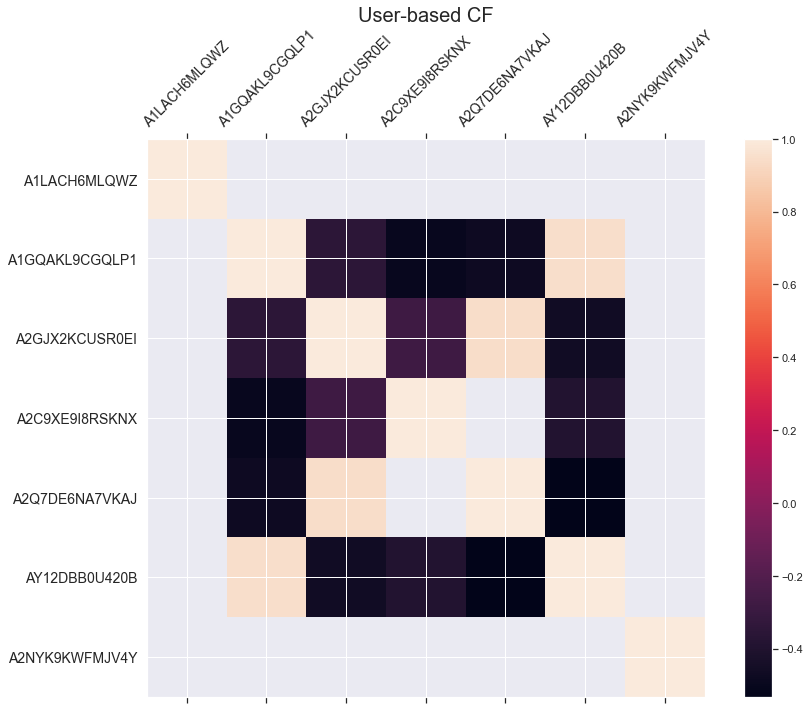

In [32]:
f = plt.figure(figsize=(14, 10))
plt.matshow(user_corr, fignum=f.number)
plt.xticks(range(user_corr.shape[1]), user_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(user_corr.shape[1]), user_corr.columns, fontsize=14)
plt.title("User-based CF", fontsize = 20) 
cb = plt.colorbar()

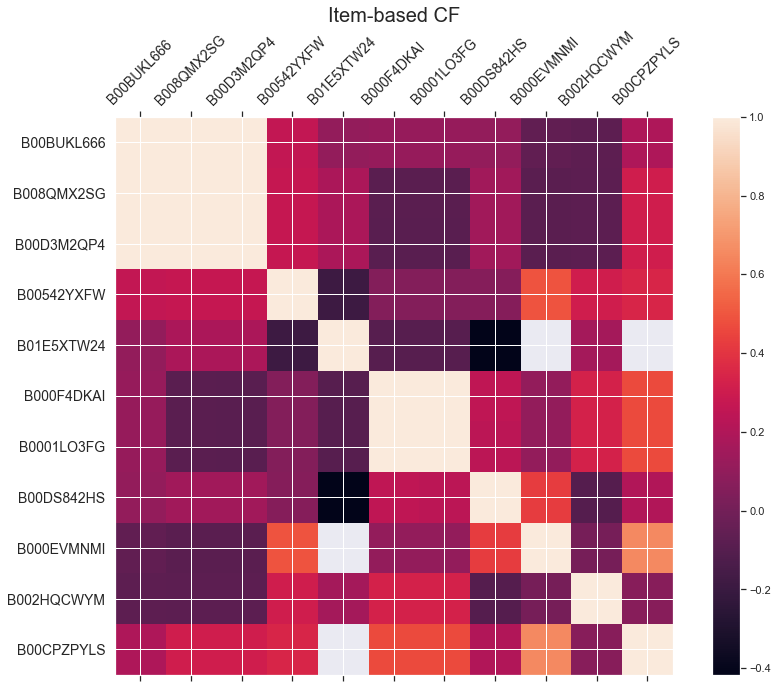

In [33]:
f = plt.figure(figsize=(14, 10))
plt.matshow(item_corr, fignum=f.number)
plt.xticks(range(item_corr.shape[1]), item_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(item_corr.shape[1]), item_corr.columns, fontsize=14)
plt.title("Item-based CF", fontsize = 20) 
cb = plt.colorbar()

#### 3.2.1.1 User-based CF using `df_user`

For this example, we will make predictions for user `user_idx[]`. Our 'neighborhood' for a user - users with $K=5$ highest correlations. Find these users and print their ratings and correlations to user `user_idx[]`.

In [34]:
K = 5
user_idx = df_user.index.tolist()
user_id = user_idx[2] # user id, NOTE: sometimes there might be no correlation of that user, depending on the data 
user_id

'A2GJX2KCUSR0EI'

In [35]:
# selecting K neighbors 
neighbours_corr_user_based = user_corr[user_id].sort_values(ascending=False)[1: K+1]
neighbours_corr_user_based

A2Q7DE6NA7VKAJ    0.943880
A2C9XE9I8RSKNX   -0.280272
A1GQAKL9CGQLP1   -0.347569
AY12DBB0U420B    -0.464827
A1LACH6MLQWZ           NaN
A2NYK9KWFMJV4Y         NaN
Name: A2GJX2KCUSR0EI, dtype: float64

In [36]:
neighbours_ratings_user_based = df_user.loc[neighbours_corr_user_based.index]
neighbours_ratings_user_based

,B000E1FZHS,B000U0OUP6,B00XOORKRK,B00RW0MZ6S,B000LQTTVY,B000H26J7E,B0019ZHU2Q,B00BUKL666,B00IDCFXG8,B003KLK9F2,...,B00F1AE9J2,B00F1JV78O,B00F1MULHO,B00F45QRQM,B00F9TDVTY,B00F9WUPI6,B00F9WWD54,B00FCV3R3Y,B00FD4UL4I,B00TBUHRRO
A2Q7DE6NA7VKAJ,5.0,5.0,5.0,5.0,5.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2C9XE9I8RSKNX,5.0,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1GQAKL9CGQLP1,3.0,3.0,3.0,3.0,4.5,5.0,5.0,4.5,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AY12DBB0U420B,3.0,3.0,3.0,3.0,NaN,NaN,5.0,4.666667,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
A1LACH6MLQWZ,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN
A2NYK9KWFMJV4Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Find a list of missing ratings for the user
missing_ratings_user_based = df_user.loc[user_id]
missing_ratings_user_based = missing_ratings_user_based[missing_ratings_user_based.isnull()]

B000LQTTVY    NaN
B0019ZHU2Q    NaN
B0025UCHYU    NaN
B007FGP4VM    NaN
B001G0MG2I    NaN
             ... 
B00F9WUPI6    NaN
B00F9WWD54    NaN
B00FCV3R3Y    NaN
B00FD4UL4I    NaN
B00TBUHRRO    NaN
Name: A2GJX2KCUSR0EI, Length: 3155, dtype: object

In [38]:
user_mean_user_based = df_user.loc[user_id].mean()
print(user_mean_user_based)

neighbours_means_user_based = neighbours_ratings_user_based.mean(axis=1)
print(neighbours_means_user_based)

4.3228200371057515
A2Q7DE6NA7VKAJ    3.895111
A2C9XE9I8RSKNX    4.265672
A1GQAKL9CGQLP1    4.502373
AY12DBB0U420B     4.668235
A1LACH6MLQWZ      4.915533
A2NYK9KWFMJV4Y    4.901173
dtype: float64


In [39]:
# make rating predictions
for movie_name, val in missing_ratings_user_based.iteritems():
    rating = 0
    weights_sum = 0
    
    for neighbour_id, row in neighbours_ratings_user_based.iterrows():
        if np.isnan(row[movie_name]): continue
        rating += neighbours_corr_user_based.loc[neighbour_id] * (row[movie_name] - neighbours_means_user_based.loc[neighbour_id])
        weights_sum += abs(neighbours_corr_user_based.loc[neighbour_id])
   
    if weights_sum > 0:
        rating /= weights_sum  
    rating += user_mean_user_based
    
    missing_ratings_user_based.at[movie_name] = rating
    
print("======================================================")
print(f"User-based prediction for user: {user_id}")
print("======================================================")
missing_ratings_user_based.sort_values(ascending=False)[0:5]

User-based prediction for user: A2GJX2KCUSR0EI


B000EMQFY4    7.825193
B00C4DTS5Y    7.825193
B003WP43RQ    7.825193
B000RPXWCQ    7.825193
B001EPQVEO    7.825193
Name: A2GJX2KCUSR0EI, dtype: object

We notice that for some users, the prediction score for the product might larger than maximum rating value. This is possible according to the definition of score - user's tendecy to give higher/lower ratings, which is defined as:

$$ r_{xi} = \mu_{x} + \frac{\Sigma_{y \in \mathbf{K}}sim(x,y)(r_{yi}-\mu_{y})}{\Sigma_{y \in \mathbf{K}}|sim(x,y)|}  $$

Where $\mu_x$ is a mean rating for a user and $sim$ can be defined in different ways, for example, as cosine similarity or correlation.

#### 3.2.1.2 Item-based CF using `df_item`

In [40]:
user_idx = df_item.index.tolist()
user_id = user_idx[2] # user id, NOTE: sometimes there might be no correlation of that user, depending on dat

# user_id = 'A1WX42M589VAMQ' # if we try to predict the same user but using the item-based CF approach and different dataframe

# Find a list of missing ratings for the user
missing_ratings_item_based = df_item.loc[user_id]
missing_ratings_item_based = missing_ratings_item_based[missing_ratings_item_based.isnull()]
missing_ratings_item_based

B00542YXFW    NaN
B01E5XTW24    NaN
B00DS842HS    NaN
B000EVMNMI    NaN
B00CPZPYLS    NaN
Name: AVNDHLOBM0LLA, dtype: object

In [41]:
for movie_name, val in missing_ratings_item_based.iteritems():
    rating = 0
    weights_sum = 0
    neighbours_corr = item_corr[movie_name].sort_values(ascending=False)[1: K+1]
    item_mean = df_item[movie_name].mean()
    
    neighbours_ratings = df_item[neighbours_corr.index].transpose()
    neighbours_means = neighbours_ratings.mean(axis=1)
    
    for neighbour_id, row in neighbours_ratings.iterrows():
        if np.isnan(row[user_id]): continue
        rating += neighbours_corr[neighbour_id] * (row[user_id] - neighbours_means[neighbour_id])
        weights_sum += abs(neighbours_corr[neighbour_id])
    if weights_sum > 0:
        rating /= weights_sum
    rating += item_mean
    missing_ratings_item_based.at[movie_name] = rating
    
print("======================================================")
print(f"Item-based prediction for user: {user_id}")
print("======================================================")
missing_ratings_item_based.sort_values(ascending=False)[0:5]

Item-based prediction for user: AVNDHLOBM0LLA


B00CPZPYLS    5.147192
B00DS842HS    5.128283
B000EVMNMI    4.818911
B01E5XTW24    4.801965
B00542YXFW    4.634196
Name: AVNDHLOBM0LLA, dtype: object

### 3.2.2 Content-based filtering (linear model)

#### 3.2.2.1 Text mining of `reviewText` 
The idea is to recommend customers products by analyzing their review texts to see what they prefer and what they don't. This requires the technique of text mining. Due to the computational cost, here we select 10\% of one-year reviews, year of 2018 - instead of full dataset, to demenstate how the text mining technique used to analyze customer's personal preference via their review text gave to products.

In [42]:
df_content = df.copy()
df_content = df_content[df_content.year==2018]
tenPercent = int(df_content.shape[0]*0.1)
df_content = df_content.iloc[0: tenPercent]

Then, we select only neccessary columns to prepare for the text mining.

In [43]:
# select only neccessary columns
df_content= df_content[["overall","reviewerID","asin","reviewText"]]
# rename columns
df_content.columns = ["rating","reviewerID","productID","reviewText"]
# drop row if there is nan value in the column `reviewText`
df_content = df_content.dropna()

Then, we clear up the review text via the following steps:
- remove punctuation
- apply lowercase
- remove stopwords
- apply lemmatization

In [44]:
lemmatizer = WordNetLemmatizer()
stop_Words= _stop_words.ENGLISH_STOP_WORDS
stop_Words = list(stop_Words) 

def text_processing(text):
    # remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # lowercase
    text = "".join([c.lower() for c in text])
    # remove stopwords
    text = " ".join([w for w in text.split() 
                     if w not in stop_Words])
    # stemming / lematizing (optional)
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split()])
    return text

In [45]:
# clean the text before vectorizing
Review_clean = df_content['reviewText'].apply(text_processing)
# Review_clean

Next, vectorizing the text after cleaning before creating the Latent Dirichlet Allocation (LDA) model

In [46]:
# vectorizing of text
vectorizer = CountVectorizer() 
descriptions_bow=vectorizer.fit_transform(Review_clean) 

Now, we can use LDA model, with 20 topics to prepare for content-based dataframe

In [47]:
n_topics = 20 # ------------------------- number of topics for each review
lda = LatentDirichletAllocation(n_components=n_topics, learning_method='batch')
topic = lda.fit_transform(descriptions_bow)

In [48]:
# combine the topics with original `df`
for i in range(n_topics):
    df_content["LDA_topic"+str(i)]=topic[:,i]
df_content.head(3)

,rating,reviewerID,productID,reviewText,LDA_topic0,LDA_topic1,LDA_topic2,LDA_topic3,LDA_topic4,LDA_topic5,...,LDA_topic10,LDA_topic11,LDA_topic12,LDA_topic13,LDA_topic14,LDA_topic15,LDA_topic16,LDA_topic17,LDA_topic18,LDA_topic19
169,4,A20LEK2JTETFA4,4639725043,Works well in coffee maker,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,...,0.012500,0.012500,0.262497,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.512503
170,5,A1G3KT0T83DBHK,4639725043,About 15 years ago I was visiting a friend in ...,0.001282,0.001282,0.001282,0.001282,0.001282,0.070515,...,0.388520,0.001282,0.001282,0.113090,0.001282,0.001282,0.246607,0.069600,0.001282,0.001282
171,5,A2M5O0Z0B69JOK,4639725043,This tea is *very* strong compared to other l...,0.003125,0.003125,0.003125,0.133329,0.003125,0.003125,...,0.098442,0.003125,0.003125,0.003125,0.003125,0.003125,0.715104,0.003125,0.003125,0.003125


We would like to see top words for each topic, so here we print the 10 top words for those 20 topics

In [49]:
def print_top_words(model, feature_names, n_top_words):
    norm = model.components_.sum(axis=1)[:, np.newaxis]
    for topic_idx, topic in enumerate(model.components_):
        print(80 * "-")
        print("Topic {}".format(topic_idx))
        for i in topic.argsort()[:-n_top_words - 1:-1]:
            print("{:.3f}".format(topic[i] / norm[topic_idx][0]) 
                  + '\t' + feature_names[i])

In [50]:
print("10 Top words for those topics in LDA model:")
counts_feature_names = vectorizer.get_feature_names() # count_vect = CountVectorizer()
n_top_words = 10
print_top_words(lda, counts_feature_names, n_top_words)

10 Top words for those topics in LDA model:
--------------------------------------------------------------------------------
Topic 0
0.026	bread
0.017	make
0.015	use
0.012	bean
0.012	bear
0.009	gummy
0.009	just
0.009	machine
0.008	time
0.008	yeast
--------------------------------------------------------------------------------
Topic 1
0.248	love
0.051	flavor
0.019	gum
0.019	kid
0.017	taste
0.016	fruit
0.015	cake
0.014	oil
0.008	stuff
0.008	jelly
--------------------------------------------------------------------------------
Topic 2
0.323	good
0.051	taste
0.033	yummy
0.029	really
0.027	price
0.022	product
0.022	flavor
0.018	stuff
0.017	like
0.017	better
--------------------------------------------------------------------------------
Topic 3
0.053	amazing
0.036	size
0.033	exactly
0.031	wonderful
0.031	bag
0.026	small
0.020	described
0.018	large
0.014	fresh
0.014	delicious
--------------------------------------------------------------------------------
Topic 4
0.025	nice
0.022	recommend


#### 3.2.2.2 Recommender system based on customer's preference profile 

**Step 1**: select target customers for recommedation

In [51]:
# total no. of reviwer
reviewers_count = df_content['reviewerID'].value_counts()
n_reviewers = reviewers_count.count()

# get reviewers giving more than 20 reviews
n_giving = int(np.quantile(reviewers_count, 0.9))
target_users = reviewers_count[reviewers_count > n_giving].index
n_target_user = len(target_users)

# target customer id
user_id = target_users[0]
user_id

print("===================================================================")
print(f"There are total {n_reviewers} reviewers in the dataset")
print(f"There are ONLY {n_target_user} giving more than {n_giving} reviews")
print(f"Target customer id:",user_id)
print("===================================================================")

There are total 43650 reviewers in the dataset
There are ONLY 2362 giving more than 2 reviews
Target customer id: A2C7LMOT0SEBRK


**Step 2**: build target customer's profiles for recommedation

In [52]:
def customer_profiles(df,user_id):
    X = df[df.reviewerID==user_id].iloc[:,4:24].values
    y = df[df.reviewerID==user_id].iloc[:,0].values
    
    lr_hyperparams = {'penalty':'l2', 'C':1000, 'solver':'lbfgs'}
    lr = LogisticRegression(**lr_hyperparams) 
    profiles = lr.fit(X, y)
    
    print('===============================================')
    print(f"User: {user_id} giving {len(y)} reviews")
    print(f"LogisticRegression Score:",profiles.score(X, y))
    print('===============================================')
    print("Overall bias:", profiles.intercept_[0])
    
    f = plt.figure(figsize=(10, 8))
    plt.barh(df.iloc[:,4:24].columns.values, profiles.coef_[0] )
    plt.xlabel("Coefficient for each topic")
    plt.title(f"{user_id}  profiles preferences - based on topics in review text")
    plt.show()
    return profiles

User: A2C7LMOT0SEBRK giving 23 reviews
LogisticRegression Score: 1.0
Overall bias: -1.1383858633378765


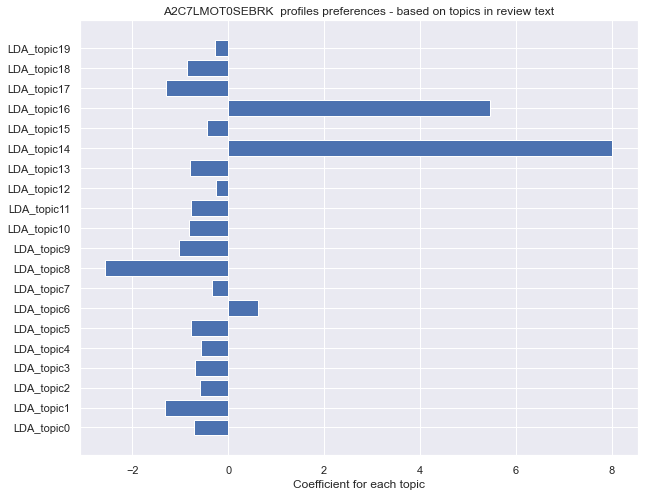

In [53]:
profiles = customer_profiles(df_content,user_id)

**Step 3**: predict rating based on target customer's profile

In [54]:
# predict all rows' rating 
X_all = df_content.iloc[:,4:24].values
df_user_id = df_content.copy()

def pred_ratings(df,profiles,X,user_id):
    print('=====================================================')
    print(f"Predicted rating based on {user_id}'s profiles")
    print('=====================================================')
    y_pred = profiles.predict(X)
    df["pred_rating"] = y_pred
    return df

In [55]:
pred_df = pred_ratings(df_user_id,profiles,X_all,user_id)

# predicted rating based on user_id's preferences
productID_index= pred_df[pred_df.reviewerID == user_id].productID.value_counts().index
recom_df = pred_df[ (pred_df.reviewerID != user_id) & (~pred_df.productID.isin(productID_index))]
recom_df.head(3)

Predicted rating based on A2C7LMOT0SEBRK's profiles


,rating,reviewerID,productID,reviewText,LDA_topic0,LDA_topic1,LDA_topic2,LDA_topic3,LDA_topic4,LDA_topic5,...,LDA_topic11,LDA_topic12,LDA_topic13,LDA_topic14,LDA_topic15,LDA_topic16,LDA_topic17,LDA_topic18,LDA_topic19,pred_rating
169,4,A20LEK2JTETFA4,4639725043,Works well in coffee maker,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,...,0.012500,0.262497,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.512503,5
170,5,A1G3KT0T83DBHK,4639725043,About 15 years ago I was visiting a friend in ...,0.001282,0.001282,0.001282,0.001282,0.001282,0.070515,...,0.001282,0.001282,0.113090,0.001282,0.001282,0.246607,0.069600,0.001282,0.001282,5
171,5,A2M5O0Z0B69JOK,4639725043,This tea is *very* strong compared to other l...,0.003125,0.003125,0.003125,0.133329,0.003125,0.003125,...,0.003125,0.003125,0.003125,0.003125,0.003125,0.715104,0.003125,0.003125,0.003125,1


**Step 4**: recommend products to target customer by predicting rating based on her/his profile

In [56]:
# mean rating of each non-bought product for user_id, based on predicted rating using user_id's preference
print('============================================================================================')
print(f"Products recommended to {user_id} based on her/his reviews's profile with predicted rating")
print('============================================================================================')
recom_df.groupby('productID').pred_rating.mean().sort_values(ascending=False)[0:10]

Products recommended to A2C7LMOT0SEBRK based on her/his reviews's profile with predicted rating


productID
B000F4ET0I    5.0
B000H1327A    5.0
B000GZWDR2    5.0
B000GZY8VG    5.0
B000GZY942    5.0
B000GZY94W    5.0
B000GZY9DS    5.0
B000GZYBIG    5.0
B000H1195C    5.0
B000RHUV6Y    5.0
Name: pred_rating, dtype: float64

### 3.2.3 Matrix factorization

In matrix factorization techniques, we usually represent the rating matrix as a product of 3 other matrices:

$$R = P\Sigma Q^{T}$$

The benefits of those techniques are that they can dramatically improve system performance by reducing the necessary amount of space. 

`surprise` is an easy-to-use Python package for recommender systems. Here we will use the famous Singular Value Decomposition [(SVD) algorithm](http://sifter.org/simon/journal/20061211.html). The document for this model in the Surprise page is [here](http://surprise.readthedocs.io/en/stable/matrix_factorization.html)

First, let's create a dataframe in the format of 
```
userID, movieID, rating
```
to preceed.

In [57]:
""" Here we used the same dataframe `df_item` as those in CF """

data = df_item.copy()
user_ids, movie_ids, ratings = [], [], []

for user_id, row in data.iterrows():
    for movie_id in data.columns:
        rating = row[movie_id]
        if not np.isnan(rating):
            user_ids.append(user_id)
            movie_ids.append(movie_id)
            ratings.append(rating)
ratings_df = pd.DataFrame({'userID':user_ids, 'movieID':movie_ids, 'rating':ratings})
ratings_df = ratings_df[['userID', 'movieID', 'rating']] # correct order

print("============================")
print("The ratings describtion")
print("============================")
ratings_df.describe()

The ratings describtion


,rating
count,78886.000000
mean,4.510511
std,1.062682
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


Next, we create a dataset in the required format for the package of `surprise`. The rating scale should be specified in `Reader`, such as in our case, it is `(0.0,5.0)`

In [58]:
reader = Reader(rating_scale=(0.0, 5.0))
data_surprise = Dataset.load_from_df(ratings_df, reader)
data_train_surprise = data_surprise.build_full_trainset() # use the whole training set 

Now we run the SVD algorithm.

In [59]:
n_factors = 15
lr_all = 0.005 # default value
reg_all = 0.02 # default value

model_SVD = SVD(n_factors=n_factors, lr_all=lr_all, reg_all=reg_all)
model_SVD.fit(data_train_surprise)

Next, for this example, we make the top 5 predictions for a User, such as `user_id = data.index[0]`

In [60]:
user_id = data.index[0]
# user_id = 'A2C7LMOT0SEBRK'

missing_movies_ids = data[data.isna()].loc[user_id].index

recommendations = []
for movie_id in missing_movies_ids:
    r = model_SVD.predict(user_id, movie_id, verbose=False).est
    recommendations.append((movie_id, r))
    
recommendations.sort(reverse=True, key=lambda x: x[1])

print("=========================================================================================")
print(f"The top 5 predictions for user id of {user_id} using the matrix factorization technique")
print("=========================================================================================")
recommendations[:5]

The top 5 predictions for user id of A1NEIH01B5X6QL using the matrix factorization technique


[('B00CPZPYLS', 5.0),
 ('B008QMX2SG', 4.995163922659586),
 ('B00D3M2QP4', 4.985990996657806),
 ('B00BUKL666', 4.911395610476932),
 ('B00DS842HS', 4.874642387540755)]

For the computational convenience, we used different recommendation algorithms for different users to demenstrate the ideas of recommendation system. You might notice that the recommendations to the same user could be quite different when using different algorithms. To estimate performance of the each approache, it is suggested to do train/test split (or cross-validation). But, we will skip this comparison here. 

## 3.3 SVD-based recommender system

Finally, let's try to build a recommender system based on SVD and evaluate its performance against the common baselines. We will use the same data as before.

In [321]:
""" Here we used the same dataframe `df_item` as those in CF """
def df_ratings (df,Type):  # e.g. df_ratings(df_item,"user") df_ratings(df_user,"item")
    data = df.copy()
    users, items, ratings = [], [], []
    for user, row in data.iterrows():
        for item in data.columns:
            rating = row[item]
            if not np.isnan(rating):
                users.append(user)
                items.append(item)
                ratings.append(rating)
    ratings_df = pd.DataFrame({'user':users, 'item':items, 'rating':ratings})
    ratings_df = ratings_df[['user', 'item', 'rating']] # correct order
    
    count = ratings_df[Type].value_counts()
    target= count[count > 2].index
    ratings_df = ratings_df[ ratings_df[Type].isin(target) ].reset_index(drop=True) 
    return ratings_df

We decided to use `df_item` dataframe for SVD algoritm as it has 26309 rows, as shown below.

In [322]:
ratings_df = df_ratings(df_item,"user")
# ratings_df = df_ratings(df_user,"item")

In [323]:
ratings_df

,user,item,rating
0,A1NEIH01B5X6QL,B00BUKL666,5.0
1,A1NEIH01B5X6QL,B008QMX2SG,5.0
2,A1NEIH01B5X6QL,B00D3M2QP4,5.0
3,A1NEIH01B5X6QL,B01E5XTW24,5.0
4,A1NEIH01B5X6QL,B000EVMNMI,5.0
...,...,...,...
26304,A3QHEPJER3W35V,B008QMX2SG,5.0
26305,A3QHEPJER3W35V,B00D3M2QP4,5.0
26306,A3RNNT3FENRN72,B00BUKL666,5.0
26307,A3RNNT3FENRN72,B008QMX2SG,5.0


### 3.3.1 Data and Train/test split

We use 70%/% 30 train/test split. 

In [324]:
def train_indx(ratings_df,Type): # train_ind(ratings_df,"item") in case of using the df_user
    train_ind, test_ind = [], []
    for idx in ratings_df[Type].unique():
        rows = ratings_df[ratings_df[Type] == idx]
        ind = rows.index[:1].values.tolist()
        train_ind += ind
    return train_ind, test_ind

# train_ind, test_ind = train_indx(ratings_df,"item") # user-based dataset
train_ind, test_ind = train_indx(ratings_df,"user") # item-based dataset

c = 0.7 # only valid when the c is larger than b 
b = len(train_ind) / len(ratings_df)
a = (c - b) / (1 - b)

all_ind = set(range(len(ratings_df)))
not_used = list(all_ind - set(train_ind))
not_done = True
np.random.seed(42)
while not_done==True:
    np.random.shuffle(not_used)
    train_ind_ = train_ind + not_used[:int(a * len(not_used))]
    df_train = ratings_df.loc[train_ind_]
    print("No. of items in total and training dataset:",ratings_df.nunique()['item'], df_train.nunique()['item'])
    print("No. of users in total and training dataset: ",ratings_df.nunique()['user'], df_train.nunique()['user'])
    if ratings_df.nunique()['item'] == df_train.nunique()['item'] and ratings_df.nunique()['user'] == df_train.nunique()['user']:
        not_done = False
        train_ind = train_ind_
test_ind = list(all_ind - set(train_ind))
train_ind = sorted(train_ind)
test_ind = sorted(test_ind)
print("Training dataset:", str(round(len(train_ind)/len(all_ind),3)))
print("Testing dataset:", str(round(len(test_ind)/len(all_ind),3)))
np.savetxt('data/data_train.csv', train_ind, fmt="%d")
np.savetxt('data/data_test.csv', test_ind, fmt="%d")

No. of items in total and training dataset: 11 11
No. of users in total and training dataset:  8640 8640
Training dataset: 0.7
Testing dataset: 0.3


In [325]:
# loading the pre-computed indices
train_ind = np.loadtxt('data/data_train.csv', dtype=int)
test_ind = np.loadtxt('data/data_test.csv', dtype=int)

In [326]:
print("number of training samples:", train_ind.shape[0])
print("number of test samples:", test_ind.shape[0])

number of training samples: 18416
number of test samples: 7893


In [327]:
df_train = ratings_df.iloc[train_ind]
df_test = ratings_df.iloc[test_ind]

### 3.3.2 Baselines <font color=red> How to interprate the results </font>

We use 4 baseline models:
1. Global mean
2. User's mean
3. Item's mean
4. Global + deviation of user + deviation of the item

We estimate each of above baseline model on the training set and calculate RMSE on the test set. Also, we made boxplots for the visualization of the predictions. 

In [328]:
def RMSE(y_true, y_pred):
    return np.linalg.norm(y_true - y_pred) / np.sqrt(len(y_true))

In [329]:
# A plotter to make boxplot
def MakeBoxplot(y_true, y_pred, title):
    data = [y_pred[y_true == (x*0.5+0.5)] for x in range(10)]
    fig = plt.figure(figsize=(5, 5))
    plt.boxplot(data)
    min_a, max_a = 0., 5.5
    plt.xlim((min_a, max_a))
    plt.ylim((min_a, max_a))
    plt.plot([min_a, max_a * 2], [min_a, max_a], ls='--', color='gray', linewidth=1.0)
    plt.xticks(range(12), [x*0.5 for x in range(12)])
    plt.xlabel('True Rating')
    plt.ylabel('Predicted Rating')
    plt.title(title)
    plt.show()

In [330]:
y_true = df_test['rating'].values

**1. Baseline: Global mean**

global_mean = 4.521023126887593
RMSE = 1.0407326620996171


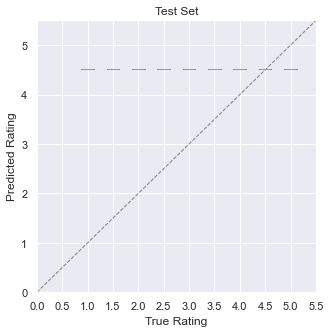

In [331]:
# global mean
global_mean = df_train['rating'].mean()
print("global_mean =", global_mean)
# prediction
y_pred = []
for i, row in df_test.iterrows(): 
    y_pred.append(global_mean)
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)

# performance
error = RMSE(y_true, y_pred)
print("RMSE =", error)
MakeBoxplot(y_true, y_pred, 'Test Set')

**2. Baseline: User's mean**

RMSE = 0.22784911525306994


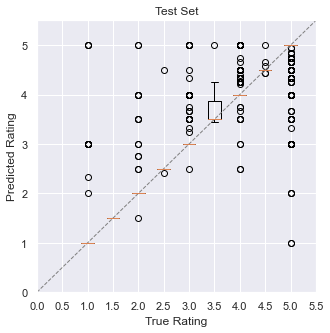

In [332]:
# user mean
user_mean = df_train.groupby('user')['rating'].mean()
# prediction
y_pred = []
for i, row in df_test.iterrows():
    y_pred.append(user_mean[row['user']])
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# performance
error = RMSE(y_true, y_pred)
print("RMSE =", error)
MakeBoxplot(y_true, y_pred, 'Test Set')

**3. Baseline: Item's mean**

RMSE = 1.0403453654785006


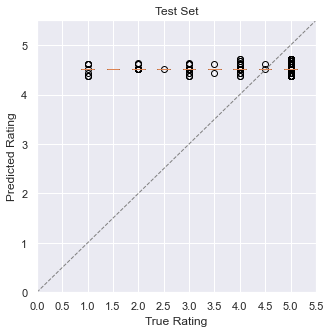

In [333]:
# item mean
item_mean = df_train.groupby('item')['rating'].mean()
# prediction
y_pred = []
for i, row in df_test.iterrows():
    y_pred.append(item_mean[row['item']])
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# performance
error = RMSE(y_true, y_pred)
print("RMSE =", error)
MakeBoxplot(y_true, y_pred, 'Test Set')

**4. Baseline: Global + deviation of user + deviation of the item**

RMSE = 0.22613024324999695


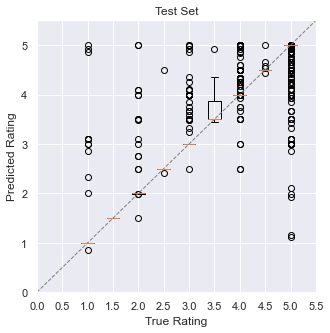

In [334]:
# Combined model
# prediction
y_pred = []
for i, row in df_test.iterrows():
    r = user_mean[row['user']] + item_mean[row['item']] - global_mean
    y_pred.append(r)
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# performance
error = RMSE(y_true, y_pred)
print("RMSE =", error)
MakeBoxplot(y_true, y_pred, 'Test Set')

### 3.3.3 Trying to beat the baselines with SVD 

Here, we try to beat the baselines with SVD. Note, that SVD has many hyperparameters, where the number of factors (`n_factors`) and regularization strength (`reg_all`) are the most important. But, we also try to tune the factors of `n_epochs`, and `lr_all`, as shown below.

In [342]:
reader = Reader(rating_scale=(0.0, 5.0))
data_surprise = Dataset.load_from_df(df_train, reader)

In [351]:
param_grid = {
    'n_epochs': [60], 
    'lr_all': [0.005, 0.05],
    'reg_all': [0.01, 0.1], # key 
    'n_factors': [10, 25, 50], # key
#     'biased': [True, False]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data_surprise)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.577678201623055
{'n_epochs': 60, 'lr_all': 0.05, 'reg_all': 0.01, 'n_factors': 50}


In [352]:
# We can now use the algorithm that yields the best rmse:
model = gs.best_estimator['rmse']
model.fit(data_surprise.build_full_trainset())

In [353]:
user_ids_true = df_test['user'].values
movie_ids_true = df_test['item'].values

RMSE = 0.17471916324279607


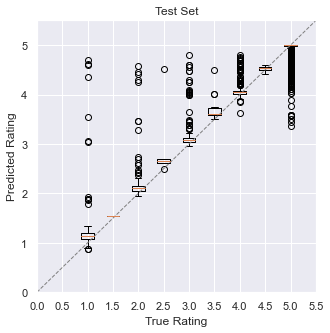

In [354]:
y_pred = []
for user_id, movie_id in zip(user_ids_true, movie_ids_true):
    r = model.predict(user_id, movie_id, verbose=False).est
    y_pred.append(r)
y_pred = np.array(y_pred)
# performance
error = RMSE(y_true, y_pred)
print("RMSE =", error)
MakeBoxplot(y_true, y_pred, 'Test Set')

---
<a id='dataprep'></a>

# Part 4: Custom Recommender engine  <font color=red> Needs rephrasing and ordering </font>

To expand on the basic recommender system introduced in part 3, a neural network based on four different nerual networks is implemented and tested in this section. The structure of this section will be as follows:

* 4.0 Preprocessing and utility functions

* 4.1 A network combining the user and product embeddings to predict the rating. 

* 4.3 Apply more advanced methods found through litterature review. Of main interest will be building a composite neural network that leverages rating information as well as context and content information about the products.
* 4.4 Discuss which model performs best and why. This step will involve trying to make sense of which products are recommended/disrecommended by the model and why.
* 4.5 Show a few 'proof-of-concept' examples of how the recommender system could function in practice. This step primarily concerns devising a simple solution for problems such as "what if the user doesn't buy the recommended items?". Steps 2.1-2.4 will all have a clear quantitative performance metric (MSE of rating predictions) while the point of step 2.5. is to devise solutions for problems our recommender system might face in real-time shopping situations. Seing as we do not have access to real-time data this step will remain in a 'proof-of-concept' state.

Brief litterature overview:
A brief litterature review was undertaken to find useable resources and guide the work with the recommender system. It was found that a considerable amount of litterature sought to leverage the text contained within reviews as a means of improving recommender systems. The reviews were seen as a potential source of raw implicit feedback (e.g. analyzing the sentiment of the review) as well as a way of extracting more detailed content about the products. The texts typically sought to combine LDA and MF (matrix factorization) either through bayesian approaches or neural networks. The two main .. we have used..

## 4.0 Preprocessing ##

In order to prepare the data for analysis the following steps are taken. The code for these preparation steps are contained in 'Preparation.ipynb'.
* Identify products with multiple reviews by the same user. Keep only the most recent review.
* Split the data so that each user must have at least 5 reviews in the dataset.
* Recode the 'bottomcat' variable such that categories with less than 10 reviews are categorized as 'other'.
* Dummy-encode the 'bottomcat' variable.
* Discretize ratings based on >= 4 as cutoff-point.
* Standardize continuous features.
* Re-enumerate user and product IDs for use with the Keras embedding layer
* Create both a product X user ratings matrix and a long-form [user, product, ratings, features, context] dataframe. The format of these dataframes is shown below.
* Preprocess review text (remove stopwords etc.)

Finally a train/test split based on the recommender system notebook from the course was made - i.e. it was made sure that each user had at least 2 reviews in the train set. It was also considered to make the test-set be unseen products so that the purpose of the recommender system was to recommend new items to users. However, we have stuck with the first approach meaning that we're currently testing the recommender system on its ability to recommend a corpus of already existing items to a corpus of already existing users.

(The code for preprocessing is in the collapsed box below)

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, preprocessing
from tensorflow.keras import models, layers, utils
import keras_tuner as kt
from tensorflow import keras
dfs=pd.read_csv("preprocessed.csv")
dfs=dfs.iloc[:,3:]


#dropping duplicates
dfs=dfs[~dfs[['reviewerID', 'asin']].duplicated()]


#only using users with more than 4 reviews
mask=dfs.groupby('reviewerID').count()['asin']
mask=mask[mask>4]
dfs=dfs[dfs['reviewerID'].isin(mask.index)]

#Recoding bottomcat
counts=dfs.groupby('bottomcat').count()['overall']
counts=counts[counts>10]
dfs['bottomcat_other']=[i if i in counts else 'other' for i in dfs['bottomcat']]

#making rating discrete
dfs['disc_rating']=(dfs['overall']>4).astype(int)


#recoding nan votes to 0 
dfs['vote']=dfs['vote'].fillna(0)


#Renumerate user and product ids
dfs['reviewerID'], list_userids=pd.factorize(dfs['reviewerID'])
dfs['asin'], list_itemids=pd.factorize(dfs['asin'])


#Make pivot-table user X product ratings DF
df_cf=dfs.pivot_table(index="reviewerID", columns="asin", values="overall")


# Recoding verified
dfs.loc[dfs['verified']=='SAND', 'verified']=1
dfs.loc[dfs['verified']=='FALSK', 'verified']=0


# Merging unixtime
df4=pd.read_csv('merged_df.csv')
dfs=dfs.join(df4['unixReviewTime'])


#Text preprocessing
from sklearn.feature_extraction import _stop_words
import string
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
lemmatizer = WordNetLemmatizer()
Stop_Words= _stop_words.ENGLISH_STOP_WORDS

def text_processing(text):
    # remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # lowercase
    text = "".join([c.lower() for c in text])
    # remove stopwords
    text = " ".join([w for w in text.split() 
                     if w not in Stop_Words])
    # stemming / lematizing (optional)
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split()])
    return text

dfs['reviewText_cleaned'] = dfs['reviewText'].apply(text_processing)



# Calculating sentiment for review text and adding it to the dataframe
sid_obj = SentimentIntensityAnalyzer()

dfs['compound'] = [sid_obj.polarity_scores(x)['compound'] for x in dfs['reviewText_cleaned']]
dfs['neg'] = [sid_obj.polarity_scores(x)['neg'] for x in dfs['reviewText_cleaned']]
dfs['neu'] = [sid_obj.polarity_scores(x)['neu'] for x in dfs['reviewText_cleaned']]
dfs['pos'] = [sid_obj.polarity_scores(x)['pos'] for x in dfs['reviewText_cleaned']]

########## Alternative train/test split (unseen products)
# Split data, keep 20% for testing.
#split = int(0.8*df_cf.shape[1])
#df_train = df_cf.iloc[:, :split-1]
#df_test = df_cf.iloc[:, split:]


# Convert to stacked format
#train = df_train.stack(dropna=True).reset_index().rename(columns={0:"overall"})
#train.columns=['user', 'product', 'overall']
#test = df_test.stack(dropna=True).reset_index().rename(columns={0:"overall"})
#test.columns=['user', 'product', 'overall']


###################################################################################################
############ Train / test splits ###############
ratings_df = df_cf.stack(dropna=True).reset_index().rename(columns={0:"overall"})
ratings_df.columns=['user', 'product', 'overall']

train_ind, test_ind = [], []
# For each person, make sure at least 2 reviews are in train_ind
for movie_id in ratings_df['product'].unique():
    rows = ratings_df[ratings_df['product'] == movie_id]
    ind = rows.index[:2].values.tolist()
    train_ind += ind

c = 0.7
b = len(train_ind) / len(ratings_df)
a = (c - b) / (1 - b)
print(a)

# Get all indices
all_ind = set(range(len(ratings_df)))
# Remove those that should be transferred to train set
not_used = list(all_ind - set(train_ind))
not_done = True
np.random.seed(42)
while not_done==True:
    # Shuffle test indices
    np.random.shuffle(not_used)
    train_ind_ = train_ind + not_used[:int(a * len(not_used))]
    df_train = ratings_df.loc[train_ind_]
    #print(ratings_df.nunique()['product'], df_train.nunique()['product'])
    #print(ratings_df.nunique()['user'], df_train.nunique()['user'])
    # Make sure train set contains all unique users and products
    if ratings_df.nunique()['product'] == df_train.nunique()['product'] and ratings_df.nunique()['user'] == df_train.nunique()['user']:
        not_done = False
        train_ind = train_ind_
        
# Make test_ind be the remainder
test_ind = list(all_ind - set(train_ind))
train_ind = sorted(train_ind)
test_ind = sorted(test_ind)
print(len(train_ind)/len(all_ind))
print(len(test_ind)/len(all_ind))
#np.savetxt('data/data_train.csv', train_ind, fmt="%d")
#np.savetxt('data/data_test.csv', test_ind, fmt="%d")

df_train = ratings_df.iloc[train_ind]
df_test = ratings_df.iloc[test_ind]

###################################################################################################
#Getting dummy variables
dummy_df=pd.get_dummies(dfs, columns=['bottomcat_other'], drop_first=True)
dummy_df['product']=dummy_df['asin']
dummy_df['user']=dummy_df['reviewerID']
merger_df=dummy_df.drop(columns=['overall', 'asin', 'reviewerID', 'summary', 'reviewTime', 'style', 'bottomcat'
                                 , 'main_cat', 'day', 'month', 'year', 'season'])

#merging the dfs
trainf=df_train.merge(merger_df, how = 'inner', on = ['product', 'user'])
testf=df_test.merge(merger_df, how = 'inner', on = ['product', 'user'])


#standardizing using train mean/sd
continuous = ['vote', 'price', 'review_length']
means_sds_for_standardizing = np.zeros((len(continuous),2))
a=0
for i in continuous:
    meantr=np.nanmean(trainf.loc[:, i])
    stdtr=np.nanstd(trainf.loc[:, i])
    means_sds_for_standardizing[a,0]=meantr
    means_sds_for_standardizing[a,1]=stdtr
    a+=1
    trainf.loc[:,i]=(trainf.loc[:,i]-meantr)/stdtr
    testf.loc[:,i]=(testf.loc[:,i]-meantr)/stdtr

#padding missing values
trainf['price']=trainf['price'].fillna(np.mean(trainf['price']))
testf['price']=testf['price'].fillna(np.mean(trainf['price']))


# Utils
'''
Plot loss and metrics of keras training.
'''
def utils_plot_keras_training(training):
    metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
    
    ## training
    ax[0].set(title="Training")
    ax11 = ax[0].twinx()
    ax[0].plot(training.history['loss'], color='black')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
    ax11.legend()
    
    ## validation
    ax[1].set(title="Validation")
    ax22 = ax[1].twinx()
    ax[1].plot(training.history['val_loss'], color='black')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax22.plot(training.history['val_'+metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")
    plt.show()
    

from sklearn.metrics import r2_score

def PerformanceMetrics(ytrue, ypred, ydiff, cutoff):
    r2_model=r2_score(ytrue, ypred) # Calculate r2_score of predictions

    squarederror_model = (ytrue-ypred)**2 # Calculate SE of predictions
    MSE_model=squarederror_model.mean() # MSE

    abserror_model = np.abs(ytrue-ypred) # Calculate AE of predictions
    MAE_model = abserror_model.mean()

    APE_model = 100*np.abs((ytrue-ypred)/ytrue) # Calculate APE of predictions
    MAPE_model = APE_model.mean()
    positives_obs = (ytrue>=cutoff).sum()
    negatives_obs = (ytrue<cutoff).sum()
    positives_pred = (ypred>=cutoff).sum()
    negatives_pred = (ypred<cutoff).sum()

    tn = np.sum((ytrue<cutoff)&(ypred<cutoff))
    tp = np.sum((ytrue>=cutoff)&(ypred>=cutoff))
    fn = np.sum((ytrue>=cutoff)&(ypred<cutoff))
    fp = np.sum((ytrue<cutoff)&(ypred>=cutoff))

    #perc=test[test['overall']>=4].shape[0]/test.shape[0]
    #q=test['yhat'].quantile(1-perc)
    #positives_c = test[test['yhat']>=q].shape[0]
    #negatives_c = test[test['yhat']<q].shape[0]

    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1=2*(precision*recall)/(precision+recall)
    specificity = tn/(tn+fp)
    
    # Hvor mange er forudsagt mindre end de faktisk er
    under_modeln=np.sum(ydiff<0)

    # Hvor mange er forudsagt større end de faktisk er
    over_modeln=np.sum(ydiff>0)
    
    # Lige på
    equal_modeln = np.sum(ydiff==0)


    KPI_model = np.array([r2_model, MSE_model, MAE_model, MAPE_model, under_modeln, over_modeln, equal_modeln,
                         tp, tn, fp, fn, accuracy, precision, recall, f1, specificity])
    KPIdf=pd.DataFrame(KPI_model).T
    KPIdf.columns=['r2', 'MSE', 'MAE', 'MAPE', 'pred<true', 'pred>true', 'equal', 'TP', 'TN', 'FP', 'FN',
                  'Accuracy', 'Precision', 'Recall', 'f1', 'Specificity']


    return KPIdf, KPI_model


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0.4337410071942445
0.6999110659382544
0.30008893406174564


In [2]:
trainf.head()

,user,product,overall,verified,reviewText,vote,price,review_length,disc_rating,unixReviewTime,...,bottomcat_other_Turmeric,bottomcat_other_Unpopped,bottomcat_other_Vanilla Beans,bottomcat_other_Vegetable,bottomcat_other_Vegetable Soups,bottomcat_other_Vinaigrette,bottomcat_other_Wheat Flours & Meals,bottomcat_other_White,bottomcat_other_Wild,bottomcat_other_other
0,0,0,5.0,1,Gift for college student.,-0.291336,-0.598925,-0.889304,1,1476316800,...,0,0,0,0,0,0,0,0,0,0
1,0,10,5.0,1,Love this product.,-0.291336,-1.032529,-0.920310,1,1423440000,...,0,0,0,0,0,0,0,0,0,0
2,0,111,2.0,1,Doesn't work so well.,-0.291336,-1.116913,-0.907022,0,1376352000,...,0,0,0,0,0,0,0,0,0,0
3,0,1343,5.0,1,One of Bigelow's best teas. I will definitely...,-0.291336,-0.389912,-0.499512,1,1245888000,...,0,0,0,0,0,0,0,0,0,0
4,0,1414,5.0,0,Love Bear Creek Country Kitchens Soup Mixes. ...,-0.291336,0.579857,-0.340051,1,1408579200,...,0,0,0,0,0,0,0,0,0,0


## 4.1 Baseline Surprise SVD model ##
The first model to be tested will be the previously used SVD-based Surprise model from the lecture notebook. This model uses only the user-item ratings matrix and will serve as another baseline against the neural network models that try to incorporate additional product features. 5-fold CV is used to find the optimal hyperparameter combination of the model on the train set.

##### Surprise code #####

In [4]:
# From course notebook

trainf_surprise=trainf[['user', 'product', 'overall']]
from surprise import SVD
from surprise.dataset import Reader, Dataset
reader = Reader(rating_scale=(0, 5.0))
data_surprise = Dataset.load_from_df(trainf_surprise, reader)

from surprise.model_selection import GridSearchCV
param_grid = {
    'n_epochs': [5, 10, 20], 
    'lr_all': [0.005, 0.05, 0.1],
    'reg_all': [0.005, 0.01, 0.1], 
    'n_factors': [2, 5, 10, 25, 50],
    #'biased': [True, False]
}

gs = GridSearchCV(SVD, param_grid, measures=['mse', 'mae'], cv=5)

gs.fit(data_surprise)

# best RMSE score
print(gs.best_score['mse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['mse'])

# We can now use the algorithm that yields the best rmse:
model = gs.best_estimator['mse']
model.fit(data_surprise.build_full_trainset())
user_ids_true = testf['user'].values
prod_ids_true = testf['product'].values

from sklearn.metrics import mean_squared_error as MSE
y_pred = []
for user_id, prod_id in zip(user_ids_true, prod_ids_true):
    r = model.predict(user_id, prod_id, verbose=False).est
    y_pred.append(r)
y_pred = np.array(y_pred)
# performance
y_true=testf['overall']
error = MSE(y_true, y_pred)
print("MSE =", error)

1.0471630974464252
{'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.005, 'n_factors': 25}
MSE = 0.9902034436028334


In [5]:
#hide
# Creating dataframe to hold results from all models
pred_df=testf[['user', 'product', 'overall']].copy()
# Making predictions for the SVD model
pred_df['yhat_surprise']=y_pred

### 4.1.1 Performance of SVD model ###

#### 4.1.1.1 regression metrics ####
The below table shows regression metrics for the SVD model vs the baseline mean-model. The cutoff point used for the classification metrics are defined as follows:
* A prediction is considered a true positive if both the predicted rating and actual rating are above 4 (i.e. rating is discretized with >4 as a cutoff-point).

As can be seen from the very low specificity the model is not very good at identifying true negatives - e.g. the model is overly optimistic that the predicted ratings for a product will be high. This can also be seen from the histogram below, where the vast majority of predictions have a rating between 4 and 5. The consequence, as shown on the box-plot, is that regardless of what the true rating of the product is, the predicted rating will be largely the same (mean around 4.2). Furthermore, for the products with observed ratings of 5, the model seems to show a slight right-skew in its predictions.

In [6]:
KPIdf, _ = PerformanceMetrics(pred_df['overall'], pred_df['yhat_surprise'],
                             pred_df['overall']-pred_df['yhat_surprise'], 4)

pred_df['base']=trainf['overall'].mean()
KPIbase, _ = PerformanceMetrics(pred_df['overall'], pred_df['base'],
                             pred_df['overall']-pred_df['base'], 4)
KPI=pd.concat([KPIdf, KPIbase],axis=0)
KPI.index=['Surprise', 'Baseline (mean)']
KPI.round(2)

,r2,MSE,MAE,MAPE,pred<true,pred>true,equal,TP,TN,FP,FN,Accuracy,Precision,Recall,f1,Specificity
Surprise,0.06,0.99,0.72,28.16,626.0,1735.0,1.0,1911.0,52.0,289.0,110.0,0.83,0.87,0.95,0.91,0.15
Baseline (mean),-0.00,1.05,0.78,30.00,650.0,1712.0,0.0,2021.0,0.0,341.0,0.0,0.86,0.86,1.00,0.92,0.00


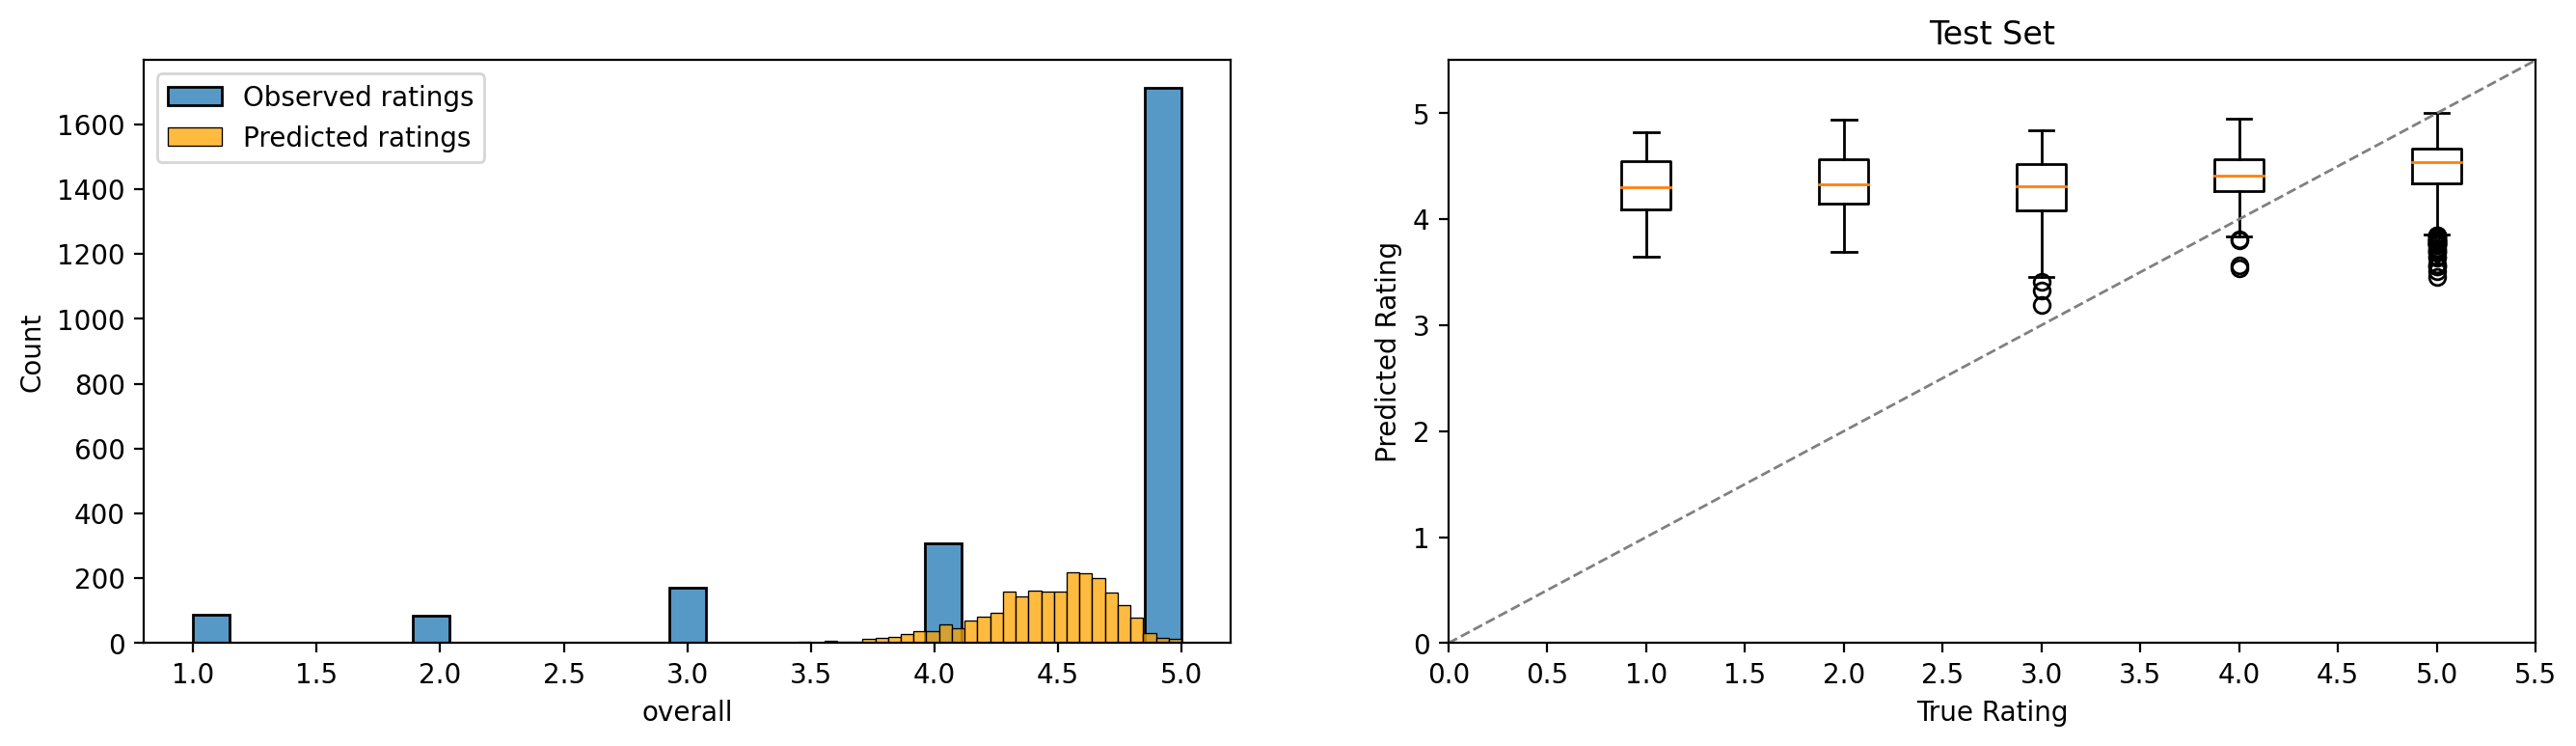

In [28]:
# A plotter to make boxplot
def MakeBoxAndHistplot(y_true, y_pred, title, pred_df, target):
    data = [y_pred[y_true == (x*0.5+0.5)] for x in range(10)]
    figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4), dpi=200)
    #fig = plt.figure(figsize=(5, 5))
    sns.histplot(data=pred_df, x="overall", ax=axes[0])
    sns.histplot(data=pred_df, x=target, color='orange', ax=axes[0])
    axes[0].legend(['Observed ratings','Predicted ratings'])
    axes[1].boxplot(data)
    min_a, max_a = 0., 5.5
    plt.xlim((min_a, max_a))
    plt.ylim((min_a, max_a))
    axes[1].plot([min_a, max_a * 2], [min_a, max_a], ls='--', color='gray', linewidth=1.0)
    plt.xticks(range(12), [x*0.5 for x in range(12)])
    plt.xlabel('True Rating')
    plt.ylabel('Predicted Rating')
    plt.title(title)
    plt.show()
    
MakeBoxAndHistplot(testf['overall'], y_pred, 'Test Set', pred_df, 'yhat_surprise')

#### 4.1.1.2 Recommender-rank metrics ####
Although the regression metrics suggest that the model is not good at accurately predicting the rating of products with low observed ratings, this does not neccesarily mean that the model is unable to discern products with high observed ratings from products with low observed ratings. The situation is shown on figure x. We can check the model's ability to discern highly rated from lowly rated products by using rank-based metrics - i.e. how many of the n-products with highest predicted ratings are also among the n-products with highest observed ratings. These metrics are as follows:
* Hit rate: How many of the products actually purchased by user x, are among the n-most recommended items for user x. 
* % Hit rate: How large a percentage of the products purchased by user x, are among the n-most recommende items for user x.
* Mean rank: What is the mean rank of the products purchased by user x, among the n-most recommended items. For example, if user x purchased item 10 and item 10 was the highest recommended item (highest predicted rating), the rank of item 10 becomes 1/1 = 1. If item 10 was the second highest predicted item, the rank would be 1/2 = 0.5 and so on.
* Finally, we visualize and check the correlation between the predicted rating of a product and the amount of times a product has been purchased. It would be great if our recommender system recommended items that also turned out to often be bought. However, this task is difficult, and not neccesarily indicative of a good recommender system, because items with low(er) ratings may sometimes be bought as much as items with high ratings. This is the case with our dataset where there is no correlation between the mean rating of a products reviews and the number of purchases of said product (figure x).

As can been seen on figure x, there is no clear relationship between the mean rating of a product and the number of purchases
Note to use: add N to each of the categories


,purchases,mean_rating
purchases,1.000000,-0.047181
mean_rating,-0.047181,1.000000


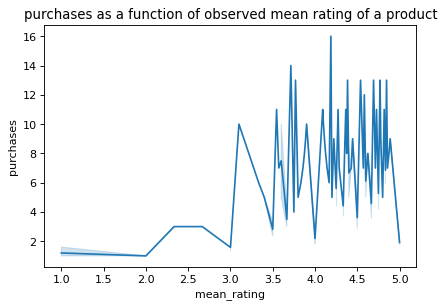

In [7]:
# Get purchase counts
counts=testf.groupby('product').count()[['user']]
counts['overall']=testf.groupby('product').mean()['overall']
counts.columns=['purchases', 'mean_rating']
# Plot the plot
plt.figure(dpi=80)
sns.lineplot(data=counts, x='mean_rating', y='purchases')
plt.title('purchases as a function of observed mean rating of a product')
print("As can been seen on figure x, there is no clear relationship between the mean rating of a product and the number of purchases")
print("Note to use: add N to each of the categories")
counts.corr()

As expected, there is therefore not any correlation or visible pattern between the predicted ratings and the number of purchases either.

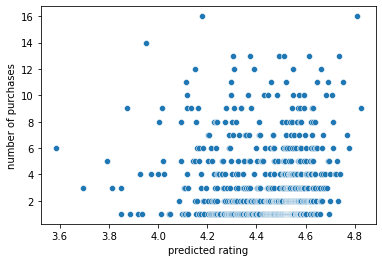

Correlation between predicted rating and number of purchases of said products
-0.0162


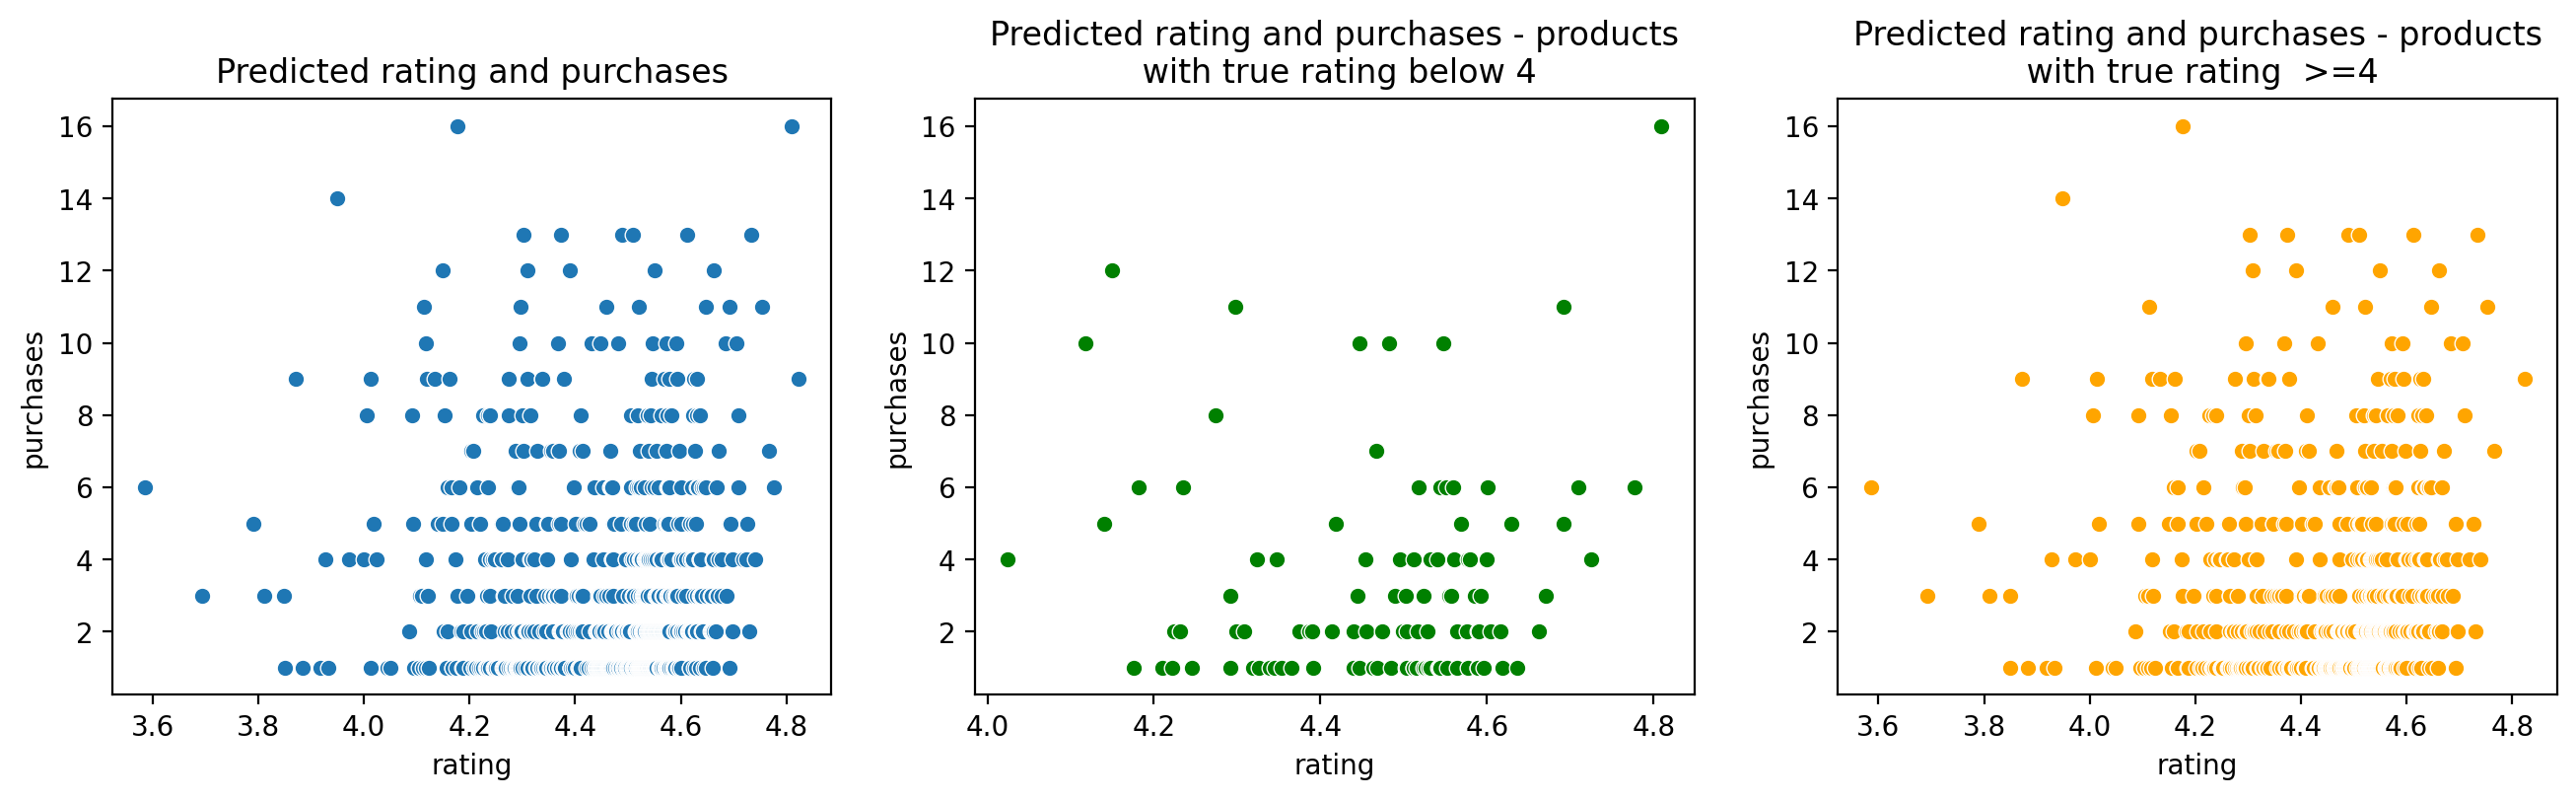

In [8]:
# 1-2 min runtime
## GENERATE PREDICTIONS FOR ALL USER-ITEM COMBINATIONS IN TEST SET
# Generate df_all, item-user dataframe for all predictions (each user has 1 prediction for each product in test)
user_ids_true = pred_df['user'].values
prod_ids_true = pred_df['product'].values
df_all = np.zeros((testf['user'].nunique(), testf['product'].nunique()))
df_all=pd.DataFrame(df_all)
df_all.index=np.unique(user_ids_true)
df_all.columns=np.unique(prod_ids_true)
# Loop through users
for i in df_all.index:
        #if i % 100==0:
            #print(i)
        # Loop through items and make predictions
        for a in df_all.columns:
            df_all.loc[i, a]=model.predict(i, a, verbose=False).est

import matplotlib.pyplot as plt
def GenerateGraph_TopRated(df_all, testf):
    # Enumerate top rated items and plot purchases as a function of predicted rating
    product_means_pred_test=df_all.mean(axis=0)
    salesdf=pd.DataFrame(product_means_pred_test)
    salesdf['purchases']=testf.groupby('product').count()['overall']
    salesdf=salesdf.sort_values(by=[0])
    salesdf.columns=['rating', 'purchases']
    salesdf['x']=range(salesdf.shape[0])
    sns.scatterplot(data=salesdf, x='rating', y='purchases')
    plt.xlabel('predicted rating')
    plt.ylabel('number of purchases')
    plt.show()
    print("Correlation between predicted rating and number of purchases of said products")
    print(salesdf.corr()['rating']['purchases'].round(4))
    return salesdf
    
salesdf=GenerateGraph_TopRated(df_all, testf)

# Make similar plots the discerns between
def GenerateGraph_TopRatedSorted(salesdf, df_all, testf):
    product_means_pred_test=df_all.mean(axis=0)
    salesdf=pd.DataFrame(product_means_pred_test)
    salesdf['purchases']=testf.groupby('product').count()['overall']
    salesdf['meanrating']=(testf.groupby('product').mean()['overall'])
    salesdf['badmark']=0
    salesdf.loc[testf['overall']<4,'badmark']=1
    salesdf=salesdf.sort_values(by=[0])
    salesdf.columns=['rating', 'purchases', 'meanrating', 'badmark']
    salesdf['x']=range(salesdf.shape[0])
    figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4), dpi=200)
    sns.scatterplot(data=salesdf, x='rating', y='purchases', ax=axes[0])
    axes[0].set_title('Predicted rating and purchases')
    sns.scatterplot(data=salesdf[salesdf['badmark']==1], x='rating', y='purchases', color='green', ax=axes[1])
    axes[1].set_title('Predicted rating and purchases - products\n with true rating below 4')
    sns.scatterplot(data=salesdf[salesdf['badmark']==0], x='rating', y='purchases', color='orange', ax=axes[2])
    axes[2].set_title('Predicted rating and purchases - products\n with true rating  >=4')
    plt.show()
    #print("Correlation between predicted rating and number of purchases of said products")
    #print(salesdf.corr()['rating'])['purchases']
GenerateGraph_TopRatedSorted(salesdf, df_all, testf)

In [28]:
testf[testf['overall']<4].shape[0]/testf.shape[0]

0.1443691786621507

Looking at the ranking metrics (positive hit rate%) shows that on average, 1 in 10 positively rated products bought by users are in the 20 highest rated items by the model. This metric is at the very least better than the negative hit rate% (0.033) which indicates that 1 in 33 negatively/neutral rated products bought by users are among the 20 most recommended items by the model. However, taking class imbalance into account (test set consists of 85% positive 4-5 star reviews, 15% negative 1-3 star reviews) leads to an adjusted negative hit rate% of 0.33*(85/15)=18.7% - almost twice as high as the positive hit rate%. The model is therefore not very good at recommending items that will be highly rated over items that will be rated lowly. Furthermore, while it cannot be ascertained that the users will not rate highly the products recommended to them by the engine, it can, however, be concluded that the model only rarely recommended items that the users ended up buying.

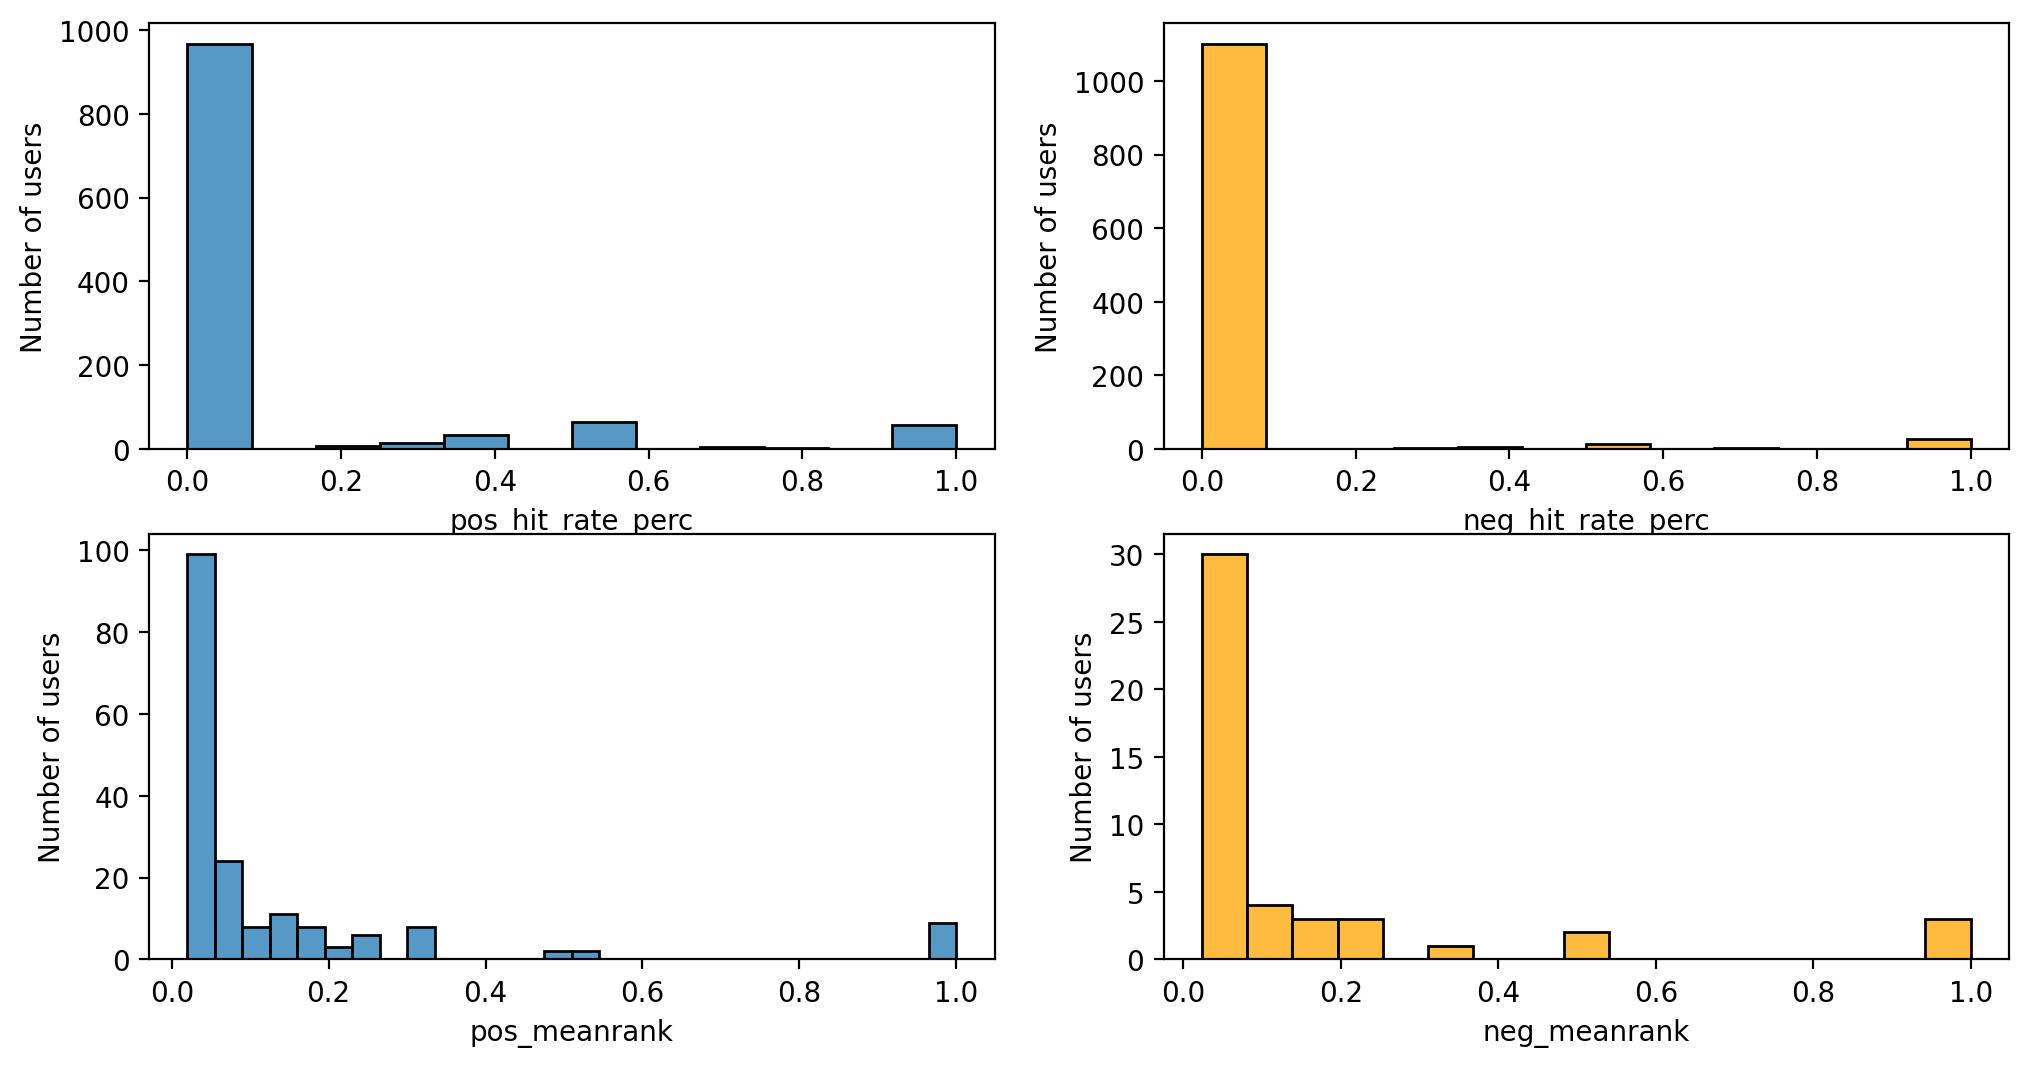

mean pos_meanrank: 0.14
mean neg_meanrank: 0.16
mean pos_hit_perc: 0.094
mean neg_hit_perc: 0.031


In [9]:
def GenerateRankHelperDF(df_all, testf):
    # product, (productnum, rating, purchased), user
    rpr=np.zeros((df_all.shape[1], 5, df_all.shape[0]))
    for i in range(df_all.shape[0]): # Loop through users
        rpr[:,0,i]=df_all.columns.values
        rpr[:,1,i]=df_all.iloc[i,:].values
        rpr[:,2,i]=0
        rpr[:,3,i]=df_all.index[i]
        #rpr[:,4,i]=test

    for a in range(df_all.shape[0]):
        purchases=testf[testf['user']==df_all.index[a]]['product'].unique()
        #print(purchases)
        for i in range(len(rpr[:,0,a])):
            if rpr[i,0,a] in purchases:
                #print(rpr[i,0,a])
                rpr[i,2,a]=1
            #test.loc[i, 'purchased']=1
    return rpr

rpr = GenerateRankHelperDF(df_all, testf)

def GenerateRankMetrics(df_all, testf, cutoff):
    # Generate rank-metrics
    # i.e. hit-rates, hit-rate percs and meanranks
    
    # Get index number and corresponding user mapping
    inum, mapping = df_all.index.factorize()
    # Create rank_df
    df_rank=pd.DataFrame(mapping)
    df_rank['hit_rate']=0
    df_rank['hit_rate_perc']=0
    df_rank['pos_hit_rate']=0
    df_rank['pos_hit_rate_perc']=0
    df_rank['neg_hit_rate']=0
    df_rank['neg_hit_rate_perc']=0
    
    df_rank['meanrank']=0
    df_rank['pos_meanrank']=0
    df_rank['neg_meanrank']=0
    # For each user
    for i in inum:
        # Get predicted/observed ratings and whether the person purchased the product
        test=pd.DataFrame(rpr[:,:,i]).sort_values(by=1, ascending=False)
        test['enum']=range(test.shape[0])
        test.columns=['product', 'pred', 'purchased', 'userid', 'overall', 'enum']
        # get hit rate
        all_hits=0
        pos_hits=0
        neg_hits=0
        # Reduced to actual products bought
        df_reduced = test[test['purchased']==1]
        # Loop through these products and calculate rank metrics
        for j in df_reduced.index:
            # Add true rating
            df_reduced.loc[j, 'overall']=testf[(testf['user']==df_reduced.loc[j, 'userid']) & (testf['product']==df_reduced.loc[j, 'product'])]['overall'].values
            # pos and neg
            if df_reduced.loc[j, 'enum']<cutoff:
                all_hits+=1
            # only pos
            if (df_reduced.loc[j, 'enum']<cutoff) & (df_reduced.loc[j, 'overall']>=5):
                pos_hits+=1
            # only neg
            if (df_reduced.loc[j, 'enum']<cutoff) & (df_reduced.loc[j, 'overall']<5):
                neg_hits+=1        
        df_rank.loc[i, 'hit_rate']=all_hits
        df_rank.loc[i, 'hit_rate_perc']=all_hits/len(df_reduced)
        df_rank.loc[i, 'pos_hit_rate']=pos_hits
        df_rank.loc[i, 'pos_hit_rate_perc']=pos_hits/(len(df_reduced[df_reduced['overall']>=5])+0.0001) # pad with small number to avoid div by zero
        df_rank.loc[i, 'neg_hit_rate']=neg_hits
        df_rank.loc[i, 'neg_hit_rate_perc']=neg_hits/(len(df_reduced[df_reduced['overall']<5])+0.0001) # pad with small number to avoid div by zero

        # get mean rank
        ranks=[]
        pos_ranks=[]
        neg_ranks=[]
        for j in df_reduced.index:
            # pos and neg
            if df_reduced.loc[j, 'enum']<cutoff:
                ranks.append(df_reduced.loc[j, 'enum']+1)
            # only pos
            if (df_reduced.loc[j, 'enum']<cutoff) & (df_reduced.loc[j, 'overall']>=5):
                pos_ranks.append(df_reduced.loc[j, 'enum']+1)
            # only neg
            if (df_reduced.loc[j, 'enum']<cutoff) & (df_reduced.loc[j, 'overall']<5):
                neg_ranks.append(df_reduced.loc[j, 'enum']+1)
        rank_perc = np.ones(len(ranks))/ranks
        pos_rank_perc = np.ones(len(pos_ranks))/pos_ranks
        neg_rank_perc = np.ones(len(neg_ranks))/neg_ranks
        df_rank.loc[i, 'meanrank']=rank_perc.mean()
        df_rank.loc[i, 'pos_meanrank']=pos_rank_perc.mean()
        df_rank.loc[i, 'neg_meanrank']=neg_rank_perc.mean()
    return df_rank
#df_rank['meanrank']=df_rank['meanrank'].fillna(0)
#df_rank['meanrank']=df_rank['meanrank'].fillna(0)
#df_rank['meanrank']=df_rank['meanrank'].fillna(0)

rank_df=GenerateRankMetrics(df_all, testf, 50)
rank_df=rank_df.rename(columns={rank_df.columns[0]: 'user'})
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6.2), dpi=200)
sns.histplot(data=rank_df, x='pos_hit_rate_perc', ax=axes[0,0])
axes[0,0].set_ylabel('Number of users')
sns.histplot(data=rank_df, x='neg_hit_rate_perc', color='orange', ax=axes[0,1])
axes[0,1].set_ylabel('Number of users')
sns.histplot(data=rank_df, x='pos_meanrank', ax=axes[1,0])
axes[1,0].set_ylabel('Number of users')
sns.histplot(data=rank_df, x='neg_meanrank', color='orange', ax=axes[1,1])
axes[1,1].set_ylabel('Number of users')
plt.show()

print("mean pos_meanrank: {:.2}".format(rank_df[rank_df['pos_meanrank']!=np.inf]['pos_meanrank'].mean()))
print("mean neg_meanrank: {:.2}".format(rank_df[rank_df['neg_meanrank']!=np.inf]['neg_meanrank'].mean()))
print("mean pos_hit_perc: {:.2}".format(rank_df[rank_df['pos_hit_rate_perc']!=np.inf]['pos_hit_rate_perc'].mean()))
print("mean neg_hit_perc: {:.2}".format(rank_df[rank_df['neg_hit_rate_perc']!=np.inf]['neg_hit_rate_perc'].mean()))

## 4.2 Can the model be improved by extending with product features? ##

The Surprise model used only the user-item ratings matrix to learn the item factors and make predictions about ratings. However, the dataset contains additional information about the products - e.g. their price and category. The overall idea would then be to let the similarity between two items not only be represented by the dot product of the factors generated by the Surprise model, but to have a composite score based on multiple similarity measures (e.g. rating similarity, price similarity etc.) and build a composite score and tune the weight of each similarity measure. Multiple articles and tutorials have presented methods for combining user-item ratings with product or user information and we have decided to use a neural network approach (sources listed at bottom of this cell). This approach works as follows:
1) Create a matrix factorization model that takes as input the full user and item-vectors and learns their embedding by using the QP-matrix along with an output layer to predict ratings.
2) Augment the matrix-factorization by either applying hidden layers on top of the QP-matrix [2], or training a neural network in parallel on the embeddings [1].
3) Train a parallel neural network on the product features.
4) Concatenate the outputs of steps 1)-3) and make a final prediction of rating.
Figure x shows an overview of the approach.

We will only show the basic NN matrix factorization model and the best performing model. Other models which used varying number of layers and hidden units, as well as models that used extra features were tested but didn't improve results.

Sources:
The idea for the code is taken from these 3 tutorials and 2 articles:

https://towardsdatascience.com/modern-recommendation-systems-with-neural-networks-3cc06a6ded2c

https://towardsdatascience.com/recommender-systems-from-learned-embeddings-f1d12288f278

https://towardsdatascience.com/introduction-to-recommender-systems-2-deep-neural-network-based-recommendation-systems-4e4484e64746

"Utilizing Textual Reviews in Latent Factor Models for Recommender Systems" by Tatev & Frasincar (2021)

"Customer Reviews Analysis With Deep Neural Networks for E-Commerce Recommender Systems" by Shoja & Tabrizi (2019)

Full article citation in litterature list at the end of the report.

### 4.2.1 Basic MF model + neural network in keras ###
The below keras model represents model 1 presented on figure x. An embedding size in the range of 20 provided the best results, even though the optimal number of factors selected by the Surprise model was just 5. The performance of the keras model does not quite match the performance of the Surprise model in terms of MSE with the classification metrics also being equal or worse than the Surprise model. Visualizing the learned embeddings in 2 dimensions using TSNE doesn't provide any immediate insight that the embedding are able to separate items based on rating at least.

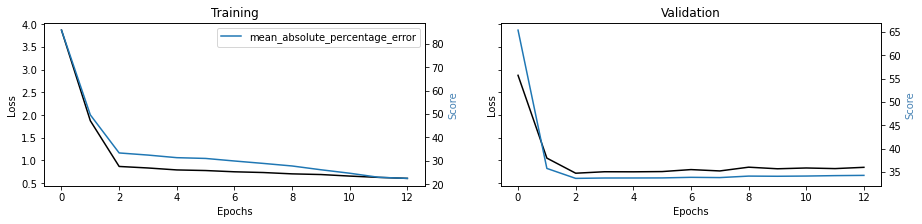

In [10]:
embeddings_size = 20
users, prods = df_cf.shape[0], df_cf.shape[1]

# Embedding layer for users
users_in = layers.Input(name="users_in", shape=(1,))
users_emb = layers.Embedding(name="users_emb", input_dim=users, output_dim=embeddings_size)(users_in)
users = layers.Reshape(name='users', target_shape=(embeddings_size,))(users_emb)
user_model = keras.Model(inputs=users_in, outputs=users)

# Create embedding layer for products
products_in = layers.Input(name="products_in", shape=(1,))
products_emb = layers.Embedding(name="products_emb", input_dim=prods, output_dim=embeddings_size)(products_in)
products = layers.Reshape(name='products', target_shape=(embeddings_size,))(products_emb)
prod_model = keras.Model(inputs=products_in, outputs=products)

# Compute dot product of the embedding layers
QP = layers.Dot(name='QP', normalize=True, axes=1)([users, products])
merged_dropout = layers.Dropout(0.2)(QP)

# Build fully connected NN on top of QP-matrix
layer_1 = layers.Dense(40,name='layer-1')(merged_dropout)
dropout_1 = layers.Dropout(0.2,name='Dropout_1')(layer_1)

layer_2 = layers.Dense(30,name='layer-2')(dropout_1)
dropout_2 = layers.Dropout(0.2,name='Dropout_2')(layer_2)

layer_3 = keras.layers.Dense(20,name='layer-3')(dropout_2)
#dropout_3 = keras.layers.Dropout(0.2,name='Dropout_3')(dense_3)

#layer_4 = keras.layers.Dense(10,name='layer-4', activation='relu')(dropout_3)
#
#y_out = layers.Dense(name="y_out", units=1, activation='linear')(merged_dropout)
y_out = layers.Dense(name="y_out", units=1, activation='relu')(layer_3)

# Compile
model = models.Model(inputs=[users_in, products_in], outputs=y_out, name="CollaborativeFiltering")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
#model.summary()

# train
callbacks = [keras.callbacks.EarlyStopping('val_loss', patience=10),
             keras.callbacks.ModelCheckpoint('besttest.h5', save_best_only=True)]

training = model.fit(x=[trainf['user'], trainf['product']], y=trainf["overall"], 
                     epochs=250, batch_size=128, shuffle=True, verbose=0, validation_split=0.3, callbacks=callbacks)
model = training.model

utils_plot_keras_training(training)

In [11]:
pred_df['yhat_NNMF']=model.predict([testf["user"], testf["product"]])
KPIdf, _ = PerformanceMetrics(pred_df['overall'], pred_df['yhat_NNMF'],
                             pred_df['overall']-pred_df['yhat_NNMF'], 4)
KPI=pd.concat([KPI, KPIdf],axis=0)
KPI.index=['Surprise', 'Baseline (mean)', 'NNMF_basic']
KPI.round(4)

,r2,MSE,MAE,MAPE,pred<true,pred>true,equal,TP,TN,FP,FN,Accuracy,Precision,Recall,f1,Specificity
Surprise,0.0556,0.9902,0.7211,28.1551,626.0,1735.0,1.0,1911.0,52.0,289.0,110.0,0.8311,0.8686,0.9456,0.9055,0.1525
Baseline (mean),-0.0006,1.0491,0.7779,30.0007,650.0,1712.0,0.0,2021.0,0.0,341.0,0.0,0.8556,0.8556,1.0000,0.9222,0.0000
NNMF_basic,-0.1280,1.1827,0.8258,30.6268,662.0,1700.0,0.0,1753.0,48.0,293.0,268.0,0.7625,0.8568,0.8674,0.8621,0.1408


<AxesSubplot:xlabel='dim1', ylabel='dim2'>

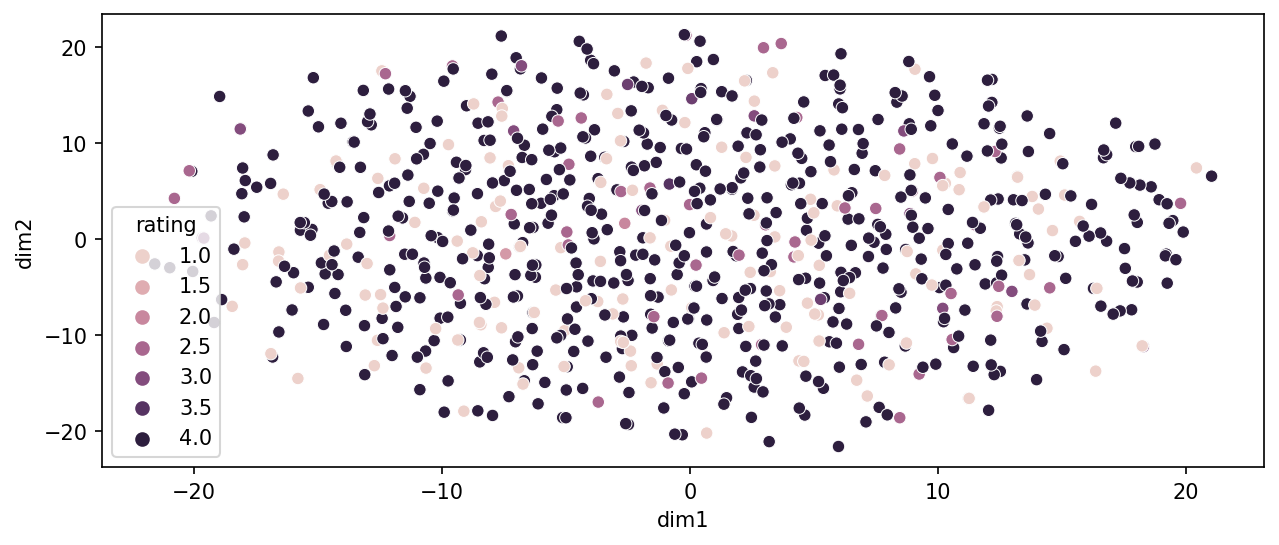

In [12]:
import collections
# From https://towardsdatascience.com/recommender-systems-from-learned-embeddings-f1d12288f278
from sklearn.manifold import TSNE
tsndf=trainf[(trainf['overall']==1) | (trainf['overall']==4)]
embedding_list = []
embedding_map = collections.defaultdict()

for _id in tsndf['product'].unique():
    emb = prod_model.predict(np.array([_id]))
    val = list(emb.reshape(1,-1))[0]
    embedding_list.insert(_id, val)
    embedding_map[_id] = val
    
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(embedding_list[:tsndf['product'].nunique()])
    
plotts=pd.DataFrame(new_values)
plotts.index=tsndf['product'].unique()
plotts['rating']=0
for i in plotts.index:
    plotts.loc[i, 'rating']=tsndf.loc[tsndf['product']==i, 'overall'].mean()
    
plotts.columns=['dim1', 'dim2', 'rating']
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=plotts, x='dim1', y='dim2', hue='rating')

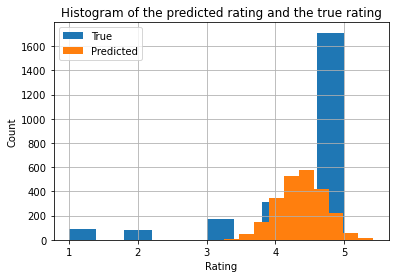

In [13]:
pred_df['overall'].hist(), pred_df['yhat_NNMF'].hist()
plt.legend(['True','Predicted'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of the predicted rating and the true rating')
plt.show()

**Next the product features are added and the full neural network is trained. Best hyperparameter combinations is found using Keras tuner**

In [14]:
df_full_train=trainf.drop(columns=['reviewText', 'reviewText_cleaned', 'disc_rating','neg','pos','compound','neu','unixReviewTime'])
df_full_test=testf.drop(columns=['reviewText', 'reviewText_cleaned', 'disc_rating','neg','pos','compound','neu','unixReviewTime'])
df_full_train['verified']=df_full_train['verified'].astype(float)
df_full_test['verified']=df_full_test['verified'].astype(float)

In [19]:
embeddings_size = 20
users, prods = df_cf.shape[0], df_cf.shape[1]
ctx =  186 # time

########################################## COLLABORATIVE FILTERING ###################################################
# Input layer
def build_model(hp):
    embeddings_size = 20
    users, prods = df_cf.shape[0], df_cf.shape[1]
    ctx =  186 # time
    users_in = layers.Input(name="users_in", shape=(1,))
    products_in = layers.Input(name="products_in", shape=(1,))

    # Create embedding layer for users
    users_in = layers.Input(name="users_in", shape=(1,))
    users_emb = layers.Embedding(name="users_emb", input_dim=users, output_dim=embeddings_size)(users_in)
    users = layers.Reshape(name='users', target_shape=(embeddings_size,))(users_emb)
    user_model = keras.Model(inputs=users_in, outputs=users)

    # Create embedding layer for products
    products_in = layers.Input(name="products_in", shape=(1,))
    products_emb = layers.Embedding(name="products_emb", input_dim=prods, output_dim=embeddings_size)(products_in)
    products = layers.Reshape(name='products', target_shape=(embeddings_size,))(products_emb)
    prod_model = keras.Model(inputs=products_in, outputs=products)

    # Compute dot product of the embedding layers
    QP = layers.Dot(name='xx', normalize=True, axes=1)([users, products])
    merged_dropout = layers.Dropout(0.2)(QP)
    # built network on top
    layer_1 = layers.Dense(40,name='layer-1')(merged_dropout)
    dropout_1 = layers.Dropout(0.2,name='Dropout_1')(layer_1)

    layer_2 = layers.Dense(30,name='layer-2')(dropout_1)
    dropout_2 = layers.Dropout(0.2,name='Dropout_2')(layer_2)

    layer_3 = keras.layers.Dense(20,name='layer-3', activation='relu')(dropout_2)
    #dropout_3 = keras.layers.Dropout(0.2,name='Dropout_3')(layer_3)

    #layer_4 = keras.layers.Dense(10,name='FullyConnected-4', activation='relu')(dropout_3)
    #
    #y_out = layers.Dense(name="y_out", units=1, activation='linear')(merged_dropout)
    #y_out = layers.Dense(name="y_out", units=1, activation='relu')(dense_3)


    ########################################## KNOWLEDGE BASED #################################################
    # Context
    contexts_in = layers.Input(name="contexts_in", shape=(ctx,))
    context_x = layers.Dense(name="context_x",  units=hp.Int("units", min_value=300, max_value=400, step=2), activation='relu')(contexts_in)
    dropout_cx = layers.Dropout(0.5,name='Dropout_cx')(context_x)
    #context_x2 = layers.Dense(name="context_x2",  units=hp.Int("units", min_value=300, max_value=400, step=2), activation='relu')(dropout_cx)
    

    ########################################## OUTPUT ###################################################
    # Merge all
    y_out = layers.Concatenate()([layer_3, dropout_cx])
    #y_ll = layers.Dense(name="y_ll", units=10, activation='relu')(y_out)
    y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_out)
    #y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_ll)

    # Compile
    model = models.Model(inputs=[users_in, products_in, contexts_in], outputs=y_out, name="Hybrid_Model")
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
    return model
    #model.summary()

In [20]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="mean_absolute_percentage_error",
    max_trials=5,
    executions_per_trial=1,
    overwrite=True,
    directory="tuner",
    project_name="amazon_recommender",
)

In [21]:
tuner.search(x=[df_full_train["user"], df_full_train["product"],df_full_train.iloc[:,7:]],
                     y=df_full_train["overall"], 
                     epochs=20, shuffle=True, verbose=0, validation_split=0.3)#, callbacks=callbacks)
best_hps = tuner.get_best_hyperparameters(5)
model = build_model(best_hps[0])

INFO:tensorflow:Oracle triggered exit


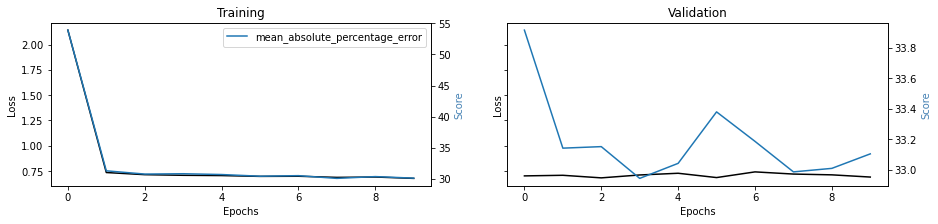

In [22]:
# train with the best hyper parameters
callbacks = [keras.callbacks.EarlyStopping('val_loss', patience=10),
             keras.callbacks.ModelCheckpoint('besttest.h5', save_best_only=True)]

training = model.fit(x=[df_full_train["user"], df_full_train["product"], df_full_train.iloc[:,7:]],
                     y=df_full_train["overall"], 
                     epochs=10, shuffle=True, verbose=0, validation_split=0.3, callbacks=callbacks)

model = training.model
utils_plot_keras_training(training)

In [23]:
dfproduct = df_full_test.copy()
dfproduct=dfproduct.groupby('product').mean()
dfproduct['product']=dfproduct.index
#dfproduct.iloc[:,6:]

In [24]:
# Test
#del df_full_test['yhat']
pred_df['yhat_NNfull'] = model.predict([df_full_test["user"], df_full_test["product"],
                                       df_full_test.iloc[:,7:]])
np.mean((pred_df.overall-pred_df['yhat_NNfull'])**2)

1.1225659792295186

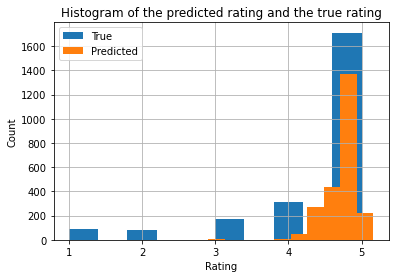

In [25]:
pred_df['overall'].hist(), pred_df['yhat_NNfull'].hist()
plt.legend(['True','Predicted'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of the predicted rating and the true rating')
plt.show()

In [26]:
KPIdf, _ = PerformanceMetrics(pred_df['overall'], pred_df['yhat_NNfull'],
                             pred_df['overall']-pred_df['yhat_NNfull'], 4)

pred_df['base']=trainf['overall'].mean()
KPIbase, _ = PerformanceMetrics(pred_df['overall'], pred_df['base'],
                             pred_df['overall']-pred_df['base'], 4)
KPI=pd.concat([KPI, KPIdf],axis=0)
KPI.index=['Surprise', 'Baseline (mean)', 'NNMF', 'NNfull']
KPI.round(2)

,r2,MSE,MAE,MAPE,pred<true,pred>true,equal,TP,TN,FP,FN,Accuracy,Precision,Recall,f1,Specificity
Surprise,0.06,0.99,0.72,28.16,626.0,1735.0,1.0,1911.0,52.0,289.0,110.0,0.83,0.87,0.95,0.91,0.15
Baseline (mean),-0.00,1.05,0.78,30.00,650.0,1712.0,0.0,2021.0,0.0,341.0,0.0,0.86,0.86,1.00,0.92,0.00
NNMF,-0.13,1.18,0.83,30.63,662.0,1700.0,0.0,1753.0,48.0,293.0,268.0,0.76,0.86,0.87,0.86,0.14
NNfull,-0.07,1.12,0.63,28.54,708.0,1654.0,0.0,2013.0,3.0,338.0,8.0,0.85,0.86,1.00,0.92,0.01


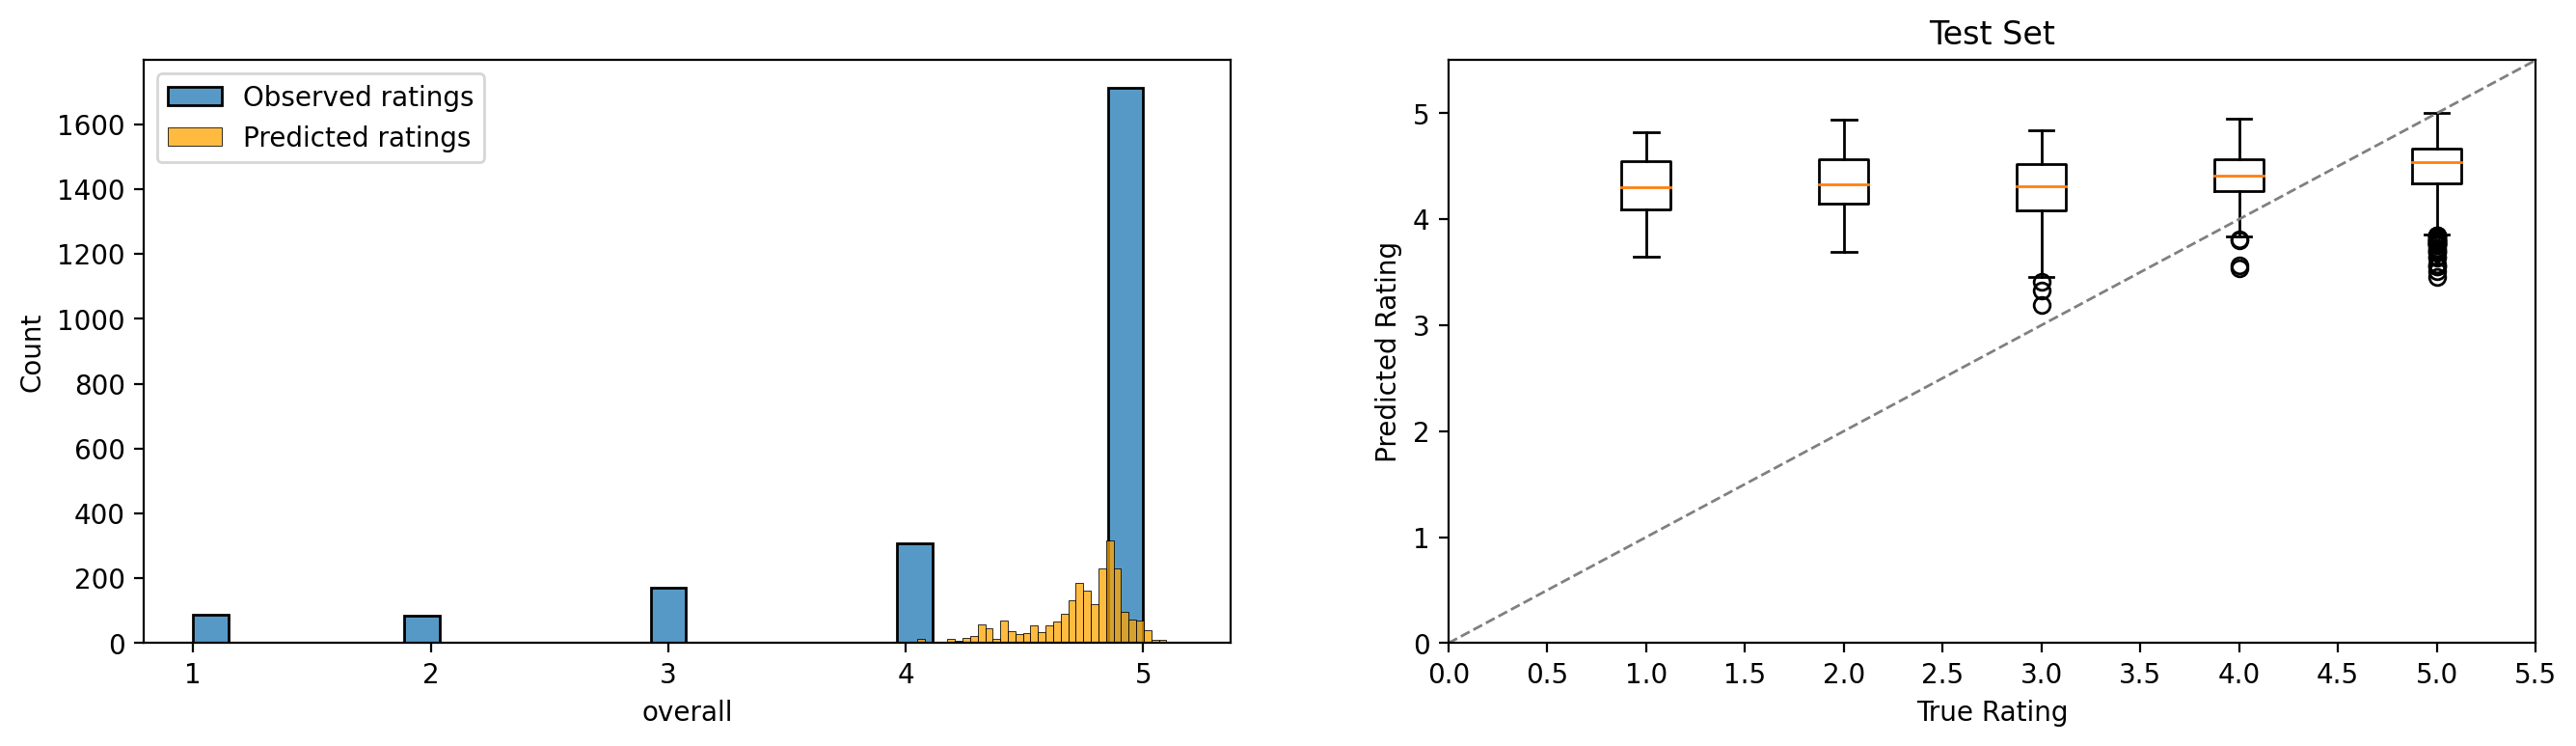

In [29]:
MakeBoxAndHistplot(testf['overall'], y_pred, 'Test Set', pred_df, 'yhat_NNfull')

100
400
500
600
700
800
900
1000
1100
1200
1400


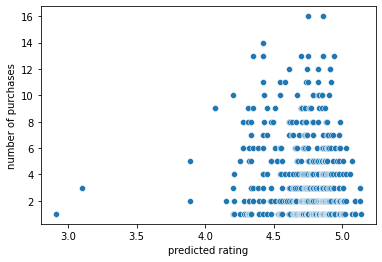

Correlation between predicted rating and number of purchases of said products
-0.1321


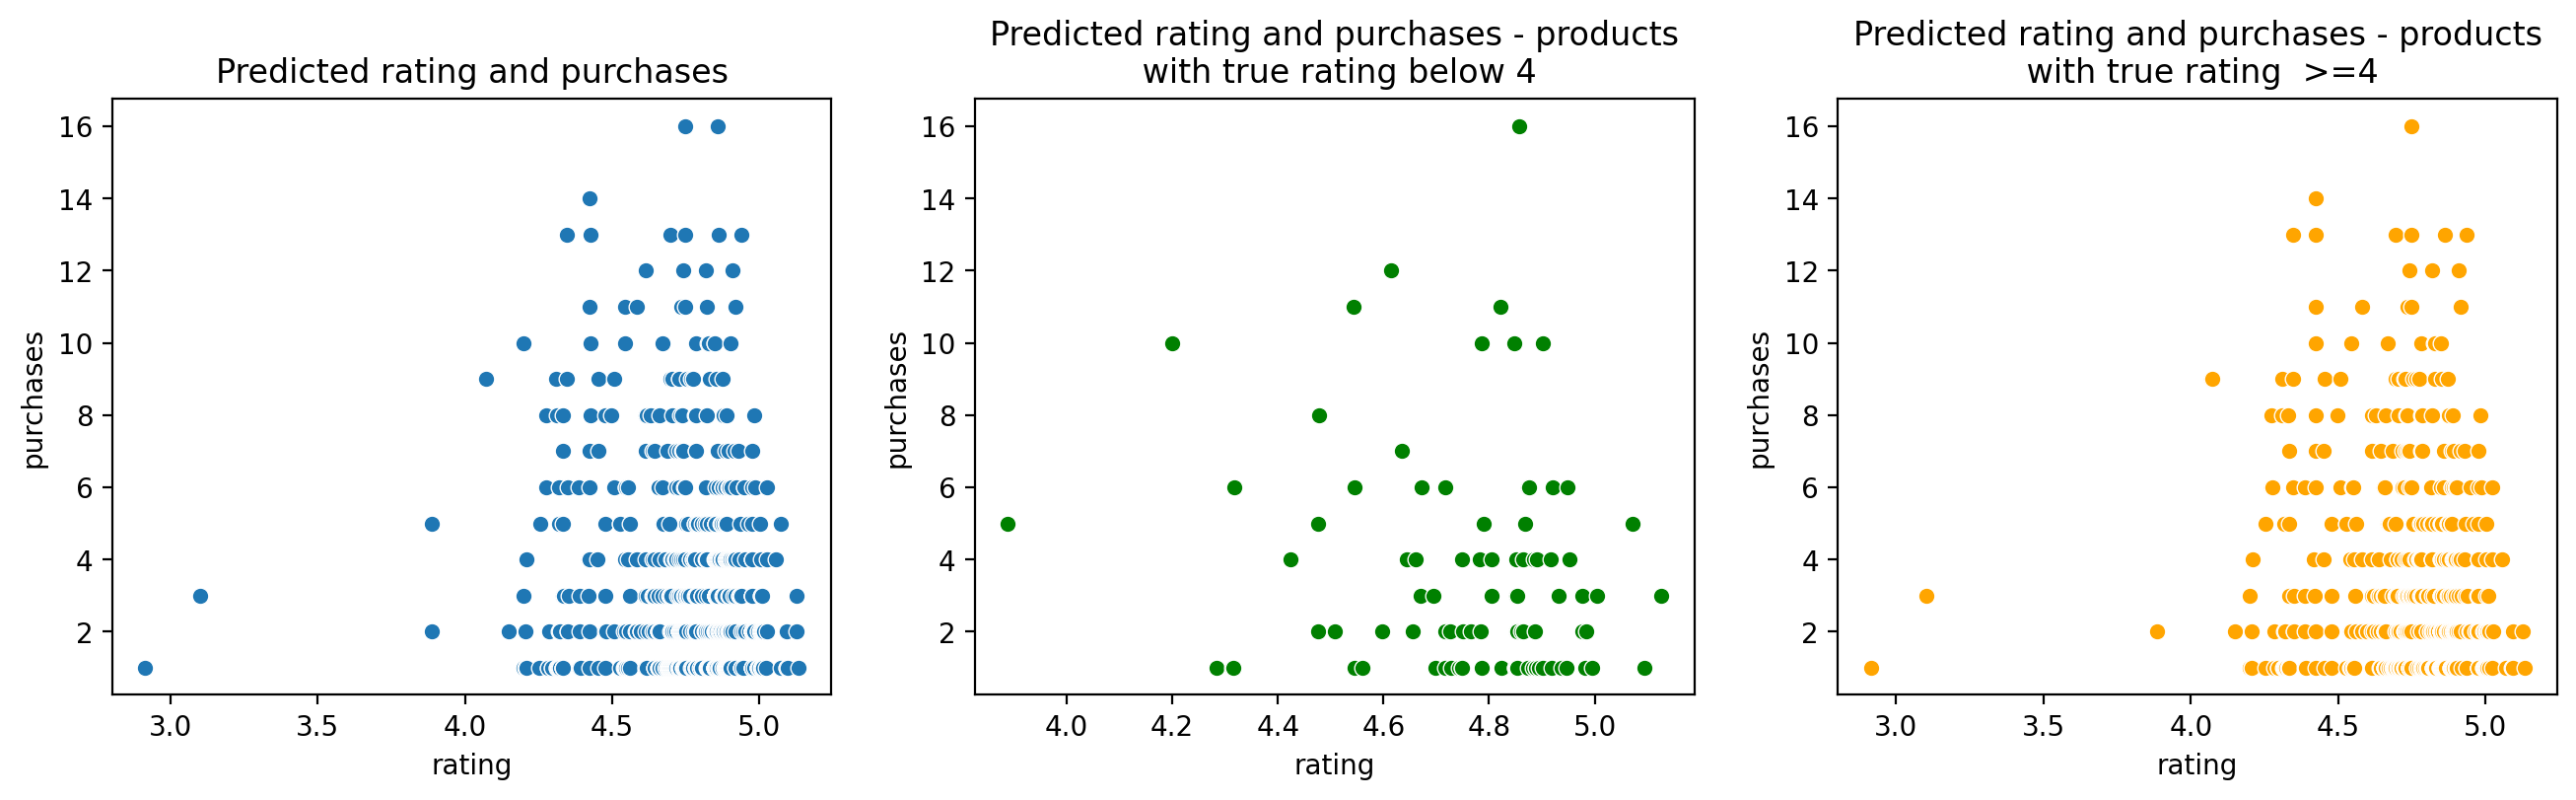

In [31]:
import matplotlib.pyplot as plt

# 1-2 min runtime
dfproduct = df_full_test.copy()
dfproduct=dfproduct.groupby('product').mean()
dfproduct['product']=dfproduct.index
dfproduct.iloc[:,6:]
## GENERATE PREDICTIONS FOR ALL USER-ITEM COMBINATIONS IN TEST SET
# Generate df_all, item-user dataframe for all predictions (each user has 1 prediction for each product in test)
user_ids_true = pred_df['user'].values
prod_ids_true = pred_df['product'].values
df_all = np.zeros((testf['user'].nunique(), testf['product'].nunique()))
df_all=pd.DataFrame(df_all)
df_all.index=np.unique(user_ids_true)
df_all.columns=np.unique(prod_ids_true)
for i in df_all.index:
        if i % 100==0:
            print(i)
        df_all.loc[i, :]=model.predict([np.array([df_full_test.loc[i, "user"]]*df_full_test['product'].nunique()),
                                    dfproduct["product"],
                                       dfproduct.iloc[:,6:-1]]).ravel()
        #for a in df_all.columns:
        #    df_all.loc[i, a]=model.predict(i, a, verbose=False).est
        
salesdf=GenerateGraph_TopRated(df_all, testf)
GenerateGraph_TopRatedSorted(salesdf, df_all, testf)

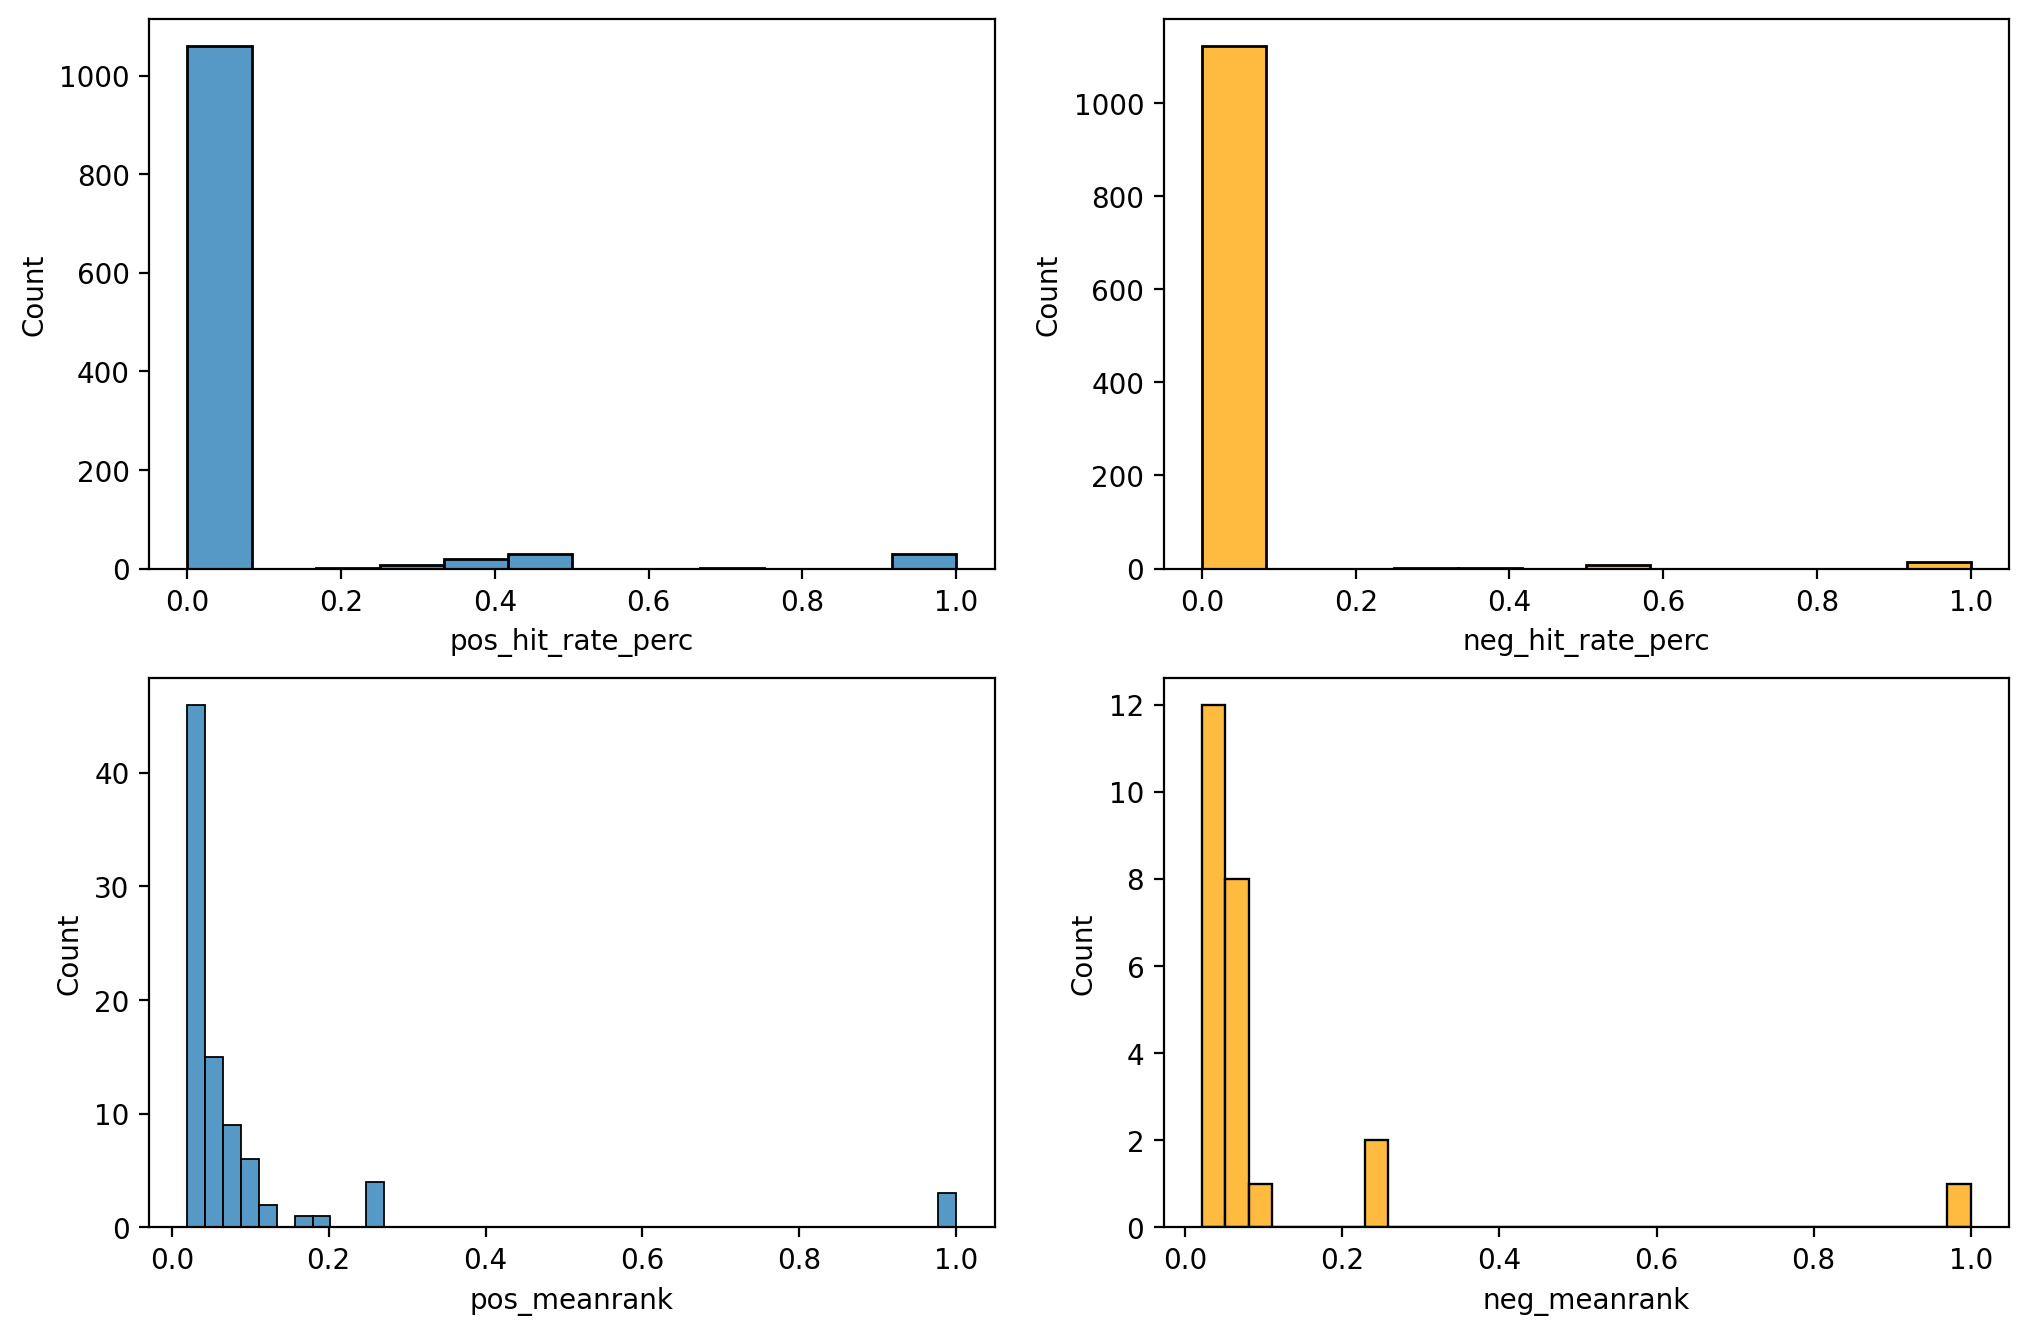

mean pos_meanrank: 0.092
mean neg_meanrank: 0.1
mean pos_hit_perc: 0.046
mean neg_hit_perc: 0.016


In [32]:
rpr = GenerateRankHelperDF(df_all, testf)

#df_rank['meanrank']=df_rank['meanrank'].fillna(0)
#df_rank['meanrank']=df_rank['meanrank'].fillna(0)
#df_rank['meanrank']=df_rank['meanrank'].fillna(0)

rank_df=GenerateRankMetrics(df_all, testf, 50)
rank_df=rank_df.rename(columns={rank_df.columns[0]: 'user'})
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8), dpi=200)
sns.histplot(data=rank_df, x='pos_hit_rate_perc', ax=axes[0,0])
sns.histplot(data=rank_df, x='neg_hit_rate_perc', color='orange', ax=axes[0,1])
sns.histplot(data=rank_df, x='pos_meanrank', ax=axes[1,0])
sns.histplot(data=rank_df, x='neg_meanrank', color='orange', ax=axes[1,1])
plt.show()

print("mean pos_meanrank: {:.2}".format(rank_df[rank_df['pos_meanrank']!=np.inf]['pos_meanrank'].mean()))
print("mean neg_meanrank: {:.2}".format(rank_df[rank_df['neg_meanrank']!=np.inf]['neg_meanrank'].mean()))
print("mean pos_hit_perc: {:.2}".format(rank_df[rank_df['pos_hit_rate_perc']!=np.inf]['pos_hit_rate_perc'].mean()))
print("mean neg_hit_perc: {:.2}".format(rank_df[rank_df['neg_hit_rate_perc']!=np.inf]['neg_hit_rate_perc'].mean()))

## 4.3 Emphasizing that the model should be more conservative in its predictions ##

Although the neural network model was an improve on the Surprise model in terms of specificity, the model specificity is still low. One might worry that the cost of recommending the user a product he/she will not like outweighs the benefit of recommending a product he/she will like. To take this assymmetry into account we can change the loss-function used for training our model. The desired effect of penalizing overpredictions more than underpredictions can be achieved like so (squared difference between y_pred and y_true is used as example):
* Changing the loss function to a form of: Loss = (y_pred-y_true)^2 * (sign(y_pred-ytrue)+alpha)^2. Where alpha is a parameter satisfying -1 < alpha < 1 and denotes the trade-off between penalizaing overpredictions and underpredictions. The closer alpha gets to -1 the more overpredictions are penalized and vice versa.
* Adding weights to selected observations such that: Loss_yi = (y_pred_yi - y_true_yi)^2 * Wy_i. For example, any observations with ratings of 1 might be assigned a weight of 4 while observations with ratings of 5 might be assigned a weight of 1 meaning that a misprediction of a rating 1 item is 4 times as bad as a midprediction of a rating 5 item.
We have settled upon the following loss function which both penalizes overpredictions more than underpredictions and assigns slightly greater importance to items with low ratings.
* 
We also tried to come up with a more elaborate loss function that satisfies the following criteria:
* Penalize overpredictions and underpredictions equally if rating is >= 4.
* Penalize overpredictions more if rating < 4
The following loss function does exactly that, with alpha once more a tuneable parameter.

Whether it is reasonable to assume that overpredictions are worse than underpredictions when predicting product ratings can be debated - however, this model shows that by tuning the loss function we can actually try to take such assumptions into account in our model.

In [2]:
def custom_loss(y_true, y_pred):
    alpha=0.5
    penalty = 1/(2+alpha+tf.sign(y_true)+tf.sign(y_true-y_pred))
    correction=(1/((4+alpha)*(2+alpha)))*tf.sign(y_true)*tf.sign(y_true-y_pred)
    squared_difference = tf.abs(y_true-y_pred)*penalty+correction
    return tf.reduce_mean(squared_difference, axis=-1)

In [3]:
import kerastuner

In [4]:
import tensorflow as tf

In [228]:
#tuner = kt.RandomSearch(
#    hypermodel=build_model,
#    objective=kerastuner.Objective("custom_loss", direction="min"),
#    max_trials=15,
#    executions_per_trial=1,
#    overwrite=True,
#    directory="tuner",
#    project_name="amazon_recommender",
#)
#
#tuner.search(x=[df_full_train["user"], df_full_train["product"],df_full_train.iloc[:,7:]],
#                     y=df_full_train["overall"], 
#                     epochs=20, shuffle=True, verbose=1, validation_split=0.3)#, callbacks=callbacks)
#best_hps = tuner.get_best_hyperparameters(5)
#model = build_model(best_hps[0])

In [9]:
set(df_full_test)-set(df_full_train)

set()

In [10]:
b=0
alphas = [0.1,0.2,0.4,0.6,1,5,10,25,50,100,1000,10000,100000]
for i in alphas:
        # Run neural network 5 times with different alpha parameters and plot the results
    embeddings_size = 20
    usr, prd = df_cf.shape[0], df_cf.shape[1]
    ctx =  323 # time

    ########################################## COLLABORATIVE FILTERING ###################################################
    # Input layer
    #def build_model(hp):
    xusers_in = layers.Input(name="xusers_in", shape=(1,))
    xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

    # Create embedding layer for users
    # Users (,1,embedding_size) and Reshape (,embedding_size)
    xusers_in = layers.Input(name="xusers_in", shape=(1,))
    xusers_emb = layers.Embedding(name="xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
    xusers = layers.Reshape(name='xusers', target_shape=(embeddings_size,))(xusers_emb)
    user_model = keras.Model(inputs=xusers_in, outputs=xusers)

    # Create embedding layer for products
    # Products (,1,embedding_size) and Reshape (,embedding_size)
    xproducts_in = layers.Input(name="xproducts_in", shape=(1,))
    xproducts_emb = layers.Embedding(name="xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
    xproducts = layers.Reshape(name='xproducts', target_shape=(embeddings_size,))(xproducts_emb)
    prod_model = keras.Model(inputs=xproducts_in, outputs=xproducts)

    # Compute dot product of the embedding layers
    # Product (,1) values[-1,1]
    QP = layers.Dot(name='xx', normalize=True, axes=1)([xusers, xproducts])
    merged_dropout = layers.Dropout(0.2)(QP)
    # Add output layer which takes as input QP
    # Predict ratings (,1)
    dense_1 = layers.Dense(40,name='FullyConnected-1')(merged_dropout)
    dropout_1 = layers.Dropout(0.2,name='Dropout_1')(dense_1)

    dense_2 = layers.Dense(30,name='FullyConnected-2')(dropout_1)
    dropout_2 = layers.Dropout(0.2,name='Dropout_2')(dense_2)

    dense_3 = keras.layers.Dense(20,name='FullyConnected-3')(dropout_2)
    #dropout_3 = keras.layers.Dropout(0.2,name='Dropout_3')(dense_3)

    #dense_4 = keras.layers.Dense(10,name='FullyConnected-4', activation='relu')(dropout_3)
    #
    #y_out = layers.Dense(name="y_out", units=1, activation='linear')(merged_dropout)
    #y_out = layers.Dense(name="y_out", units=1, activation='relu')(dense_3)


    ########################################## KNOWLEDGE BASED #################################################
    # Context
    contexts_in = layers.Input(name="contexts_in", shape=(ctx,))
    context_x = layers.Dense(name="context_x",  units=50, activation='relu')(contexts_in)

    ########################################## OUTPUT ###################################################
    # Merge all
    y_out = layers.Concatenate()([dense_3, context_x])
    y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_out)

    # Compile
    model = models.Model(inputs=[xusers_in, xproducts_in, contexts_in], outputs=y_out, name="Hybrid_Model")
    model.compile(optimizer='adam', loss=custom_loss, metrics=['mean_absolute_percentage_error'])
        #return model
        #model.summary()

    # train with the best hyper parameters
    callbacks = [keras.callbacks.EarlyStopping('val_loss', patience=10),
                 keras.callbacks.ModelCheckpoint('besttest.h5', save_best_only=True)]
    alpha=i
    training = model.fit(x=[df_full_train["user"], df_full_train["product"], df_full_train.iloc[:,7:]],
                         y=df_full_train["overall"], 
                         epochs=100, shuffle=True, verbose=0, validation_split=0.3, callbacks=callbacks)

    model = training.model
    #utils_plot_keras_training(training)

    # Test
    #del df_full_test['yhat']
    pred_df['yhat_NNfull_loss'] = model.predict([df_full_test["user"], df_full_test["product"],
                                           df_full_test.iloc[:,7:]])
    np.mean((pred_df.overall-pred_df['yhat_NNfull'])**2)

    KPIdf, _ = PerformanceMetrics(pred_df['overall'], pred_df['yhat_NNfull_loss'],
                                 pred_df['overall']-pred_df['yhat_NNfull_loss'], 4)
    if b == 0:
        KPI_alpha, _ = PerformanceMetrics(pred_df['overall'], pred_df['base'],
                                     pred_df['overall']-pred_df['base'], 4)
        b=1
    KPI_alpha=pd.concat([KPI_alpha, KPIdf],axis=0)

    KPI_alpha

NameError: name 'pred_df' is not defined

In [256]:
KPI_alpha

,r2,MSE,MAE,MAPE,pred<true,pred>true,equal,TP,TN,FP,FN,Accuracy,Precision,Recall,f1,Specificity
0,-0.000606,1.049130,0.777879,30.000733,650.0,1712.0,0.0,2021.0,0.0,341.0,0.0,0.855631,0.855631,1.000000,0.922199,0.000000
0,-7.805393,9.232400,2.856780,62.630443,100.0,2262.0,0.0,0.0,341.0,0.0,2021.0,0.144369,NaN,0.000000,NaN,1.000000
0,-2.826663,4.012232,1.845690,44.160159,231.0,2131.0,0.0,30.0,338.0,3.0,1991.0,0.155800,0.909091,0.014844,0.029211,0.991202
0,-1.366897,2.481677,1.415376,37.535673,318.0,2044.0,0.0,292.0,303.0,38.0,1729.0,0.251905,0.884848,0.144483,0.248405,0.888563
0,-0.728716,1.812548,1.174934,33.814746,419.0,1943.0,0.0,654.0,258.0,83.0,1367.0,0.386113,0.887381,0.323602,0.474257,0.756598
0,-0.301145,1.364243,0.942565,31.237006,634.0,1728.0,0.0,1253.0,151.0,190.0,768.0,0.594412,0.868330,0.619990,0.723441,0.442815
0,-0.211655,1.270413,0.827143,30.977970,802.0,1560.0,0.0,1656.0,74.0,267.0,365.0,0.732430,0.861154,0.819396,0.839757,0.217009
0,-0.125661,1.180249,0.745400,29.893645,923.0,1439.0,0.0,1860.0,34.0,307.0,161.0,0.801863,0.858329,0.920336,0.888252,0.099707
0,-0.348322,1.413708,0.727051,31.908734,1501.0,861.0,0.0,2015.0,0.0,341.0,6.0,0.853091,0.855263,0.997031,0.920722,0.000000
0,-0.426775,1.495965,0.749904,32.753112,1744.0,618.0,0.0,2017.0,1.0,340.0,4.0,0.854361,0.855749,0.998021,0.921425,0.002933


In [279]:
KPI_alpha.index=['base']+alphas
KPI_alpha

,r2,MSE,MAE,MAPE,pred<true,pred>true,equal,TP,TN,FP,FN,Accuracy,Precision,Recall,f1,Specificity
base,-0.000606,1.049130,0.777879,30.000733,650.0,1712.0,0.0,2021.0,0.0,341.0,0.0,0.855631,0.855631,1.000000,0.922199,0.000000
0.1,-3.106929,4.306089,1.871831,44.500207,217.0,2145.0,0.0,146.0,329.0,12.0,1875.0,0.201101,0.924051,0.072241,0.134006,0.964809
0.2,-1.918308,3.059828,1.542922,39.334442,345.0,2017.0,0.0,360.0,307.0,34.0,1661.0,0.282388,0.913706,0.178130,0.298137,0.900293
0.4,-1.425658,2.543287,1.429852,37.489396,320.0,2042.0,0.0,323.0,308.0,33.0,1698.0,0.267146,0.907303,0.159822,0.271771,0.903226
0.6,-1.135457,2.239014,1.291757,35.859112,446.0,1916.0,0.0,610.0,269.0,72.0,1411.0,0.372142,0.894428,0.301831,0.451350,0.788856
1,-0.749102,1.833923,1.174124,33.903969,450.0,1912.0,0.0,690.0,247.0,94.0,1331.0,0.396698,0.880102,0.341415,0.491979,0.724340
5,-0.291468,1.354096,0.929479,31.052544,629.0,1733.0,0.0,1284.0,166.0,175.0,737.0,0.613887,0.880055,0.635329,0.737931,0.486804
10,-0.307354,1.370753,0.924009,31.450652,676.0,1686.0,0.0,1334.0,136.0,205.0,687.0,0.622354,0.866797,0.660069,0.749438,0.398827
25,-0.269331,1.330886,0.917572,31.072007,633.0,1729.0,0.0,1333.0,151.0,190.0,688.0,0.628281,0.875246,0.659574,0.752257,0.442815
50,-0.267184,1.328635,0.919962,31.149919,617.0,1745.0,0.0,1332.0,146.0,195.0,689.0,0.625741,0.872299,0.659080,0.750846,0.428152


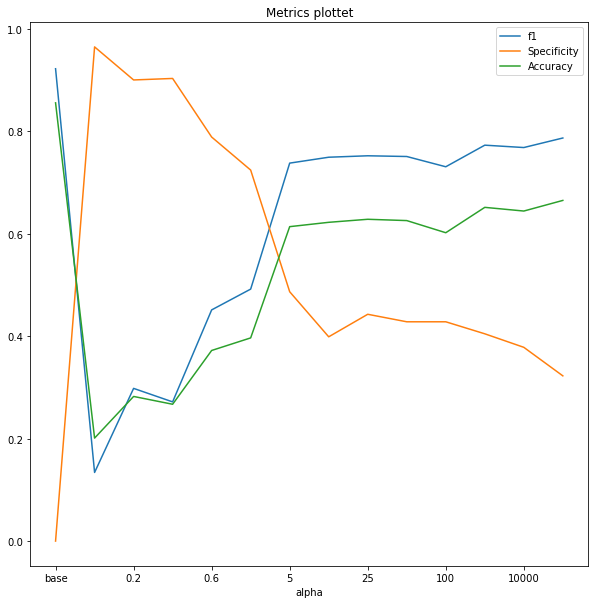

In [37]:
#insert index on alphas.
#test = pd.read_csv("testframe.txt", sep="\t")
#test.rename(columns = {'Unnamed: 0':'alpha'},inplace=True)
#test.set_index('alpha')
KPI_alpha.plot(x='alpha', y=["f1",'Specificity','Accuracy'], use_index=True,
        kind="line", figsize=(10, 10))
plt.title('Metrics for the neural network')
plt.show()

In [261]:
def custom_loss(y_true, y_pred):
    #alpha=-0.9
    cutoff=4
    penalty = 1/(2+alpha+tf.sign(y_true-cutoff)+tf.sign(y_true-y_pred))
    correction=(1/((4+alpha)*(2+alpha)))*tf.sign((y_true-cutoff)+0.0001)*tf.sign((y_true-y_pred)+0.0001)
    squared_difference = ((y_true-y_pred)**2)*(penalty+correction)
    return tf.reduce_mean(squared_difference, axis=-1)

In [248]:
def custom_loss(y_true, y_pred):
    #alpha=-0.9
    #penalty = 1/(2+alpha+tf.sign(y_true)+tf.sign(y_true-y_pred))
    #correction=(1/((4+alpha)*(2+alpha)))*tf.sign(y_true)*tf.sign(y_true-y_pred)
    #squared_difference = tf.abs(y_true-y_pred)*penalty+correction
    penalty = (tf.sign(y_true-y_pred)+alpha)**2
    #correction=(1/((4+alpha)*(2+alpha)))*tf.sign(y_true)*tf.sign(y_true-y_pred)
    squared_difference = ((y_true-y_pred)**2)*penalty
    return tf.reduce_mean(squared_difference, axis=-1)

In [12]:
# Run neural network 5 times with different alpha parameters and plot the results
embeddings_size = 20
usr, prd = df_cf.shape[0], df_cf.shape[1]
ctx =  323 # time

########################################## COLLABORATIVE FILTERING ###################################################
# Input layer
#def build_model(hp):
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

# Create embedding layer for users
# Users (,1,embedding_size) and Reshape (,embedding_size)
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xusers_emb = layers.Embedding(name="xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
xusers = layers.Reshape(name='xusers', target_shape=(embeddings_size,))(xusers_emb)
user_model = keras.Model(inputs=xusers_in, outputs=xusers)

# Create embedding layer for products
# Products (,1,embedding_size) and Reshape (,embedding_size)
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))
xproducts_emb = layers.Embedding(name="xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
xproducts = layers.Reshape(name='xproducts', target_shape=(embeddings_size,))(xproducts_emb)
prod_model = keras.Model(inputs=xproducts_in, outputs=xproducts)

# Compute dot product of the embedding layers
# Product (,1) values[-1,1]
QP = layers.Dot(name='xx', normalize=True, axes=1)([xusers, xproducts])
merged_dropout = layers.Dropout(0.2)(QP)
# Add output layer which takes as input QP
# Predict ratings (,1)
dense_1 = layers.Dense(40,name='FullyConnected-1')(merged_dropout)
dropout_1 = layers.Dropout(0.2,name='Dropout_1')(dense_1)

dense_2 = layers.Dense(30,name='FullyConnected-2')(dropout_1)
dropout_2 = layers.Dropout(0.2,name='Dropout_2')(dense_2)

dense_3 = keras.layers.Dense(20,name='FullyConnected-3')(dropout_2)
#dropout_3 = keras.layers.Dropout(0.2,name='Dropout_3')(dense_3)

#dense_4 = keras.layers.Dense(10,name='FullyConnected-4', activation='relu')(dropout_3)
#
#y_out = layers.Dense(name="y_out", units=1, activation='linear')(merged_dropout)
#y_out = layers.Dense(name="y_out", units=1, activation='relu')(dense_3)


########################################## KNOWLEDGE BASED #################################################
# Context
contexts_in = layers.Input(name="contexts_in", shape=(ctx,))
context_x = layers.Dense(name="context_x",  units=50, activation='relu')(contexts_in)

########################################## OUTPUT ###################################################
# Merge all
y_out = layers.Concatenate()([dense_3, context_x])
y_out = layers.Dense(name="y_out", units=1, activation='relu')(y_out)

# Compile
model = models.Model(inputs=[xusers_in, xproducts_in, contexts_in], outputs=y_out, name="Hybrid_Model")
model.compile(optimizer='adam', loss=custom_loss, metrics=['mean_absolute_percentage_error'])
    #return model
    #model.summary()

# train with the best hyper parameters
callbacks = [keras.callbacks.EarlyStopping('val_loss', patience=10),
             keras.callbacks.ModelCheckpoint('besttest.h5', save_best_only=True)]
alpha=10000
training = model.fit(x=[df_full_train["user"], df_full_train["product"], df_full_train.iloc[:,7:]],
                     y=df_full_train["overall"], 
                     epochs=100, shuffle=True, verbose=0, validation_split=0.3, callbacks=callbacks)

model = training.model
#utils_plot_keras_training(training)

# Test
#del df_full_test['yhat']
pred_df['yhat_NNfull_loss'] = model.predict([df_full_test["user"], df_full_test["product"],
                                       df_full_test.iloc[:,7:]])
np.mean((pred_df.overall-pred_df['yhat_NNfull'])**2)

KPIdf, _ = PerformanceMetrics(pred_df['overall'], pred_df['yhat_NNfull_loss'],
                             pred_df['overall']-pred_df['yhat_NNfull_loss'], 4)
if b == 0:
    KPI_alpha, _ = PerformanceMetrics(pred_df['overall'], pred_df['base'],
                                 pred_df['overall']-pred_df['base'], 4)
    b=1
KPI_alpha=pd.concat([KPI_alpha, KPIdf],axis=0)

KPIdf

NameError: name 'pred_df' is not defined

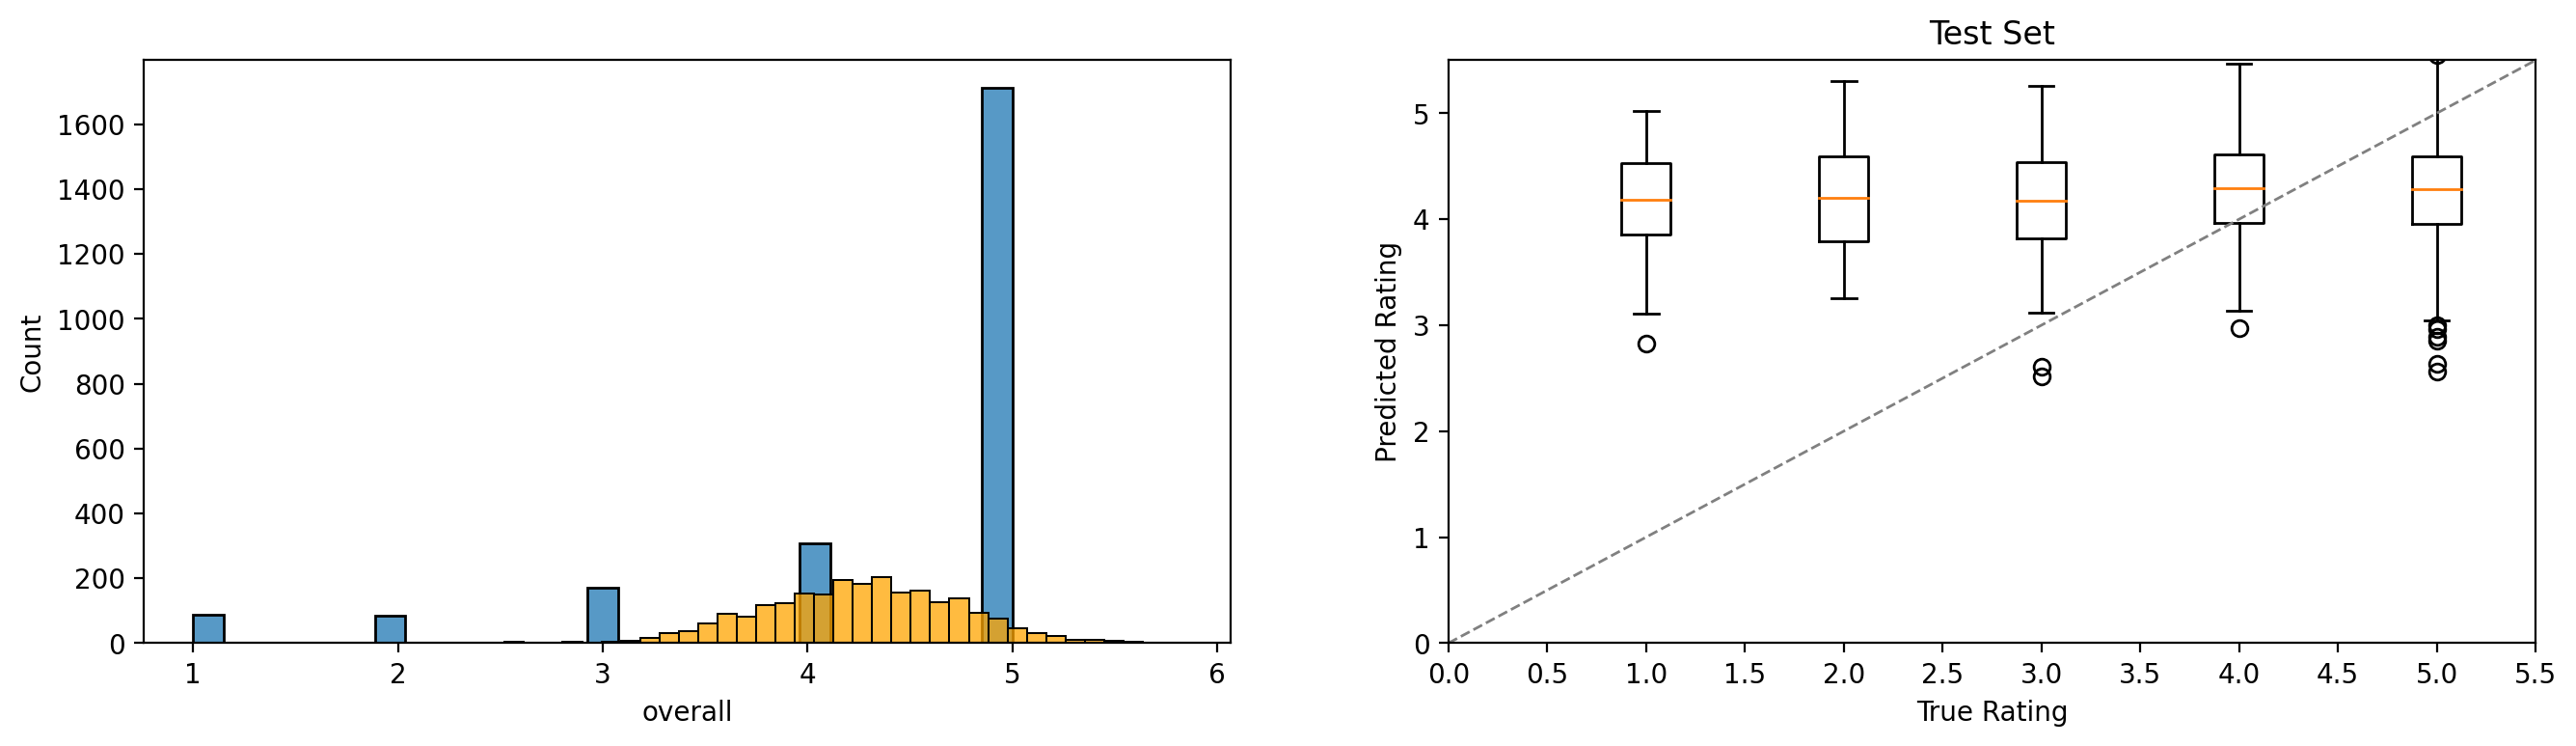

In [312]:
MakeBoxAndHistplot(testf['overall'], pred_df['yhat_NNfull_loss'], 'Test Set', pred_df, 'yhat_NNfull_loss')

100
400
500
600
700
800
900
1000
1100
1200
1400


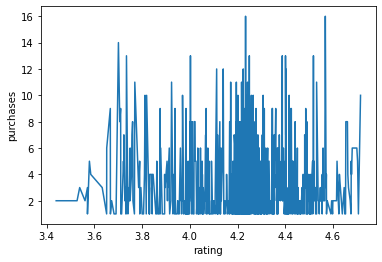

rating       1.000000
purchases   -0.005096
x            0.971915
Name: rating, dtype: float64


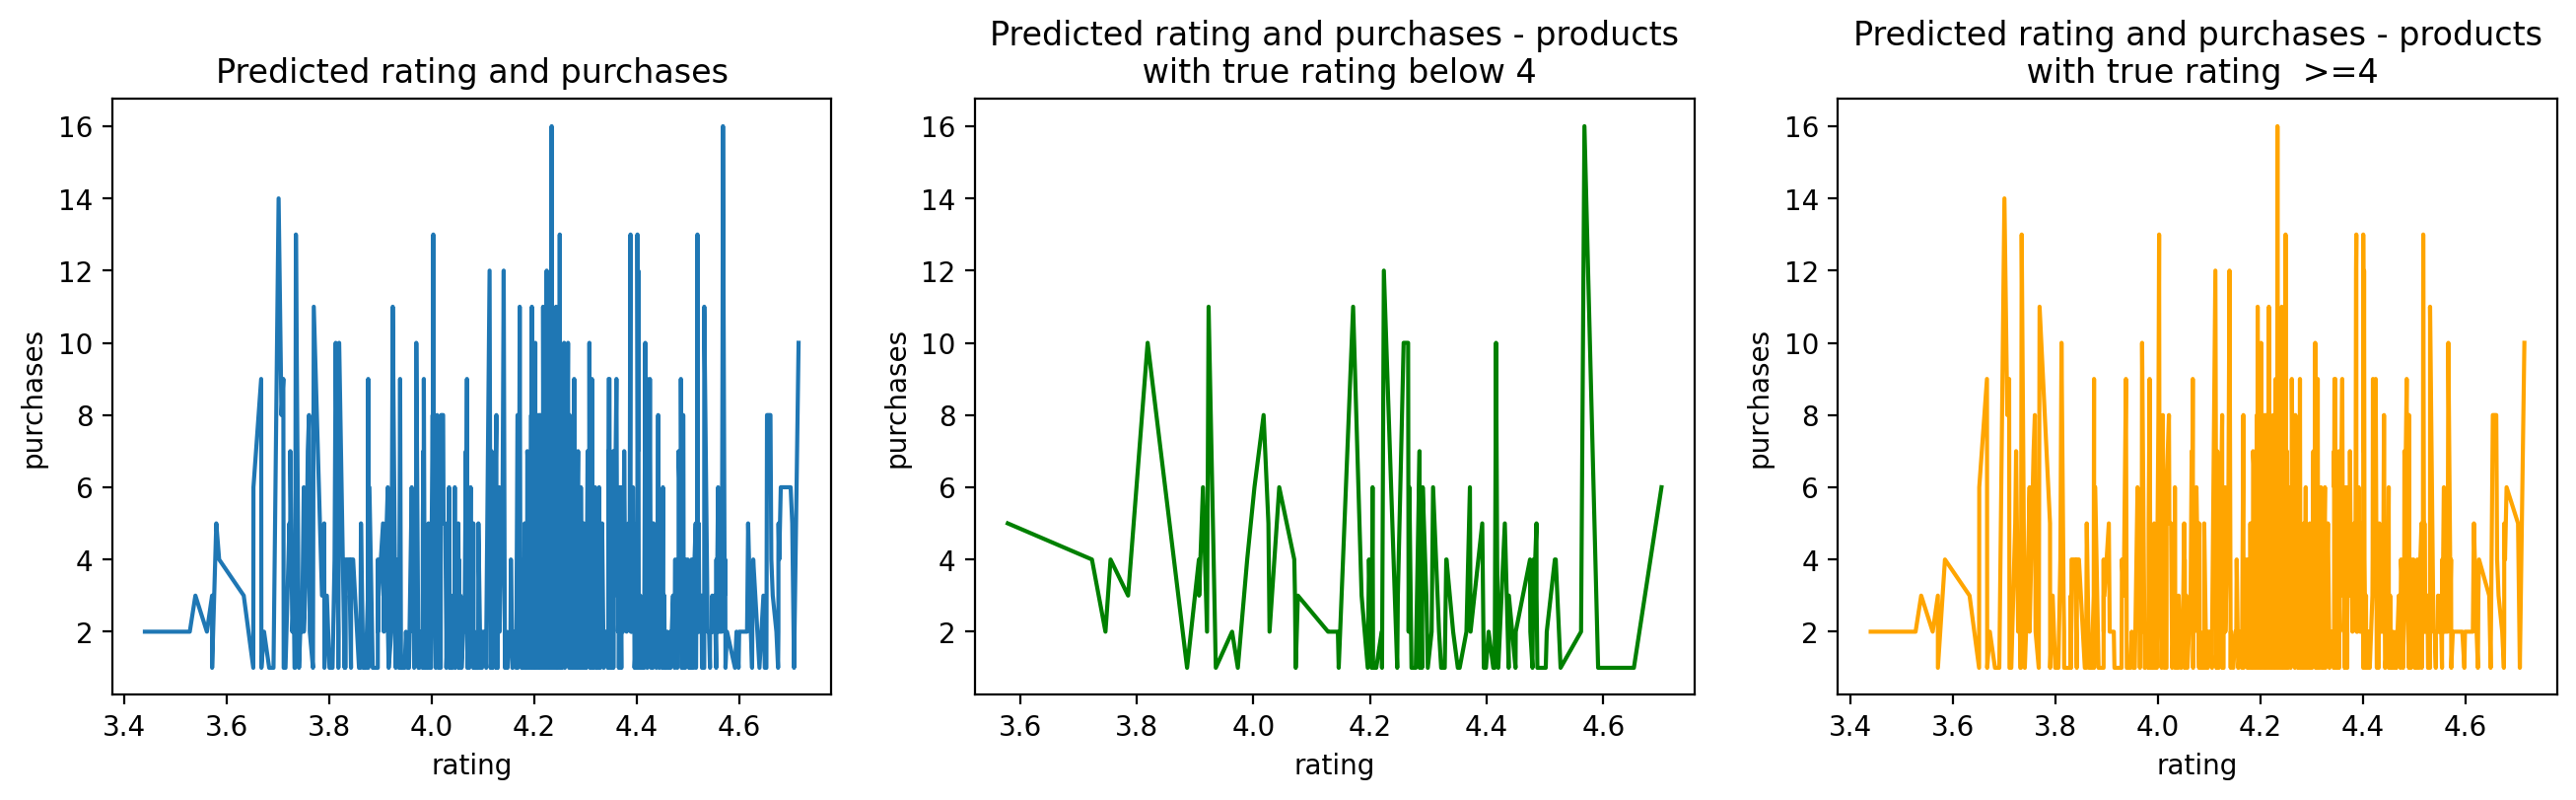

rating        1.000000
purchases    -0.005096
meanrating    0.163588
badmark       0.056935
x             0.971915
Name: rating, dtype: float64


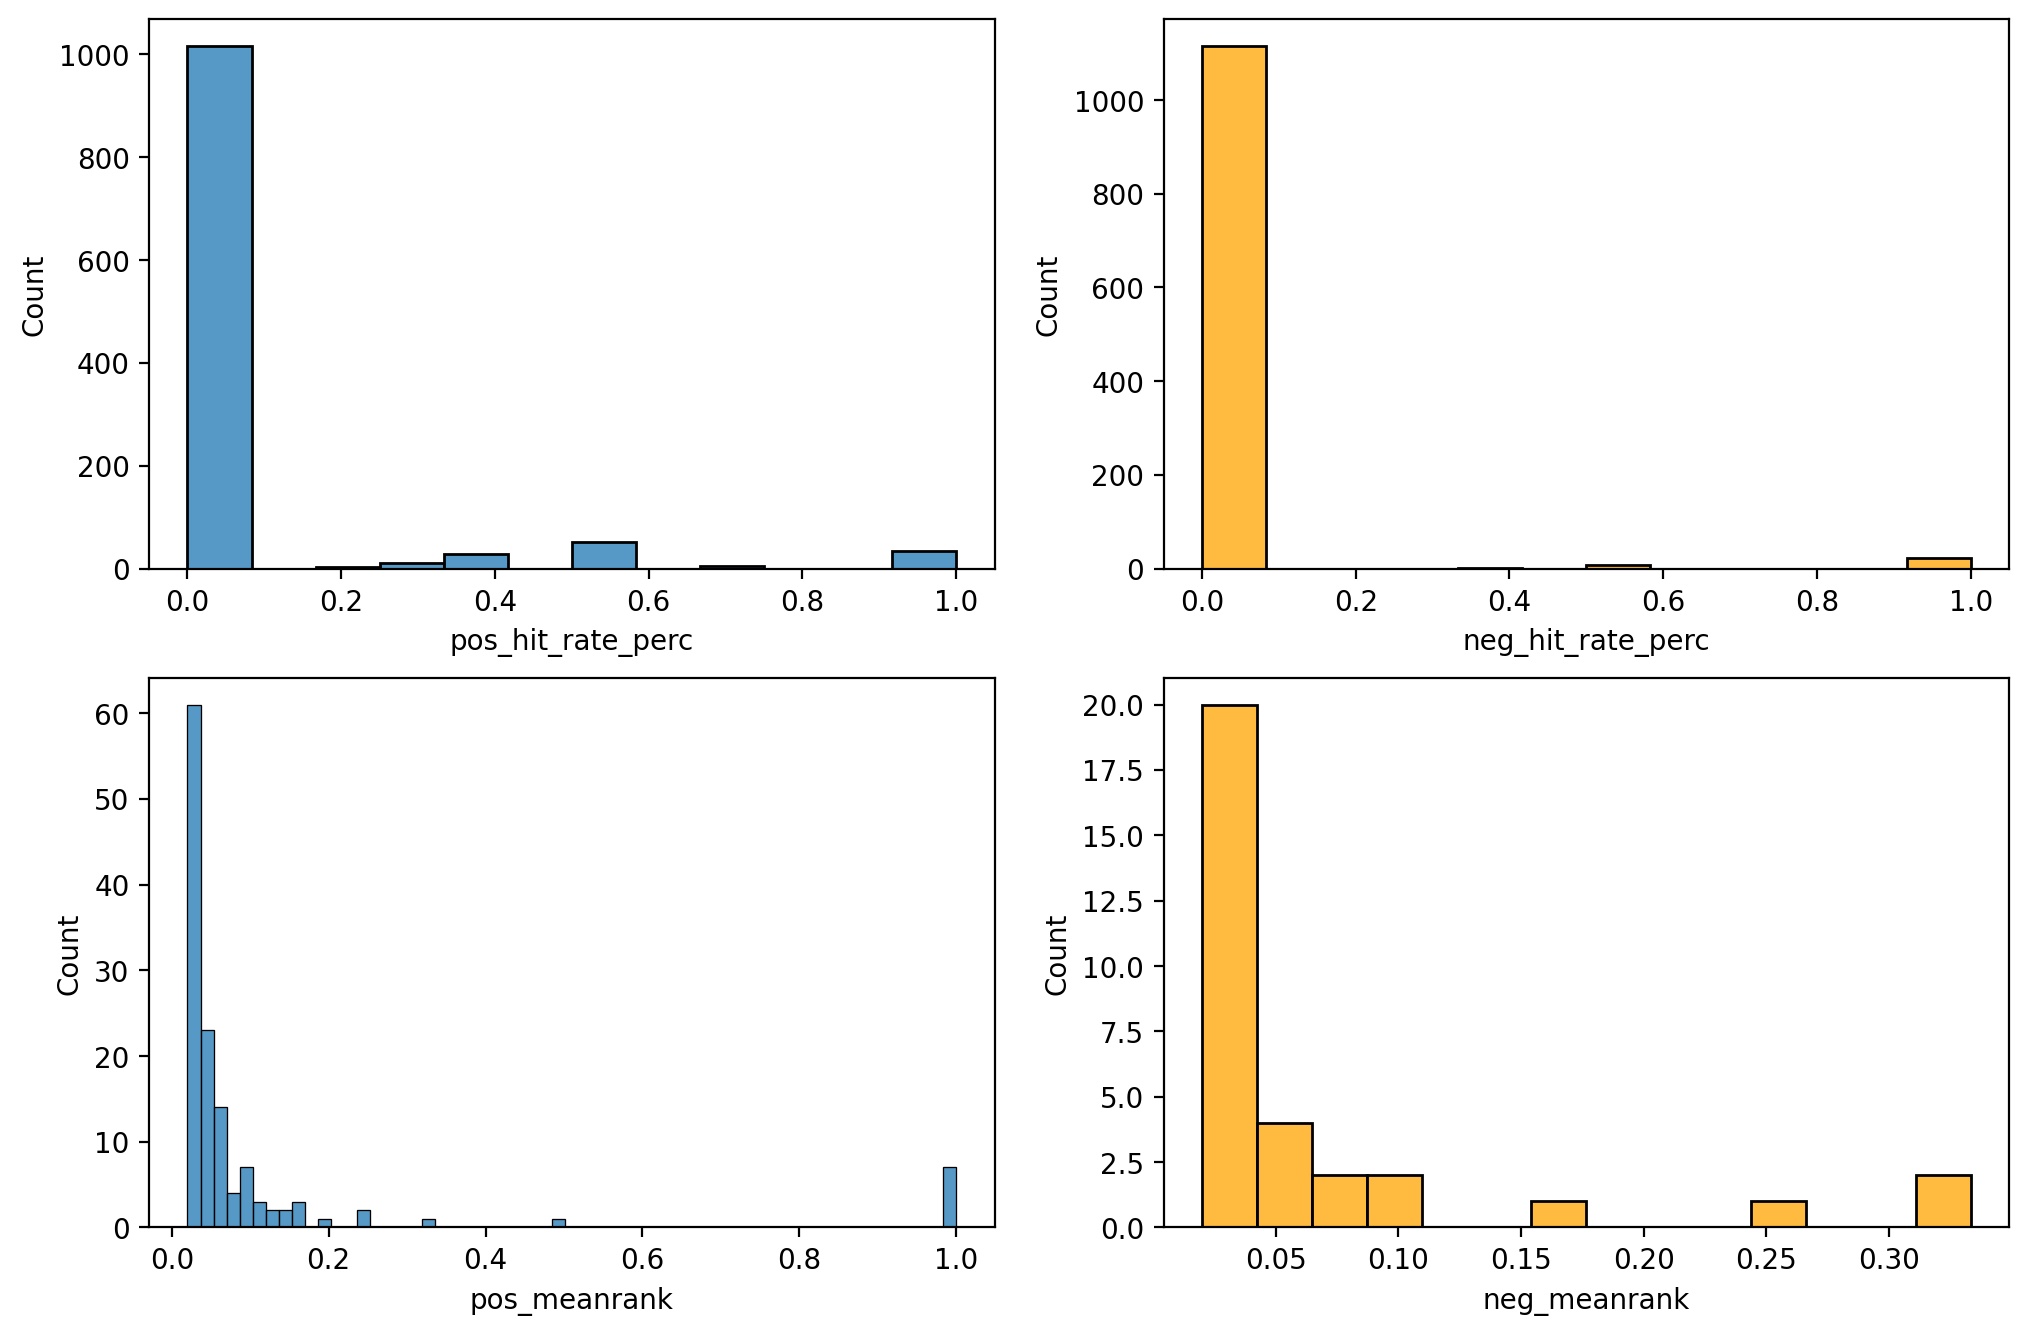

mean pos_meanrank: 0.11
mean neg_meanrank: 0.068
mean pos_hit_perc: 0.065
mean neg_hit_perc: 0.024


In [301]:
import matplotlib.pyplot as plt
# Generate plots and metrics for model
# 2-3 min runtime
dfproduct = df_full_test.copy()
dfproduct=dfproduct.groupby('product').mean()
dfproduct['product']=dfproduct.index
dfproduct.iloc[:,6:]
## GENERATE PREDICTIONS FOR ALL USER-ITEM COMBINATIONS IN TEST SET
# Generate df_all, item-user dataframe for all predictions (each user has 1 prediction for each product in test)
user_ids_true = pred_df['user'].values
prod_ids_true = pred_df['product'].values
df_all = np.zeros((testf['user'].nunique(), testf['product'].nunique()))
df_all=pd.DataFrame(df_all)
df_all.index=np.unique(user_ids_true)
df_all.columns=np.unique(prod_ids_true)
for i in df_all.index:
        if i % 100==0:
            print(i)
        df_all.loc[i, :]=model.predict([np.array([df_full_test.loc[i, "user"]]*df_full_test['product'].nunique()),
                                    dfproduct["product"],
                                       dfproduct.iloc[:,6:-2]]).ravel()
        #for a in df_all.columns:
        #    df_all.loc[i, a]=model.predict(i, a, verbose=False).est
    
GenerateGraph_TopRated(df_all, testf)

product_means_pred_test=df_all.mean(axis=0)
salesdf=pd.DataFrame(product_means_pred_test)
salesdf['purchases']=testf.groupby('product').count()['overall']
salesdf['meanrating']=(testf.groupby('product').mean()['overall'])
salesdf['badmark']=0
salesdf.loc[testf['overall']<4,'badmark']=1
salesdf=salesdf.sort_values(by=[0])
salesdf.columns=['rating', 'purchases', 'meanrating', 'badmark']
salesdf['x']=range(salesdf.shape[0])
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4), dpi=200)
sns.lineplot(data=salesdf, x='rating', y='purchases', ax=axes[0])
axes[0].set_title('Predicted rating and purchases')
sns.lineplot(data=salesdf[salesdf['badmark']==1], x='rating', y='purchases', color='green', ax=axes[1])
axes[1].set_title('Predicted rating and purchases - products\n with true rating below 4')
sns.lineplot(data=salesdf[salesdf['badmark']==0], x='rating', y='purchases', color='orange', ax=axes[2])
axes[2].set_title('Predicted rating and purchases - products\n with true rating  >=4')
plt.show()
print(salesdf.corr()['rating'])

rpr = GenerateRankHelperDF(df_all, testf)

rank_df=GenerateRankMetrics(df_all, testf, 50)
rank_df=rank_df.rename(columns={rank_df.columns[0]: 'user'})
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8), dpi=200)
sns.histplot(data=rank_df, x='pos_hit_rate_perc', ax=axes[0,0])
sns.histplot(data=rank_df, x='neg_hit_rate_perc', color='orange', ax=axes[0,1])
sns.histplot(data=rank_df, x='pos_meanrank', ax=axes[1,0])
sns.histplot(data=rank_df, x='neg_meanrank', color='orange', ax=axes[1,1])
plt.show()

print("mean pos_meanrank: {:.2}".format(rank_df[rank_df['pos_meanrank']!=np.inf]['pos_meanrank'].mean()))
print("mean neg_meanrank: {:.2}".format(rank_df[rank_df['neg_meanrank']!=np.inf]['neg_meanrank'].mean()))
print("mean pos_hit_perc: {:.2}".format(rank_df[rank_df['pos_hit_rate_perc']!=np.inf]['pos_hit_rate_perc'].mean()))
print("mean neg_hit_perc: {:.2}".format(rank_df[rank_df['neg_hit_rate_perc']!=np.inf]['neg_hit_rate_perc'].mean()))

## 4.4 Incorporating text sentiment ##

Finally, one of the first goals of the project was to see if the review texts could be used to augment the model. The first idea was to build user-profiles based on the reviews provided by a user and use that to recommend items with similar reviews. However, as mentioned by Francisco, this might lead to the case where a user who has only provided negative reviews would likely be recommended other items with negative reviews! Other articles, e.g. Aslanyan & Frasincar (x) and Shoja & Tabrizi (x) have tried to combine LDA with neural network and matrix factorization with Aslanyan & Frasincar (x) even using the same Amazon dataset. However, reading through the articles and example code showed that incorporating this methodology is better left for another time when bigger knowledge of the methods taught in model-based machine learning has been acquired.
Therefore, we decided to instead focus on using the mean sentiment of each item review, either as a feature in the neural network or as a way of making a composite score:
* Composite score approach: . To take into account that an item that unfortunately reviews a negative first review is not immediately banned from being recommended.
The drawback of this approach is that the sentiment score is not personalized - i.e. it is a content-property of the item. For example, an item with 50% very positive and 50% very negative review is likely to appeal very much to some people and very little to others. Merely using the mean sentiment doesn't allow us to differentiate between these two groups of people and the item would just receive an overall 'neutral' composite sentiment.
* Neural feature approach: Compute a feature called text sentiment such that the sentiment of an item is the mean sentiment of prior reviews of that item (i.e. it an item appears 10 times in the training set, then the first time the item is sold it's sentiment is neural, the 4'th time the item is sold the sentiment is the mean of the previous 3 reviews and so on).
The drawback..

## 4.5 Concluding on the recommender systems part: ##

Notes: Original model.
embeddings_size = 50
usr, prd = df_cf.shape[0], df_cf.shape[1]
ctx =  324 # time
feat = 1 # price, vote

########################################## COLLABORATIVE FILTERING ###################################################
# Input layer
def build_model(hp):
    xusers_in = layers.Input(name="xusers_in", shape=(1,))
    xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

    # A) Matrix Factorization
    ## embeddings and reshape
    cf_xusers_emb = layers.Embedding(name="cf_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
    cf_xusers = layers.Reshape(name='cf_xusers', target_shape=(embeddings_size,))(cf_xusers_emb)
    ## embeddings and reshape
    cf_xproducts_emb = layers.Embedding(name="cf_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
    cf_xproducts = layers.Reshape(name='cf_xproducts', target_shape=(embeddings_size,))(cf_xproducts_emb)
    ## product
    cf_xx = layers.Dot(name='cf_xx', normalize=True, axes=1)([cf_xusers, cf_xproducts])

    # B) Neural Network
    ## embeddings and reshape
    nn_xusers_emb = layers.Embedding(name="nn_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
    nn_xusers = layers.Reshape(name='nn_xusers', target_shape=(embeddings_size,))(nn_xusers_emb)
    ## embeddings and reshape
    nn_xproducts_emb = layers.Embedding(name="nn_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
    nn_xproducts = layers.Reshape(name='nn_xproducts', target_shape=(embeddings_size,))(nn_xproducts_emb)
    ## concat and dense
    nn_xx = layers.Concatenate()([nn_xusers, nn_xproducts])
    nn_xx = layers.Dense(name="nn_xx",  units=hp.Int("units", min_value=2, max_value=100, step=1),
            activation="relu")(nn_xx)

    ########################################## CONTENT BASED ###################################################
    # Product Features
    features_in = layers.Input(name="features_in", shape=(feat,))
    features_x = layers.Dense(name="features_x", units=hp.Int("units", min_value=1, max_value=2, step=1), activation='relu')(features_in)

    ########################################## KNOWLEDGE BASED #################################################
    # Context
    contexts_in = layers.Input(name="contexts_in", shape=(ctx,))
    context_x = layers.Dense(name="context_x",  units=hp.Int("units", min_value=300, max_value=400, step=2), activation='relu')(contexts_in)

    ########################################## OUTPUT ###################################################
    # Merge all
    y_out = layers.Concatenate()([cf_xx, nn_xx, features_x, context_x])
    y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_out)

    # Compile
    model = models.Model(inputs=[xusers_in,xproducts_in, features_in, contexts_in], outputs=y_out, name="Hybrid_Model")
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
    return model
    #model.summary()

---
<a id='dataprep'></a>

# Part 5: Survival Analysis

The goal of this section is to estimate "time until next sale" based on historical date on a per product basis. Given the fact that our dataset contains information about reviews rather than purchases, we will substitute with predicting "time until next review". Naturally a review on a products appears sometime after the purchase and review distributions can therefore also be assumed to somewhat correlate with purchase distributions. Additionally, when implementing the idea in practice, a given company would likely have access to the raw purchase data and adapting to process to suit said data would be straightforward.

Data is prepared for survival analysis by infering the date from 'unixReviewTime' and 'days_since_last_review' is introduced as a parameter containing information as to the delta in days since last review of the item being reviewed.

In [2]:
df = pd.read_csv('merged_df.csv')
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df['date'] = pd.to_datetime(df['unixReviewTime'], unit='s')
df = df[['asin', 'reviewerID', 'date', 'overall']].sort_values(by='date')
df['days_since_last_review'] = df.groupby('asin')['date'].diff().dt.days
df.dropna(subset=['days_since_last_review'], inplace=True)

The code below uses the Kaplan-Meier estimator to assess the survival function directly from the review data. The resulting dataframe functions as a lookup table for each product (asin), where for each encountered number of "days_since_last_review" the survival rate among other values is readily available.

In [3]:
# How many purchases are made per product at time t
events = df.groupby(['asin', 'days_since_last_review'])['date'].count().rename('event_count').rename('events')
# How many purchase executions are "avialable" at time just before t
num_subjects = (events.sort_index(ascending=False)
                .groupby('asin')
                .cumsum()
                .sort_index(ascending=True)
                .rename('num_subjects'))
# Hazard rate per time t
hazard = (events / num_subjects).rename('hazard')
# Survival rate per time t
survival = (1 - hazard).groupby('asin').cumprod().rename('survival')
# cdf per time t
cdf = (1 - survival).round(5).rename('cdf')
# Change in cdf per time t
pmf = cdf.groupby('asin').diff().fillna(0).abs().rename('pmf')
info = pd.concat([events, num_subjects, hazard, survival, cdf, pmf], axis=1)
info

events  num_subjects    hazard  survival  \
asin       days_since_last_review                                             
4639725043 1.0                          1            27  0.037037  0.962963   
           2.0                          1            26  0.038462  0.925926   
           5.0                          1            25  0.040000  0.888889   
           8.0                          1            24  0.041667  0.851852   
           9.0                          1            23  0.043478  0.814815   
...                                   ...           ...       ...       ...   
B000PGHLNS 60.0                         1             5  0.200000  0.285714   
           63.0                         1             4  0.250000  0.214286   
           75.0                         1             3  0.333333  0.142857   
           100.0                        1             2  0.500000  0.071429   
           2376.0                       1             1  1.000000  0.000000   

                                       cdf      pmf  
asin       days_since_last_review                    
4639725043 1.0                     0.03704  0.00000  
           2.0                     0.07407  0.03703  
           5.0                     0.11111  0.03704  
           8.0                     0.14815  0.03704  
           9.0                     0.18519  0.03704  
...                                    ...      ...  
B000PGHLNS 60.0                    0.71429  0.07143  
           63.0                    0.78571  0.07142  
           75.0                    0.85714  0.07143  
           100.0                   0.92857  0.07143  
           2376.0                  1.00000  0.07143  

[64122 rows x 6 columns]

For example; asin: 'B0001LO3FG' is one of the highest selling products in the dataset. When looking at a specific product in the dataframe the information presented looks as follows, where the index is days since last review and the columns each hold valuable information:

In [6]:
info.loc['B0001LO3FG']

,events,num_subjects,hazard,survival,cdf,pmf
days_since_last_review,,,,,,
0.0,1296,2918,0.444140,0.555860,0.44414,0.00000
1.0,1011,1622,0.623305,0.209390,0.79061,0.34647
2.0,307,611,0.502455,0.104181,0.89582,0.10521
3.0,86,304,0.282895,0.074709,0.92529,0.02947
4.0,46,218,0.211009,0.058944,0.94106,0.01577
5.0,33,172,0.191860,0.047635,0.95236,0.01130
6.0,23,139,0.165468,0.039753,0.96025,0.00789
7.0,16,116,0.137931,0.034270,0.96573,0.00548
8.0,12,100,0.120000,0.030158,0.96984,0.00411


To give an example of the a usecase for the same product asin: 'B0001LO3FG'. At time t=5, it has been 5 days since the last review of the product and the company would like to know a few things:
* How likely are they to receive the next review today (at t=5)? - Hazard rate
* How often will they have to wait until atleast day 5 for a review? - Survival rate

In [7]:
print(info.loc['B0001LO3FG', 5], "\n")
print("Question: How likely are they to receive the next review today (at t=5)? - Hazard rate")
print(f"Answer: After not getting a review at t<5 getting one at exactly t=5 has a ~{info.loc['B0001LO3FG', 5].hazard:.0%} chance.")

print("Question: inihe company will have to wait until atleast day 5 for a review in ~{info.loc['B0001LO3FG', 5].survival:.0%} of cases.")

events           33.000000
num_subjects    172.000000
hazard            0.191860
survival          0.047635
cdf               0.952360
pmf               0.011300
Name: (B0001LO3FG, 5.0), dtype: float64 

Question: How likely are they to receive the next review today (at t=5)? - Hazard rate
Answer: After not getting a review at t<5 getting one at exactly t=5 has a ~19% chance.
Question: How often will they have to wait until atleast day 5 for a review? - Survival rate
Answer: The company will have to wait until atleast day 5 for a review in ~5% of cases.


As can be seen in the output above:

Question: How likely are they to receive the next review today (at t=5)? - Hazard rate

Answer: After not getting a review at t<5 getting one at exactly t=5 has a ~19% chance.

Question: How often will they have to wait until atleast day 5 for a review? - Survival rate

Answer: The company will have to wait until atleast day 5 for a review in ~5% of cases.

The plot below attempts to visualize the questions and answers above. The horizontal lines are a subset of reviews, with the length being 'days_since_last_review' and the dot on the right side representing the review being made. The vertical dotted line represents t=5.

Visually the answer to the first quesiton would be; how many dots fall exactly on the dotted blue line, compared to how many red dots falls on the right side of the dotted line. And visually the answer to the second quesiton would be; how many red dots fall on, or to the right of, the dotted blue line, compared to how many red dots fall to the left of the dotted blue line.

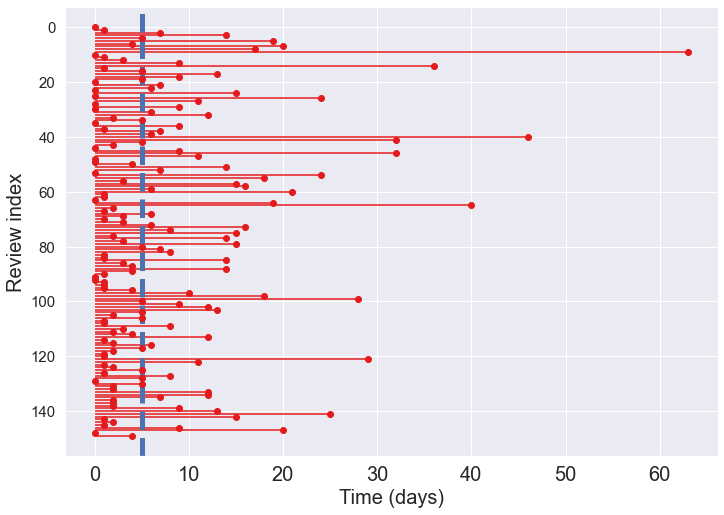

In [10]:
t, ASIN = 5, 'B0001LO3FG'

obs = df[df.asin == ASIN][50:200].copy()
obs.sort_values(by='date', inplace=True)
obs = obs.reset_index(drop=True)
cmap = matplotlib.cm.get_cmap('Set1')
plt.axvline(t, ls='--', lw=5)
for i, asin in enumerate(obs.asin.unique()):
    start = 0
    for j, (y, row) in enumerate(obs[obs.asin == asin].iterrows()):
        delay = row['days_since_last_review']
        color = cmap(i)
        plt.hlines(y, start, start+delay, color=color)
        plt.plot(start+delay, y, marker='o', color=color)

plt.xlabel('Time (days)', size=20)
plt.ylabel('Review index', size=20)
plt.xticks(size=20)
plt.yticks(size=15)
plt.gca().invert_yaxis()
plt.show()

Given the nature of the dataset more advanced usecases of survival analysis is not feasible. For instance, the dataset does not contain price information at the time of purchase, but rather at the time of the bulk information retrieval. The dataset also does not contain other relevant feature data to be used in tandem for survival analysis prediction etc.